In [181]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage
import math
from PIL import ImageFont
from PIL import ImageDraw
from sys import maxsize

In [182]:
def showImage(image):
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(image, cmap='gray')
    plt.show()

In [183]:
def prepare(image):
    image = 255 - image
    edges = cv2.Canny(image, 50, 150, 3)
    lines = cv2.HoughLinesP(edges, 0.1, np.pi/720, 51, 6, 6)
    
    radianSum = 0
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        radianSum += math.atan2(y2-y1,x2-x1)

    radianSum = radianSum / len(lines)
    return scipy.ndimage.rotate(image, np.degrees(radianSum), reshape=False)

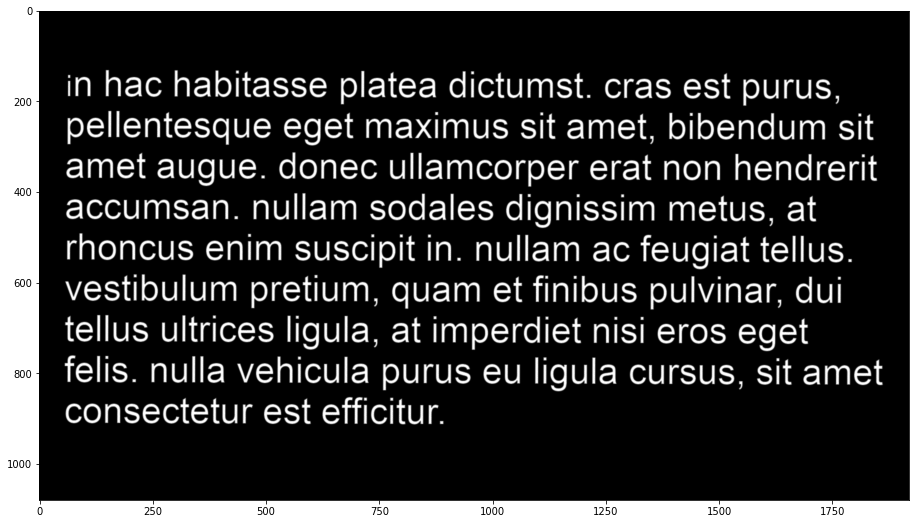

In [268]:
image = np.matrix(Image.open("text.png").convert("L"))
image = prepare(image)
showImage(image)

In [195]:
def loadLetter(letter, font, size=80):
    img = Image.new('L', font.getsize(letter), 255)
    draw = ImageDraw.Draw(img)
    draw.text((0,0), letter, font=font)
    return 255-np.matrix(img)

In [196]:
font = ImageFont.truetype("arial.ttf", size = 80)
letters = [chr(x) for x in range(ord("a"), ord("z")+1)] + [chr(x) for x in range(ord("0"), ord("9") + 1)] + [".", ",", "!", "?"]
letterImages = {}
for letter in letters:
    letterImages[letter] = loadLetter(letter, font)

maxLetterX = 0
maxLetterY = 0
for letter in letterImages.values():
    maxLetterX = max(maxLetterX, letter.shape[1])
    maxLetterY = max(maxLetterY, letter.shape[0])

In [197]:
def getRectanglePoint(contour):
    minY = image.shape[0]
    minX = image.shape[1]
    maxY = 0
    maxX = 0
    for point in contour:
        x = point[0][0]
        y = point[0][1]
        minY = min(minY, y)
        maxY = max(maxY, y)
        minX = min(minX, x)
        maxX = max(maxX, x)

    return ((minX, minY),(maxX, maxY))

In [198]:
def insertBoxesIntoImage(image, boxes):
    for box in boxes:
        cv2.rectangle(image, box[0], box[1], (120,0,0), 2)

In [199]:
contours, hierarchy = cv2.findContours(image, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

In [210]:
boxes = []
for contour in contours:
    left, right = getRectanglePoint(contour)
    if (right[0] - left[0])*(right[1]-left[1]) >= 50:
        boxes.append((left, right))

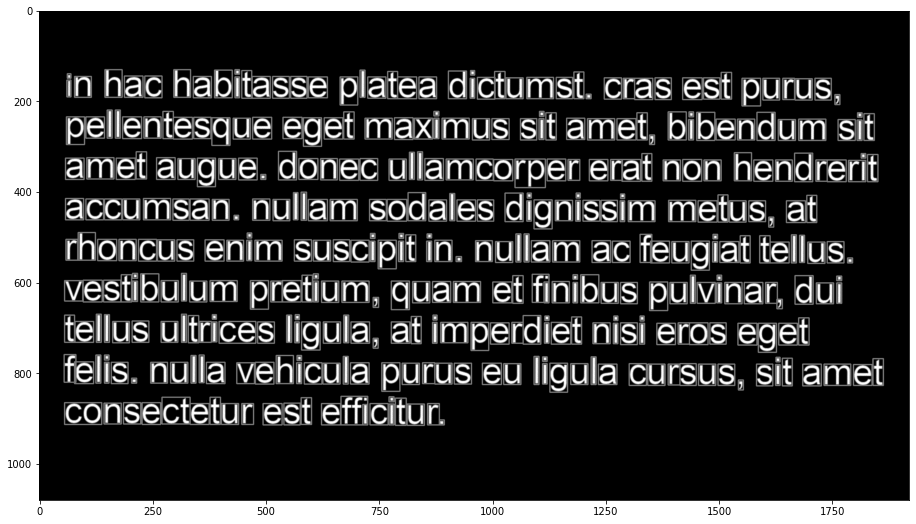

In [211]:
imageCopy = image.copy()
insertBoxesIntoImage(imageCopy, boxes)
showImage(imageCopy)

In [212]:
def correlation(img1, img2):
    return np.real(
        np.fft.ifft2(
            np.multiply(
                np.fft.fft2(img1),
                np.fft.fft2(np.rot90(img2, 2))
            )
        )
    )

In [213]:
def recognizeLetter(box, image, letterImages):
    letterImage = image[box[0][1]:box[1][1], box[0][0]:box[1][0]]
    maxY = max(maxLetterY, letterImage.shape[0])
    maxX = max(maxLetterX, letterImage.shape[1])
    letterFromImage = np.zeros((maxX*2, maxY*2))
    
    letterFromImage[:letterImage.shape[0],:letterImage.shape[1]] = letterImage
    
    
    resultLetter = None
    maxSimilarity = (-1) * maxsize
    
    for char_, charImage in letterImages.items():
        letterFromDict = np.zeros((letterFromImage.shape[0], letterFromImage.shape[1]))
        letterFromDict[:charImage.shape[0],:charImage.shape[1]] = charImage
        resultCorrelation = correlation(letterFromImage - 125, letterFromDict - 125)
        similarity = np.amax(resultCorrelation)
        if similarity > maxSimilarity:
            maxSimilarity = similarity
            resultLetter = char_
        
    return resultLetter

.


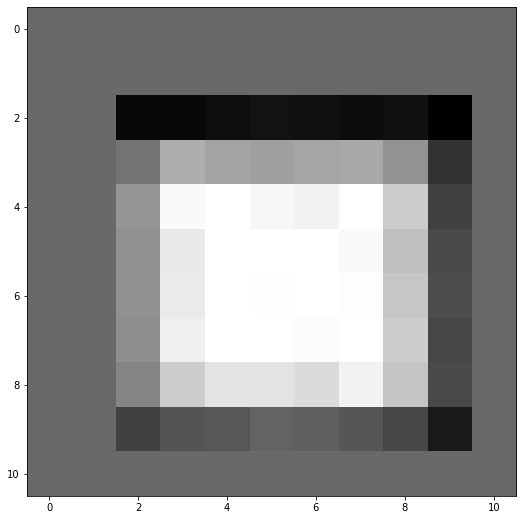

i


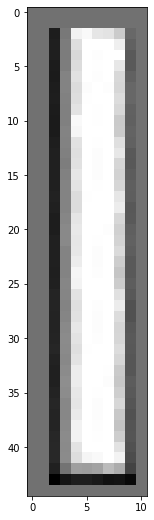

u


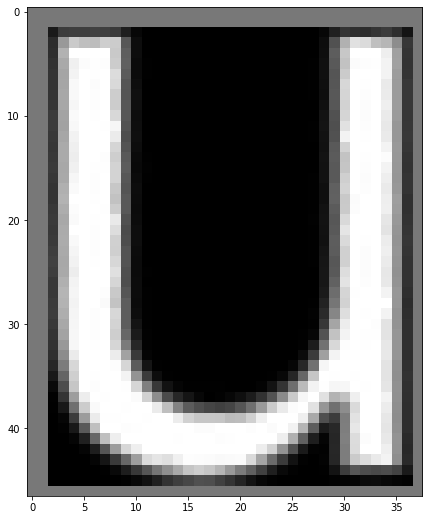

i


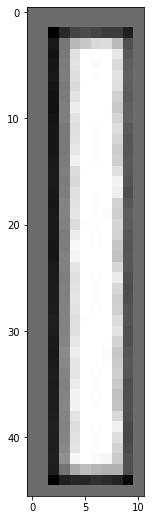

r


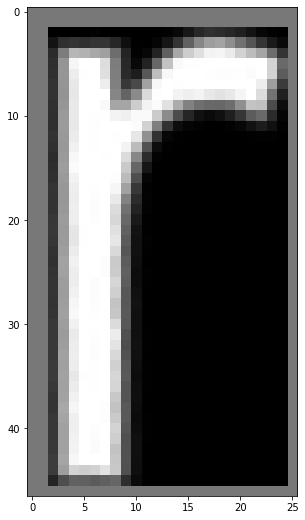

c


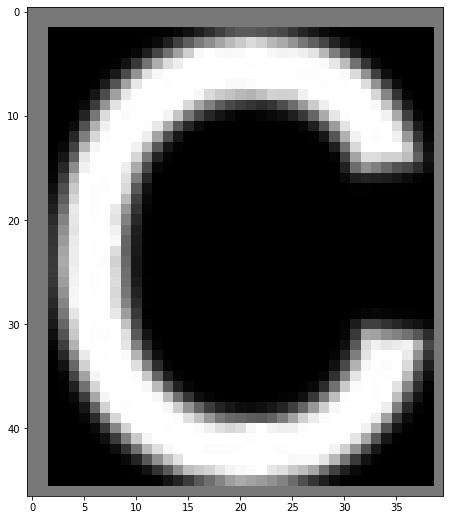

e


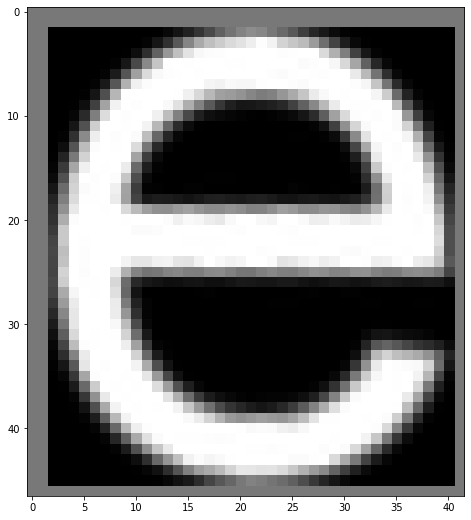

e


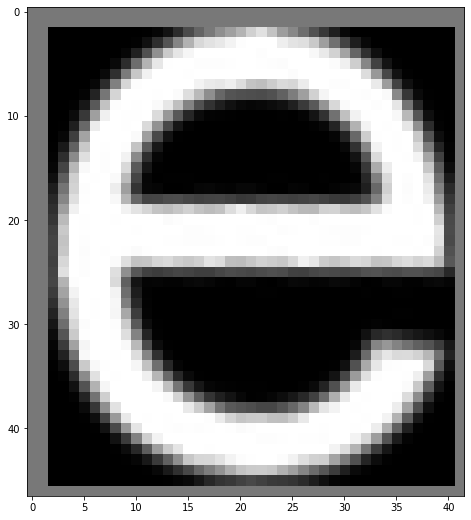

r


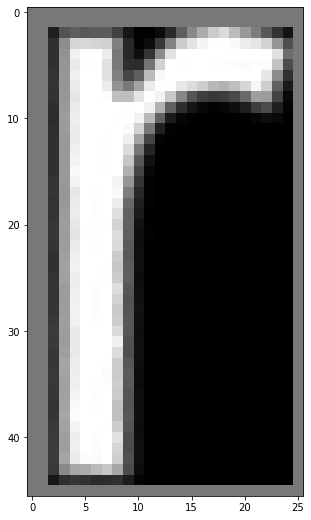

u


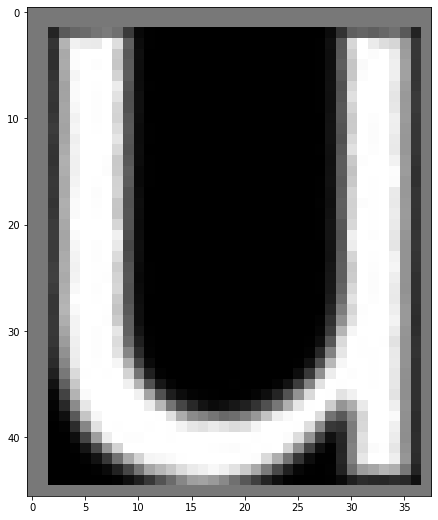

e


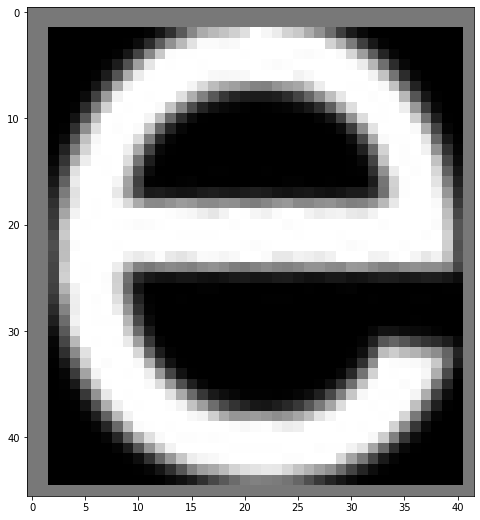

s


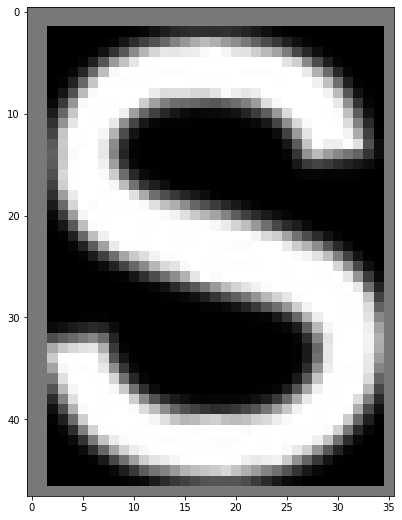

n


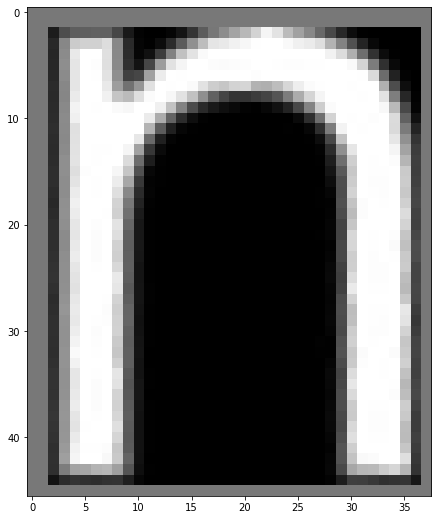

e


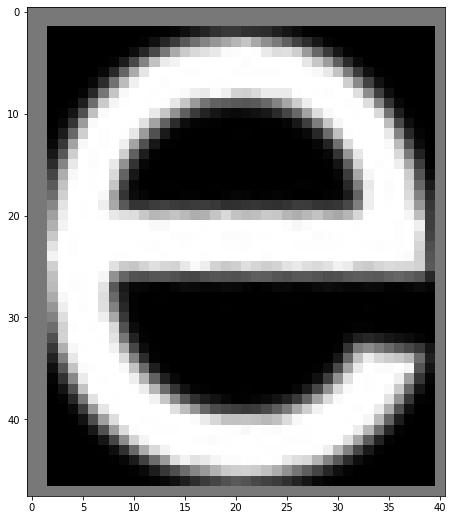

s


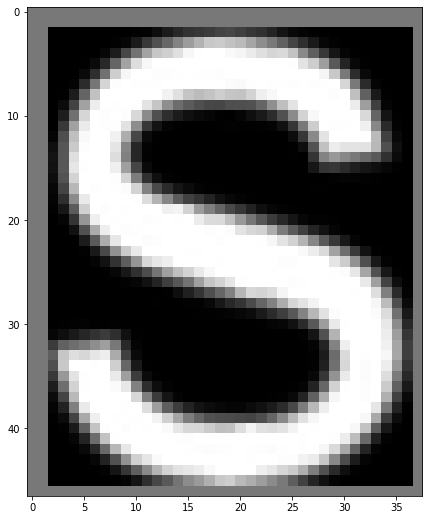

o


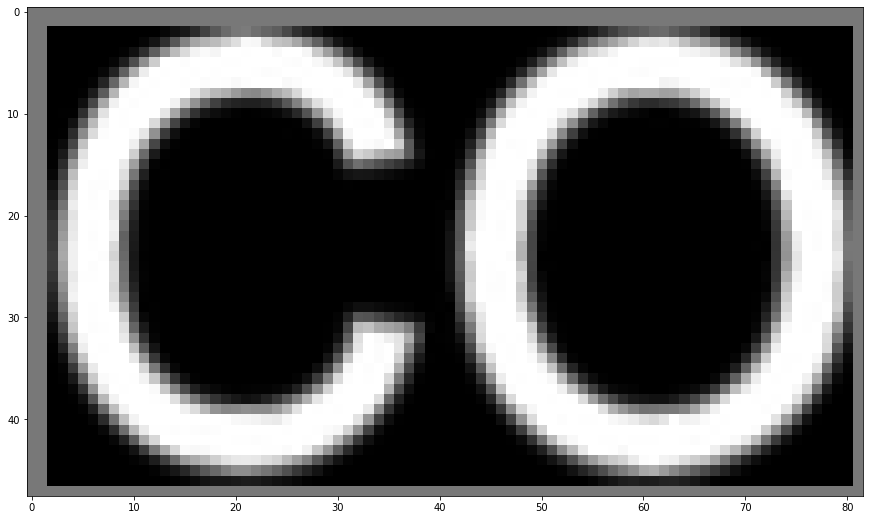

t


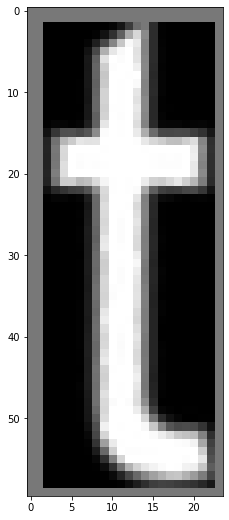

t


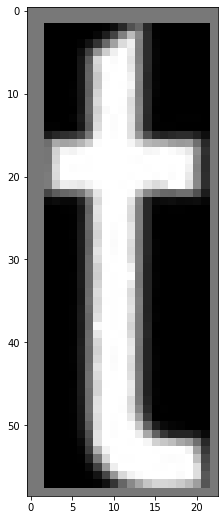

t


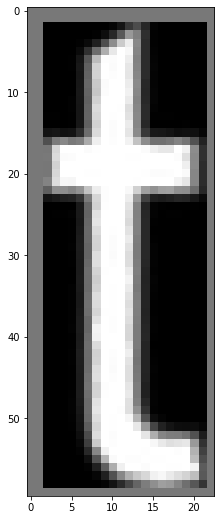

c


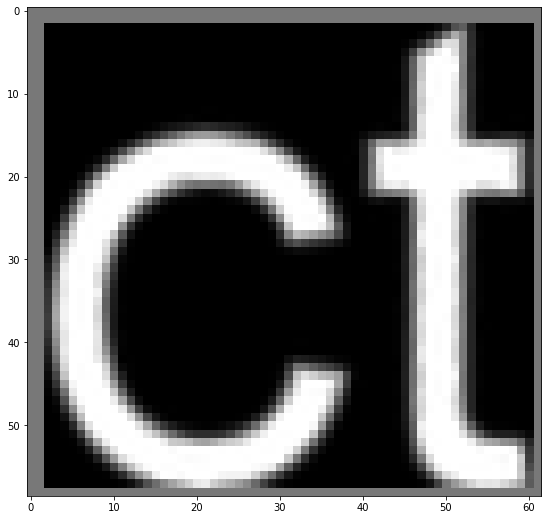

.


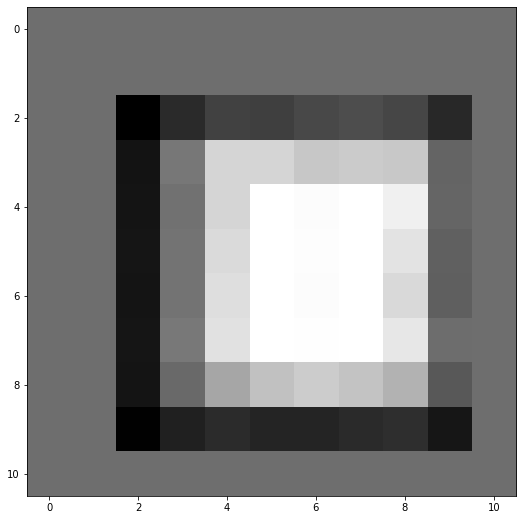

f


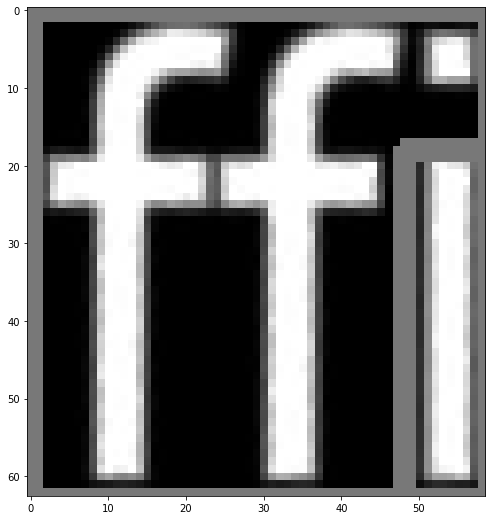

,


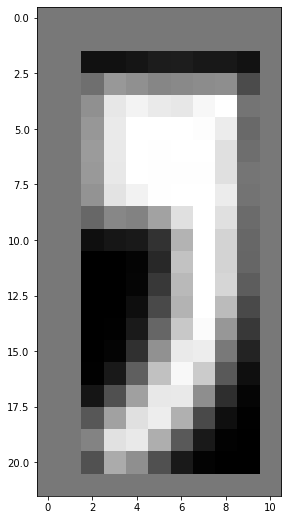

.


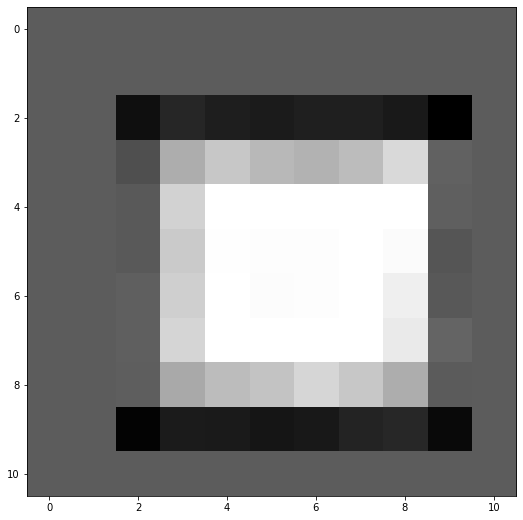

e


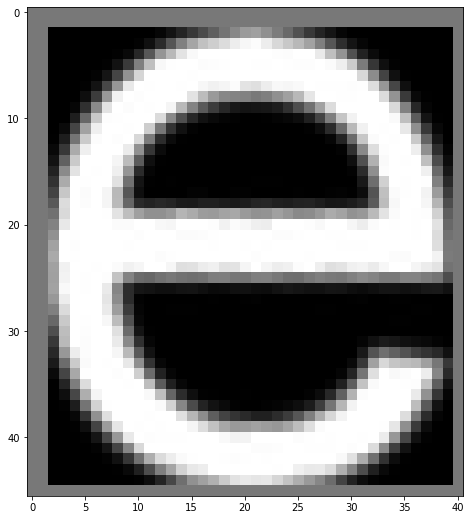

i


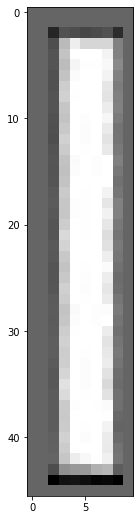

m


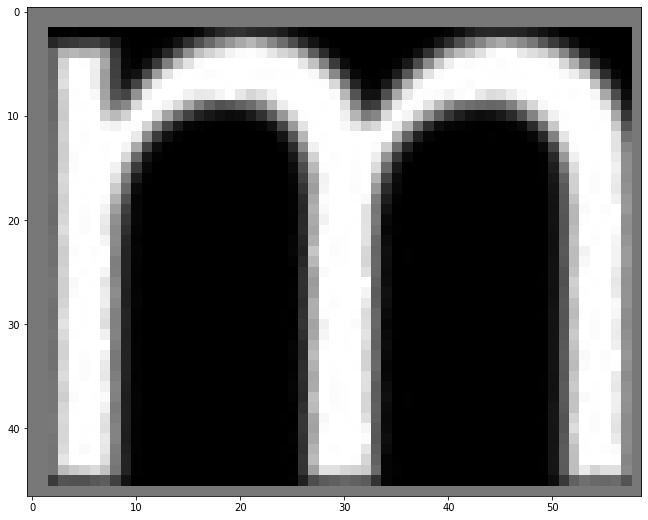

a


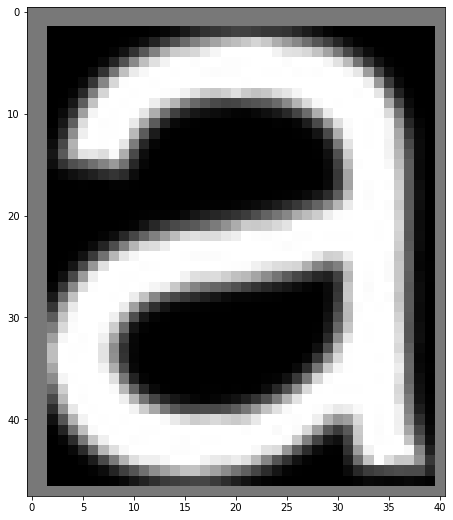

s


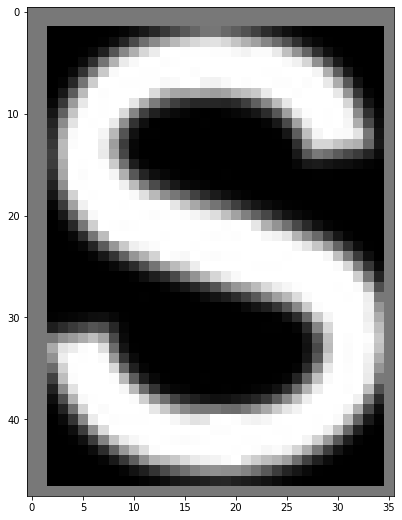

s


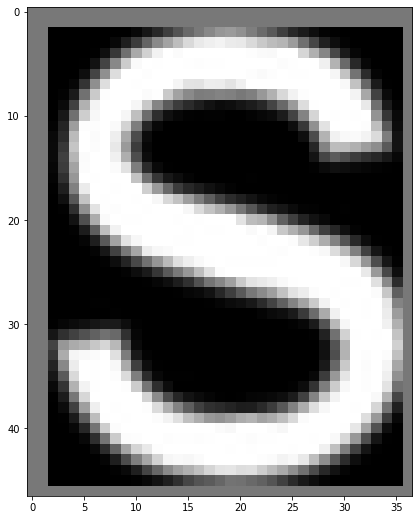

u


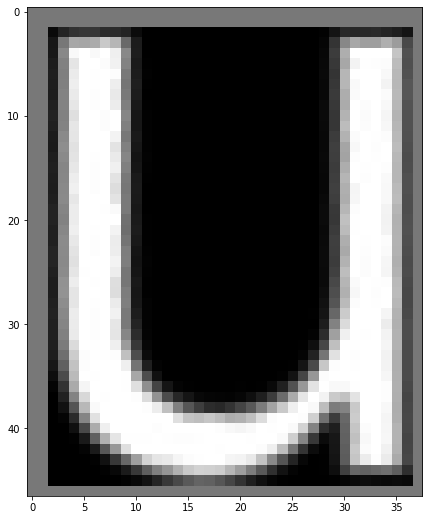

r


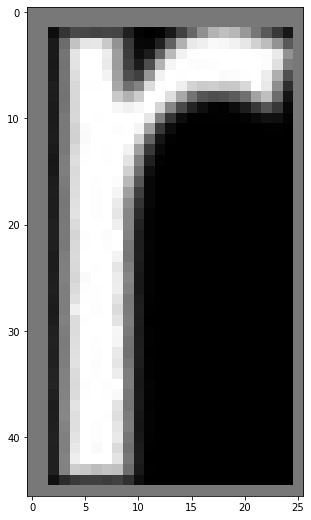

u


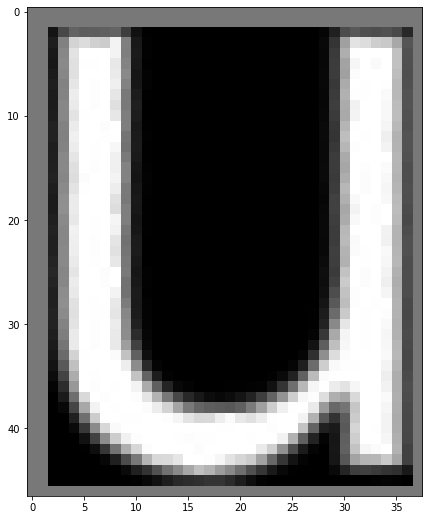

a


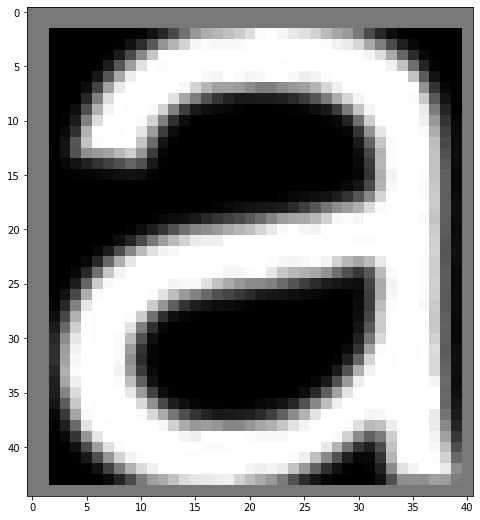

s


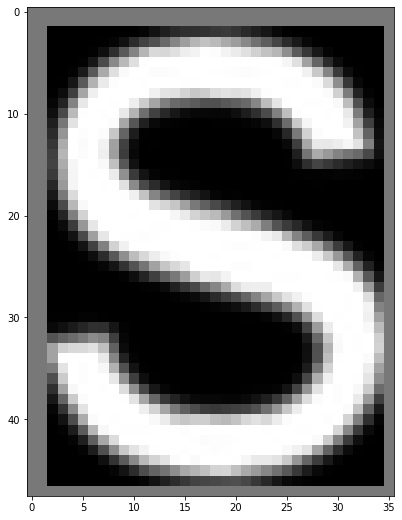

c


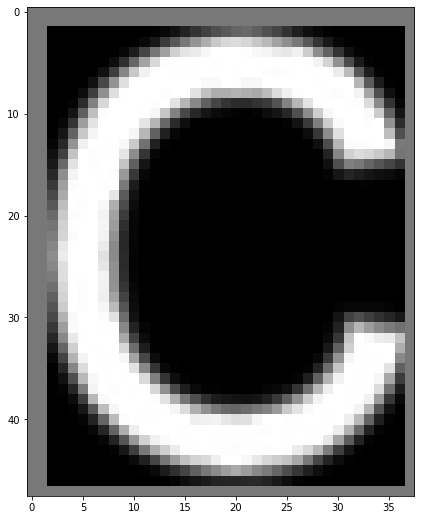

u


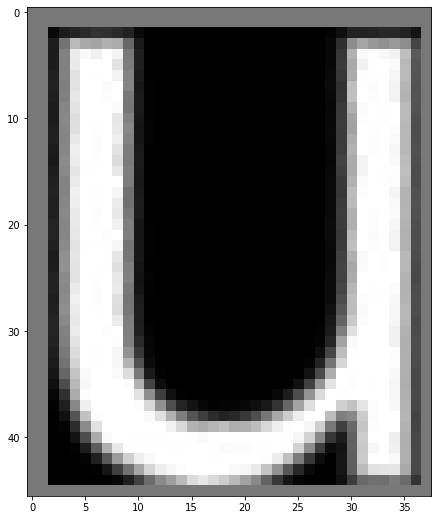

i


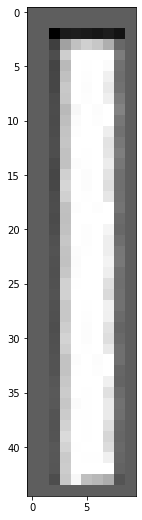

u


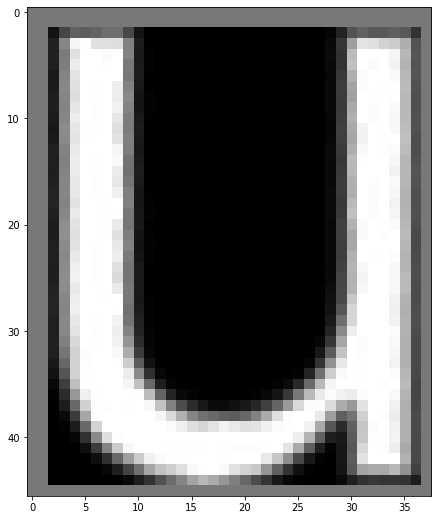

g


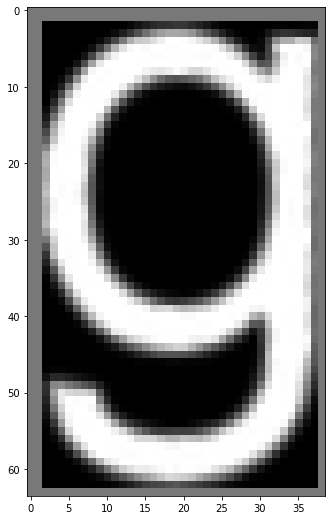

e


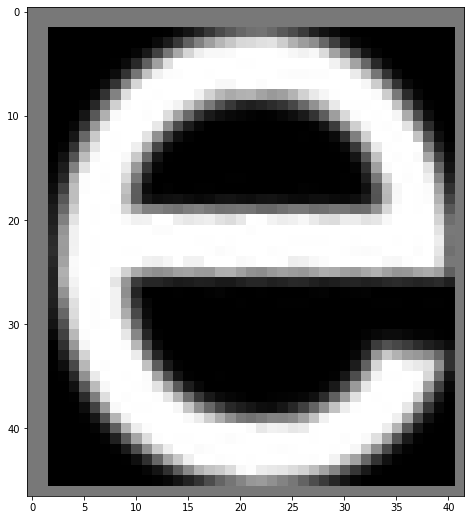

s


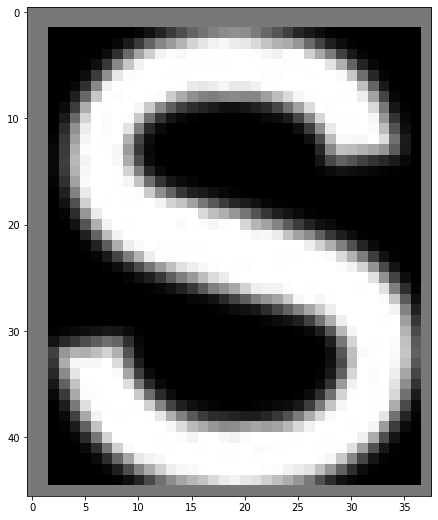

u


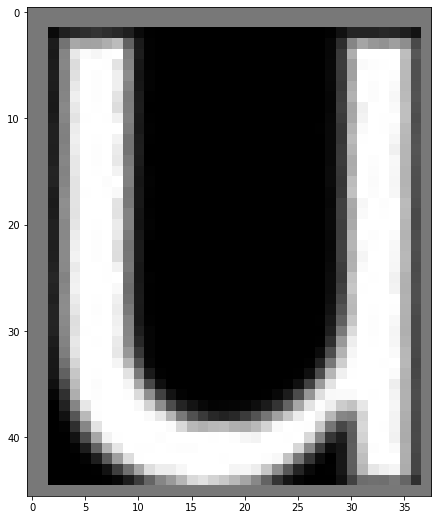

u


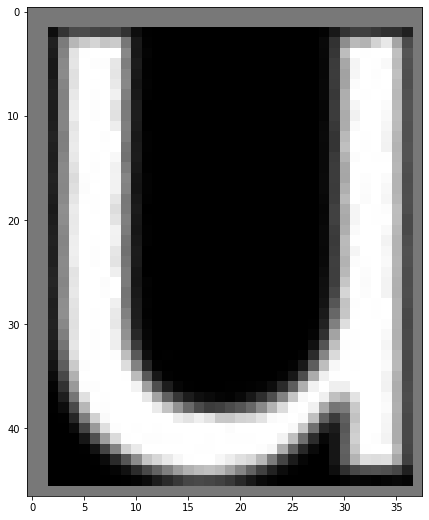

u


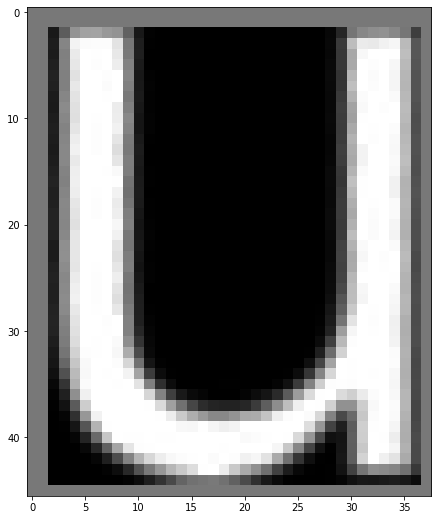

r


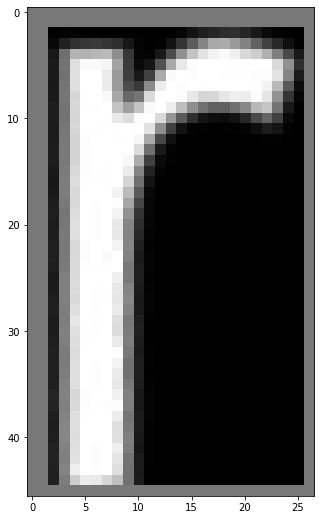

p


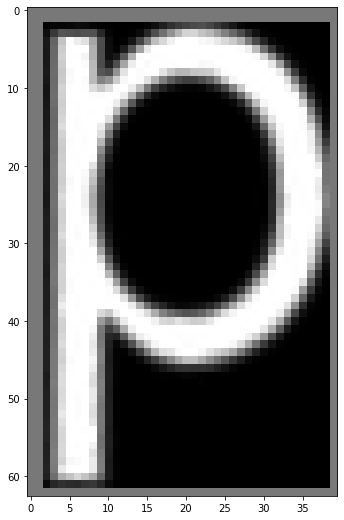

a


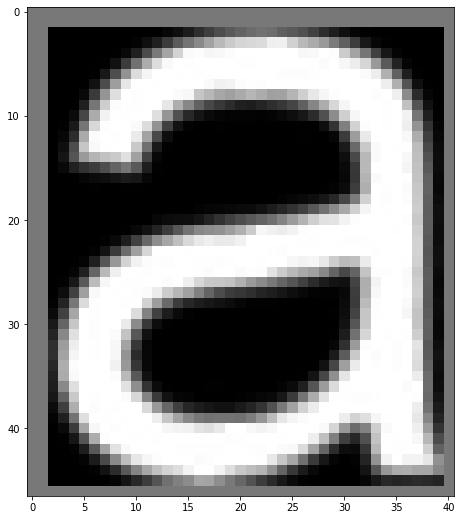

c


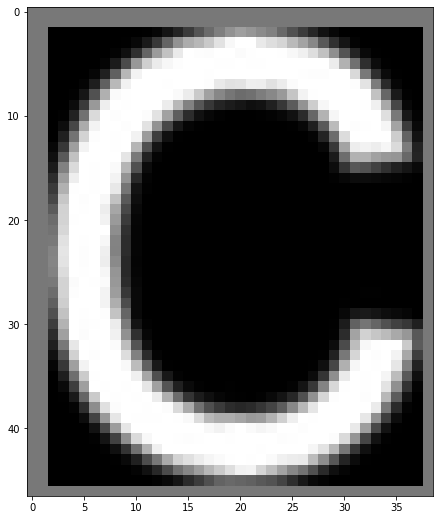

i


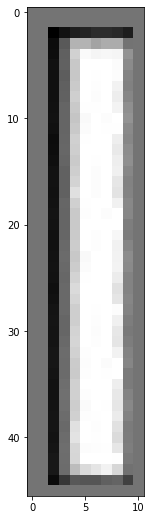

v


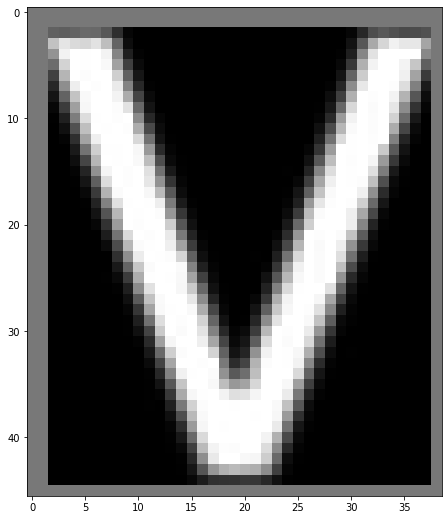

e


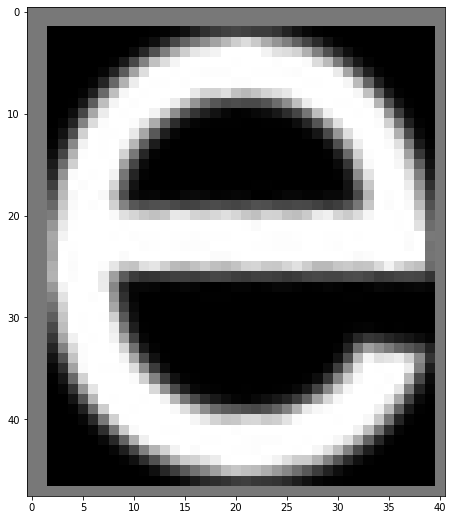

a


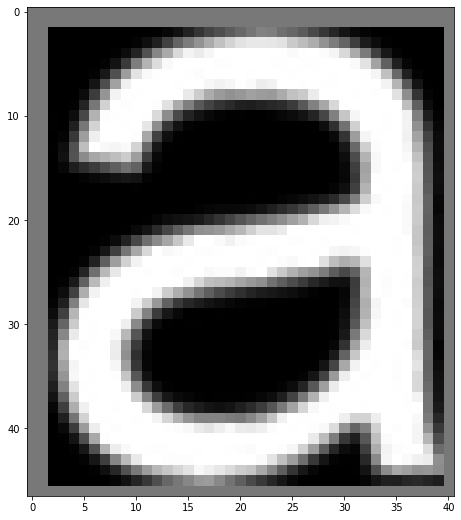

u


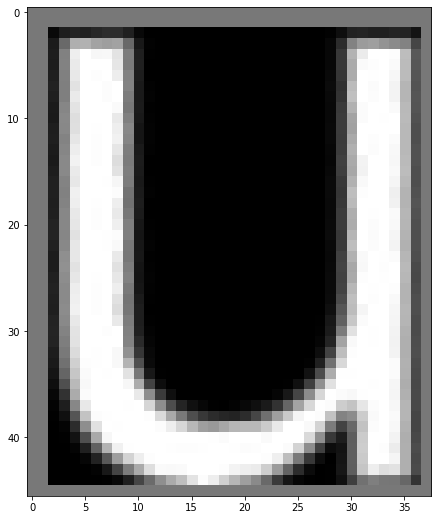

n


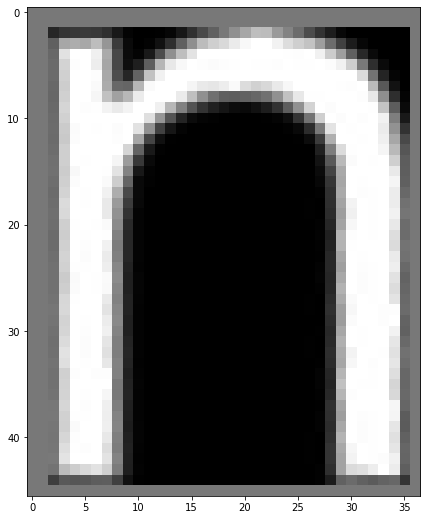

s


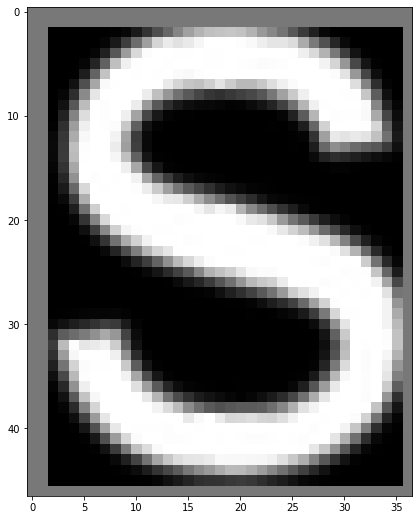

i


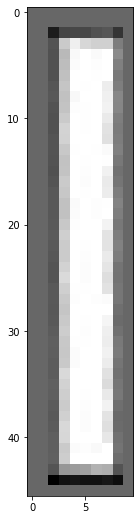

e


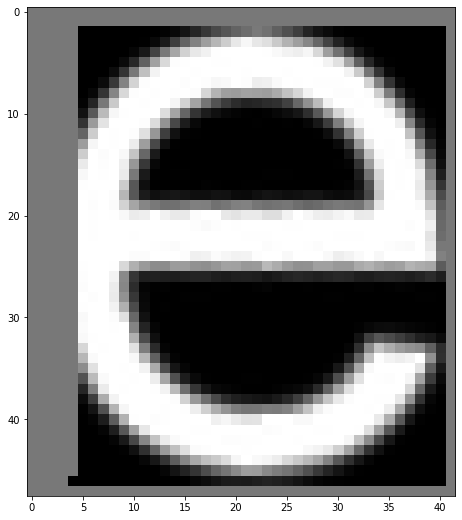

t


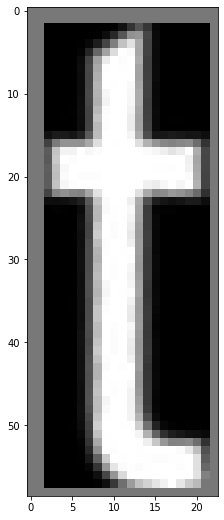

t


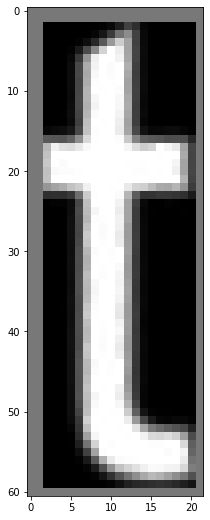

.


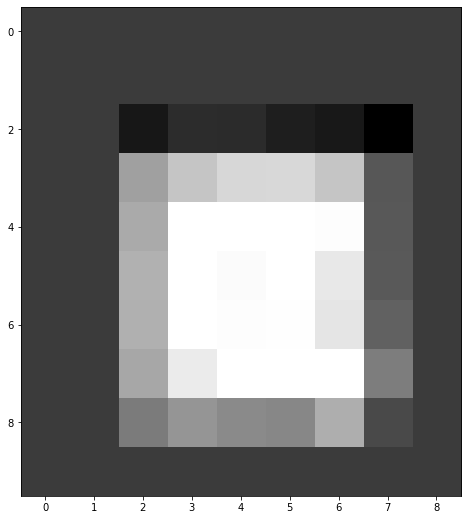

l


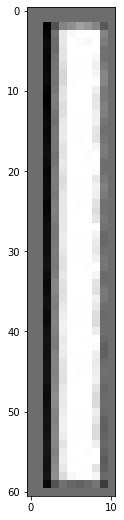

.


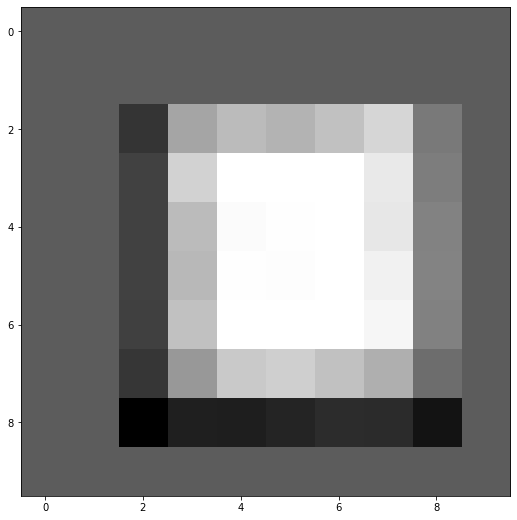

l


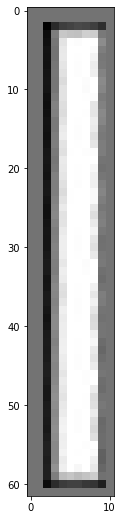

l


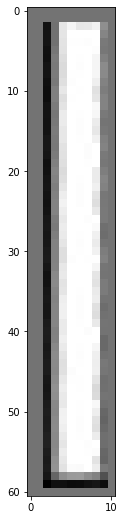

.


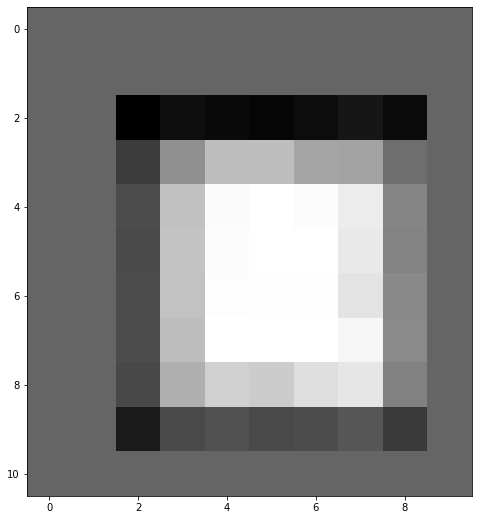

h


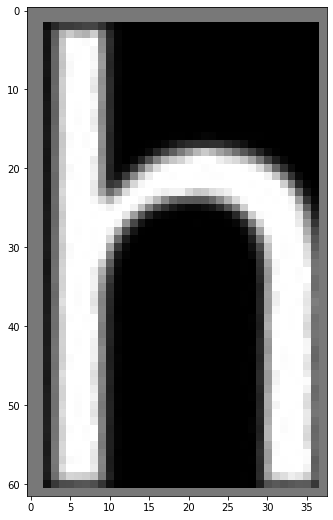

l


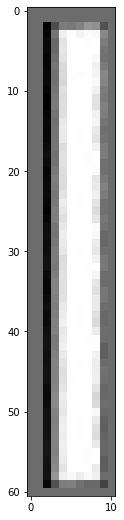

l


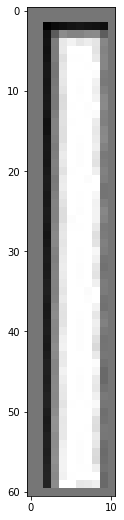

.


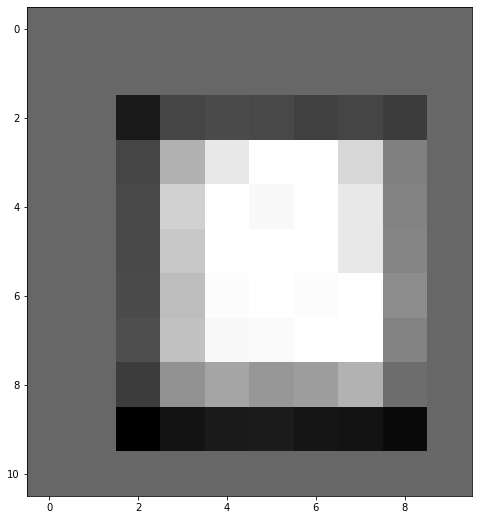

l


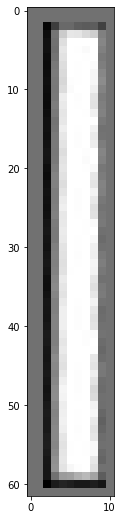

f


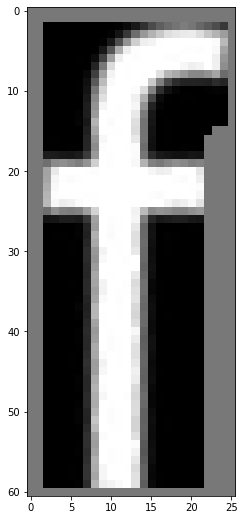

,


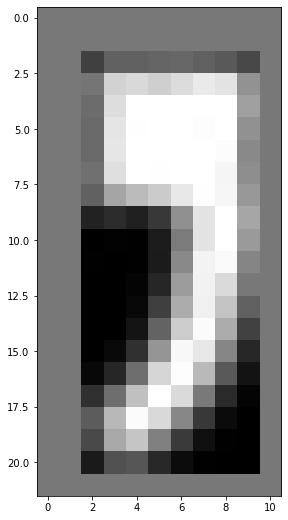

e


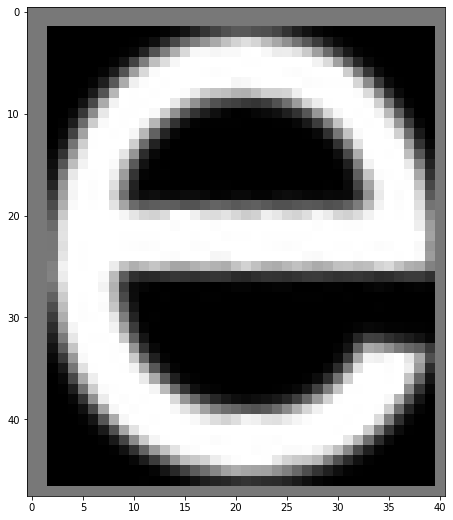

g


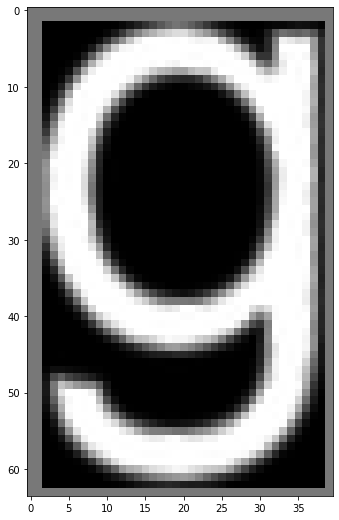

e


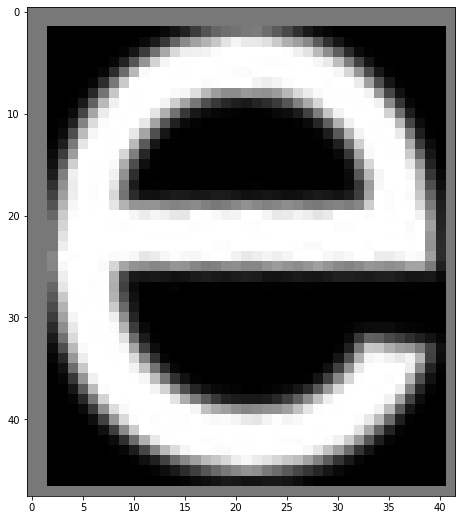

e


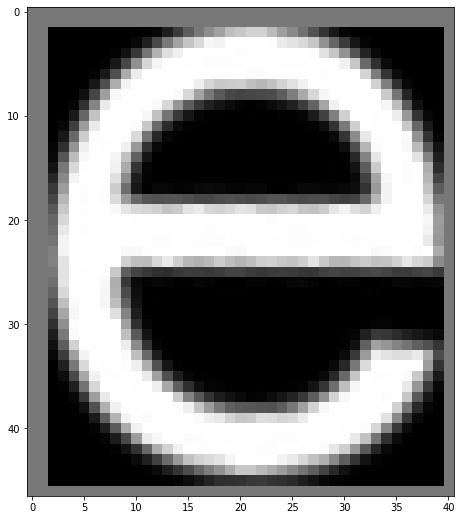

i


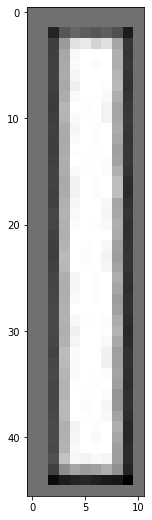

i


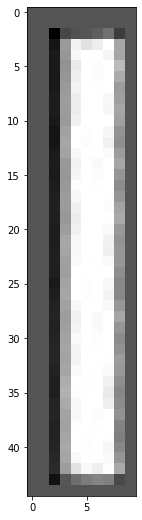

s


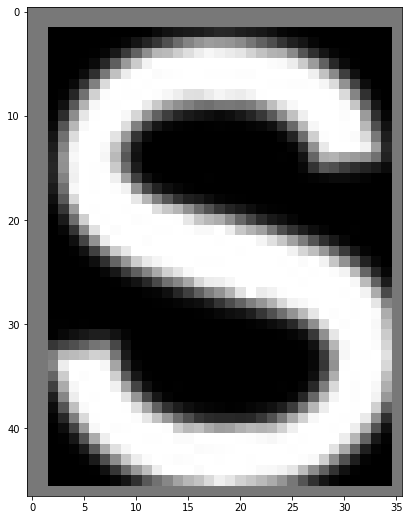

o


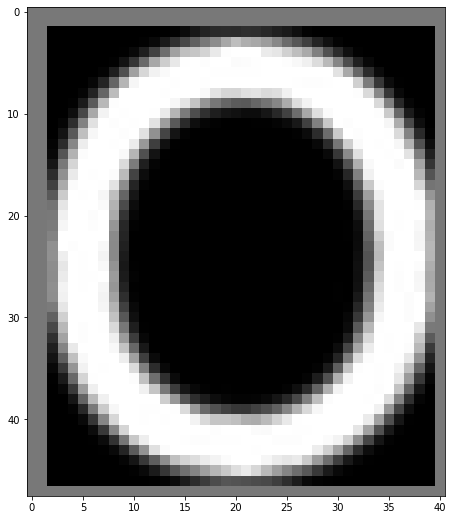

r


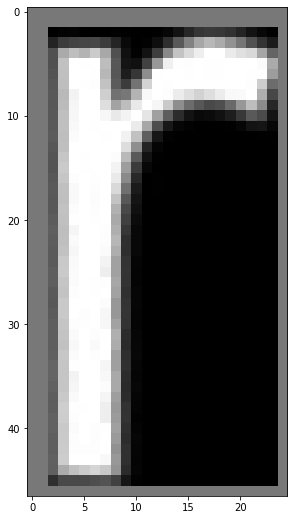

s


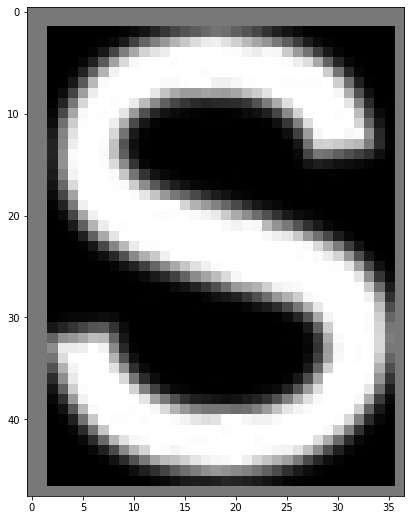

n


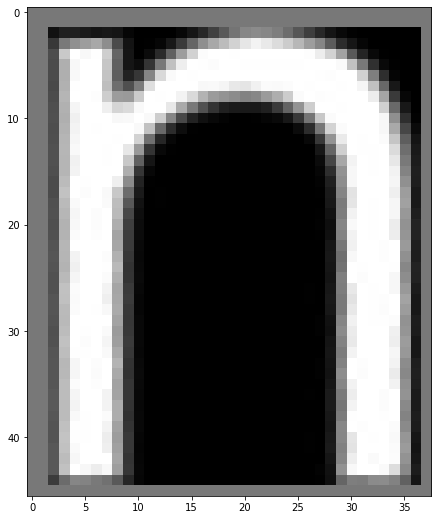

i


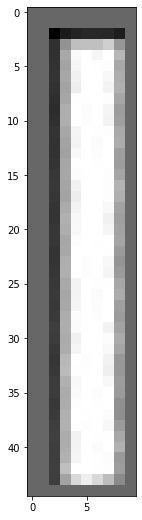

e


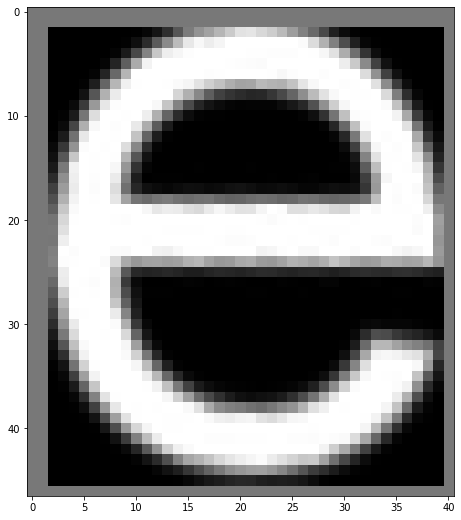

e


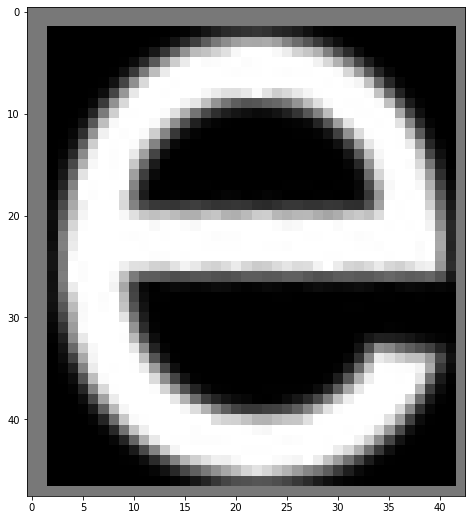

r


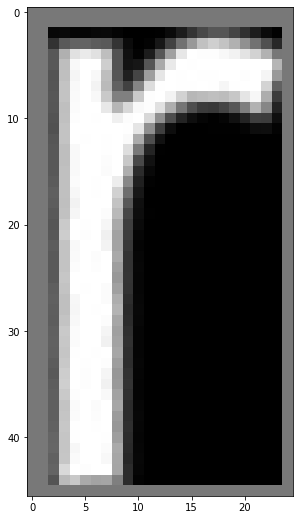

p


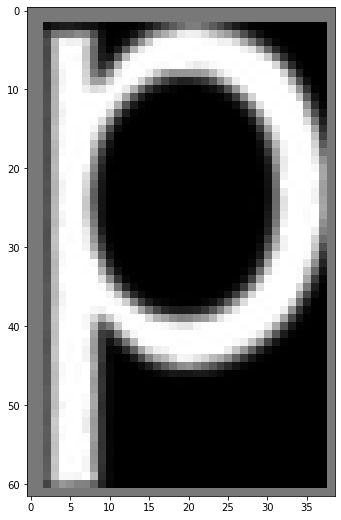

m


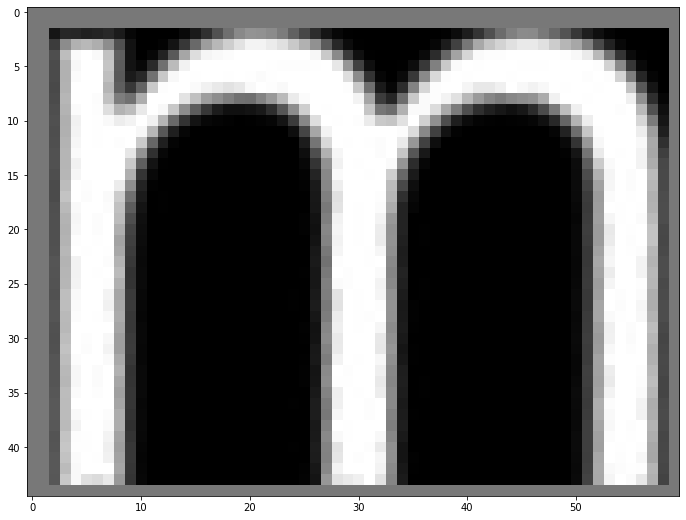

i


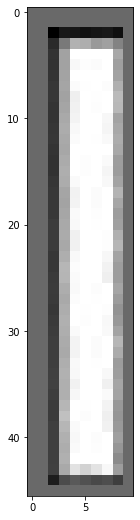

a


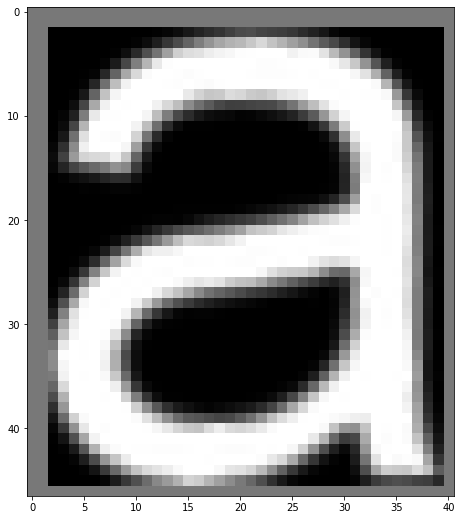

a


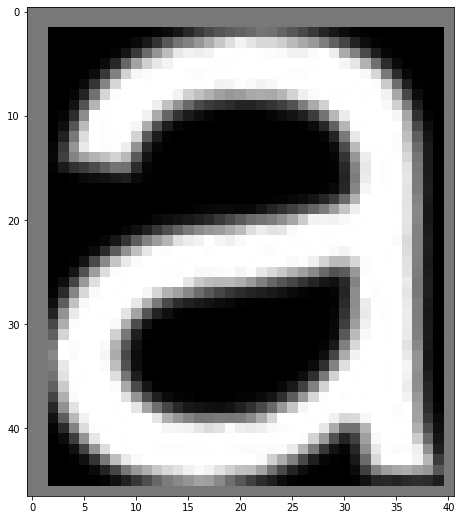

u


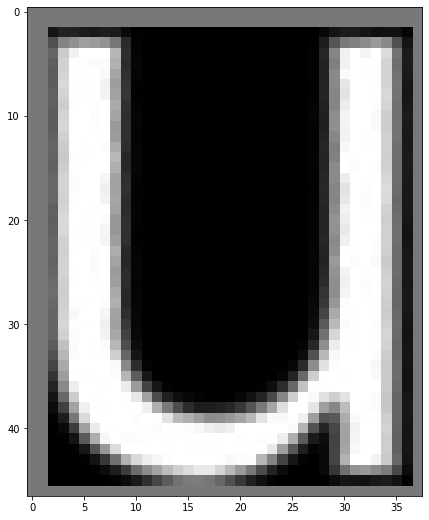

g


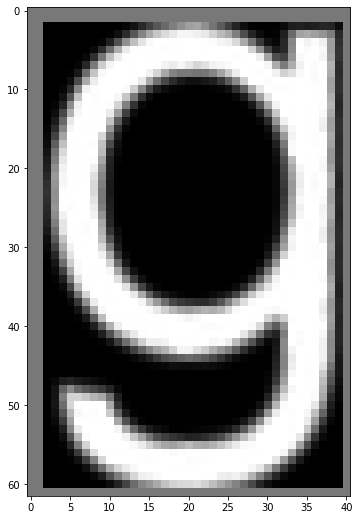

i


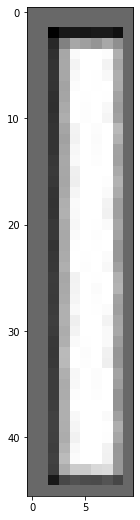

s


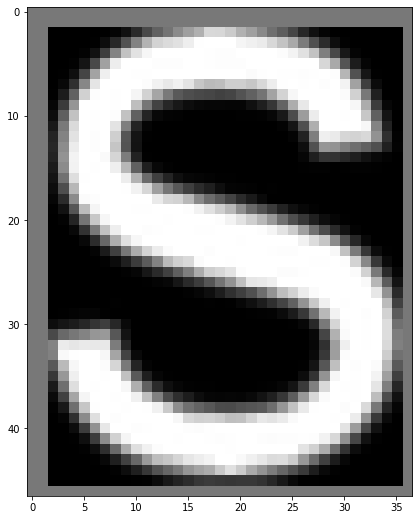

i


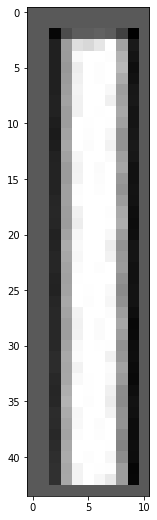

e


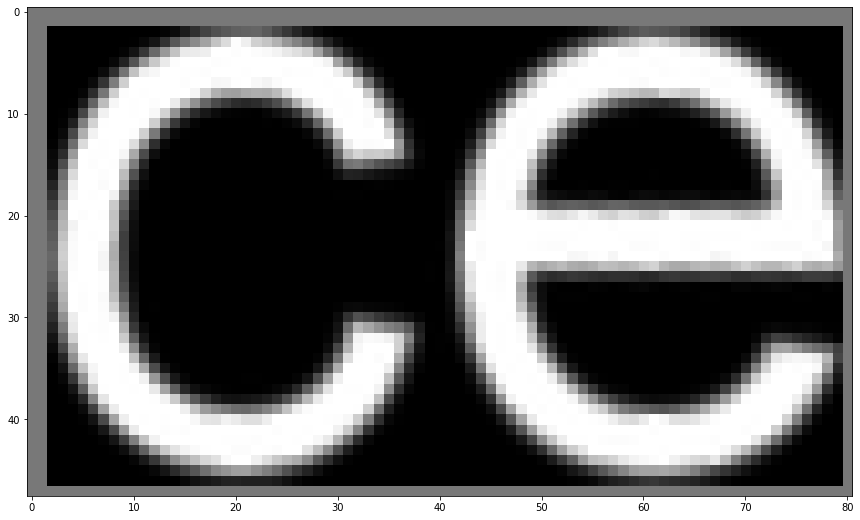

r


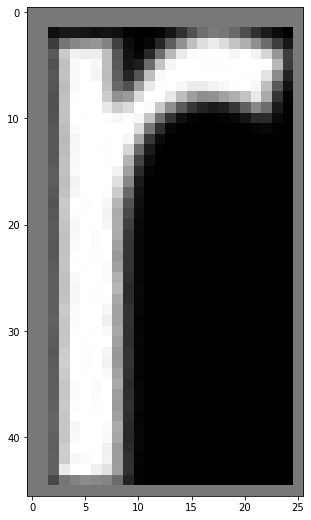

u


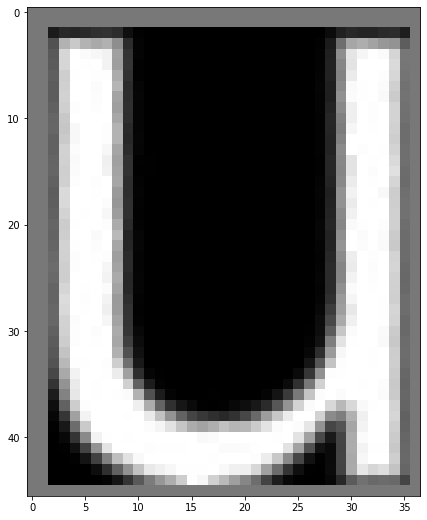

u


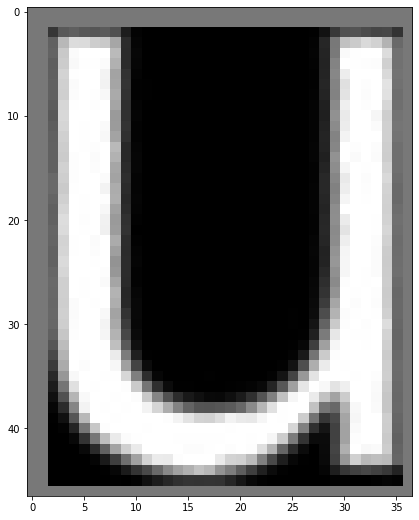

e


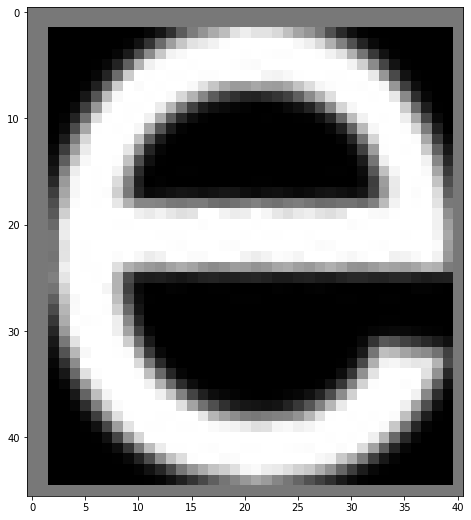

s


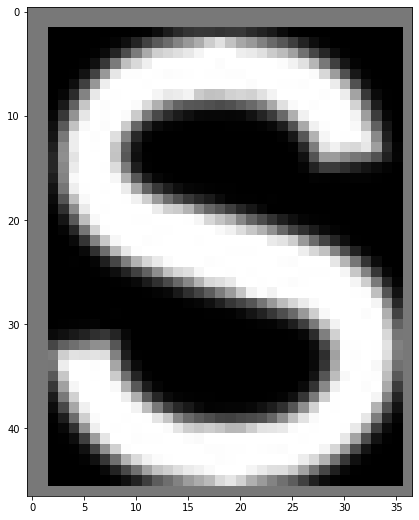

t


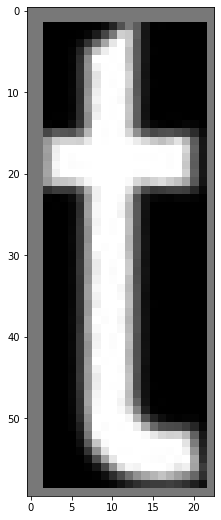

t


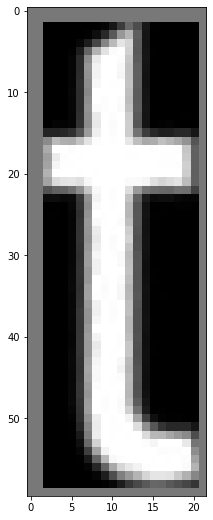

t


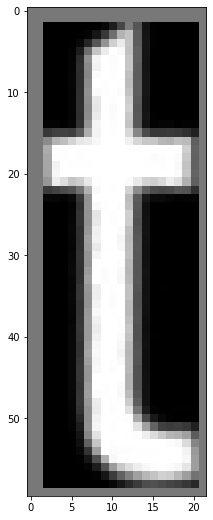

.


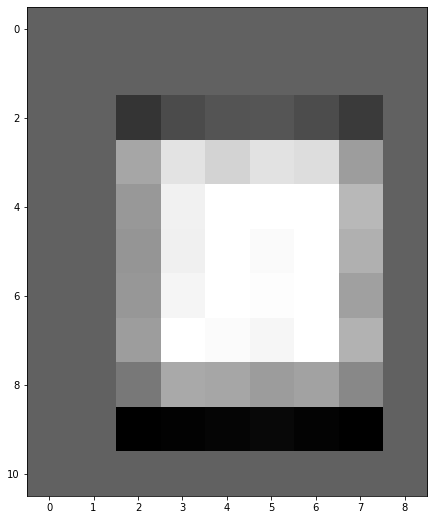

.


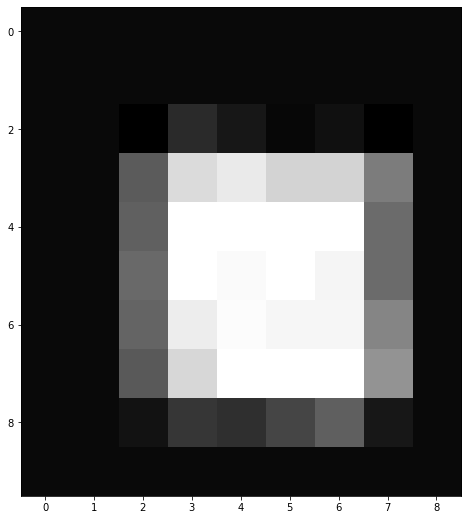

.


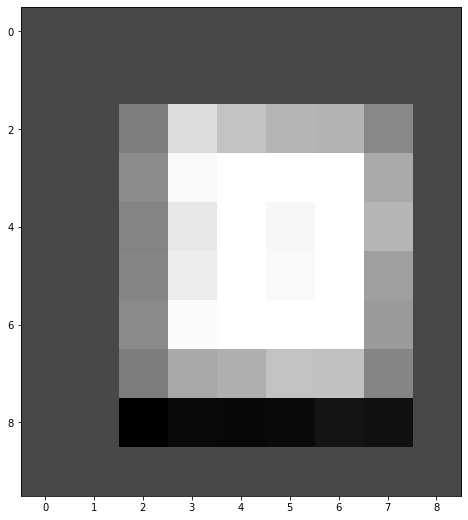

d


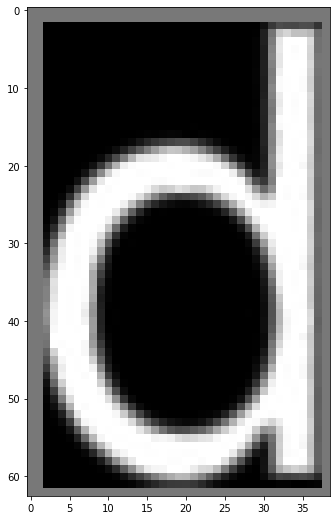

t


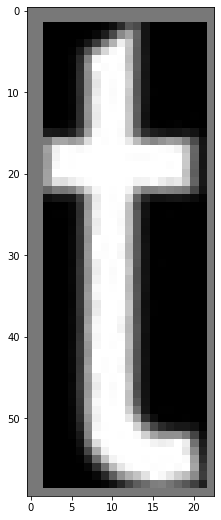

.


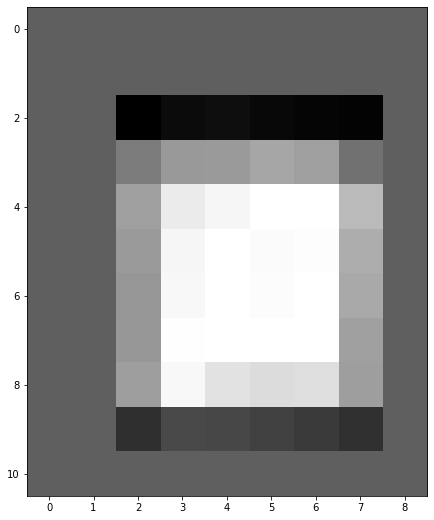

l


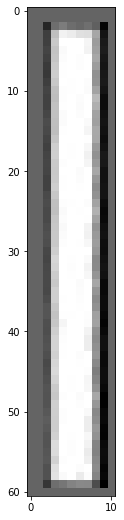

l


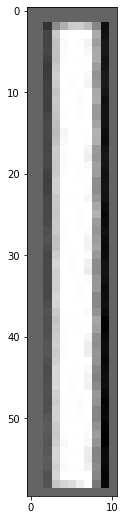

t


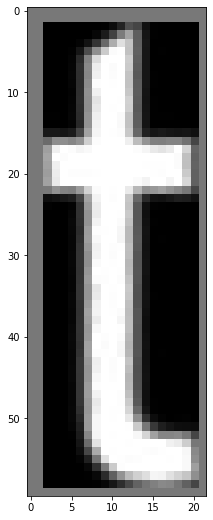

.


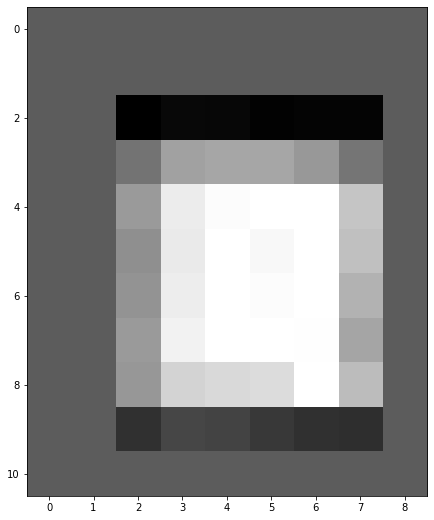

.


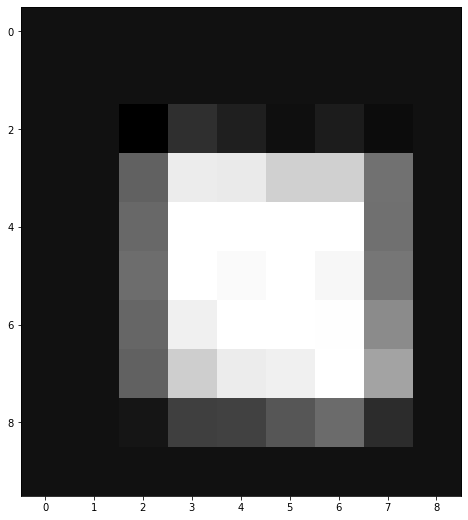

l


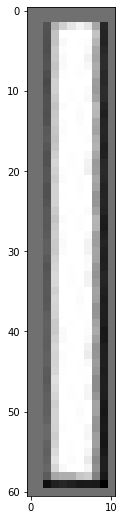

l


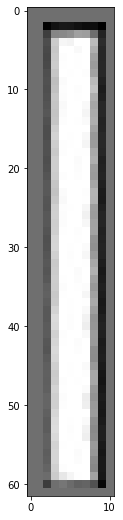

l


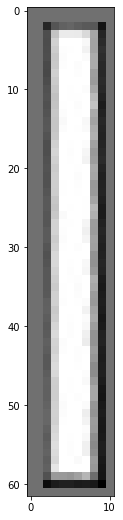

,


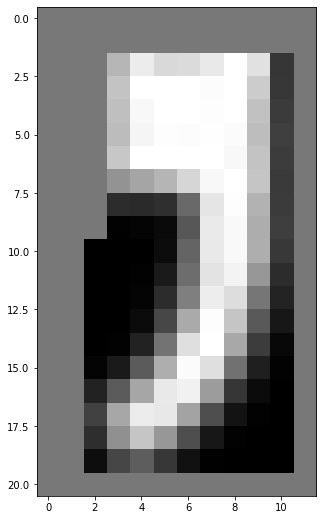

,


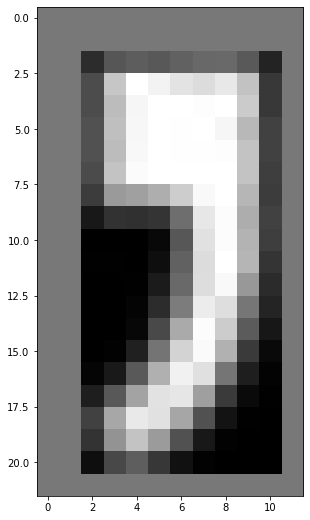

i


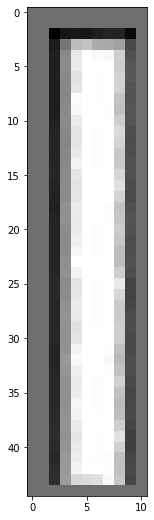

u


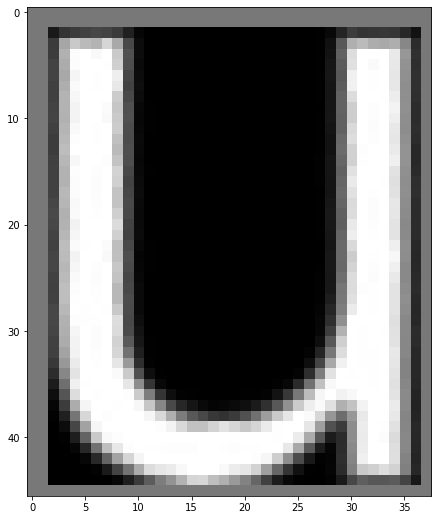

i


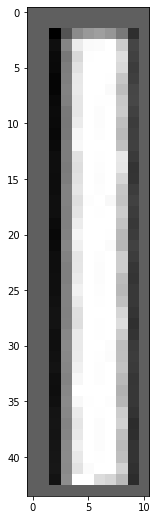

r


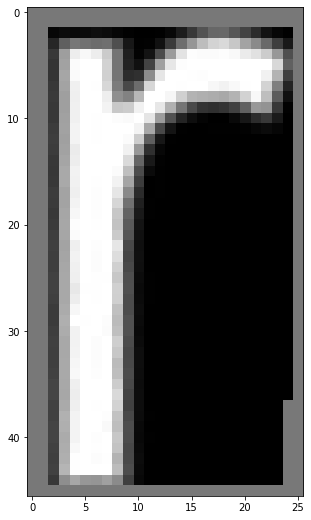

a


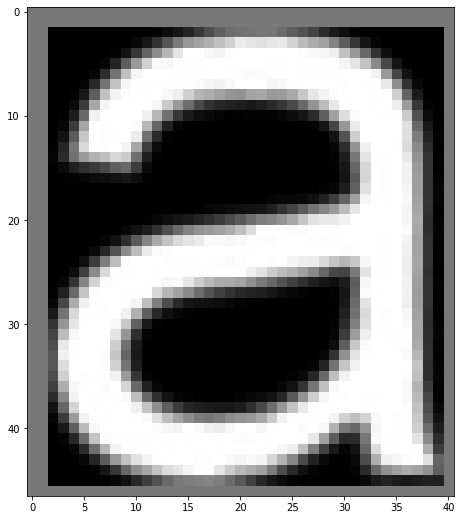

n


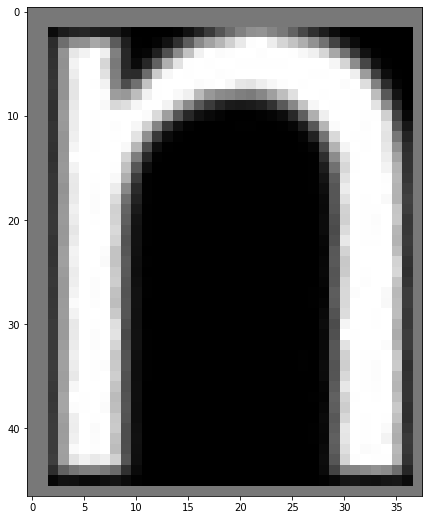

v


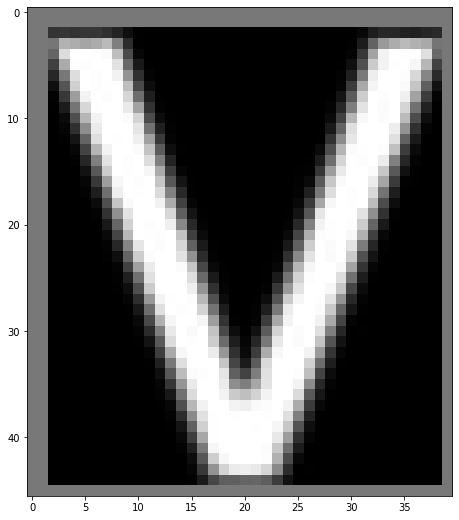

u


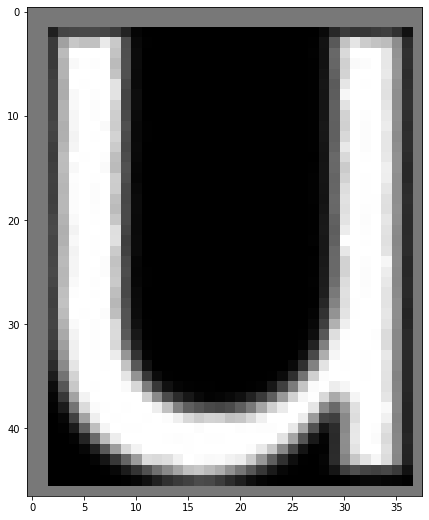

s


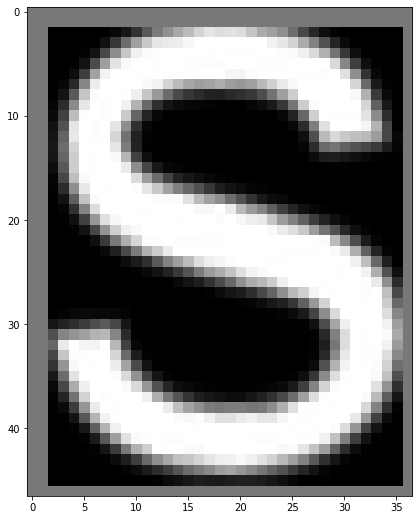

u


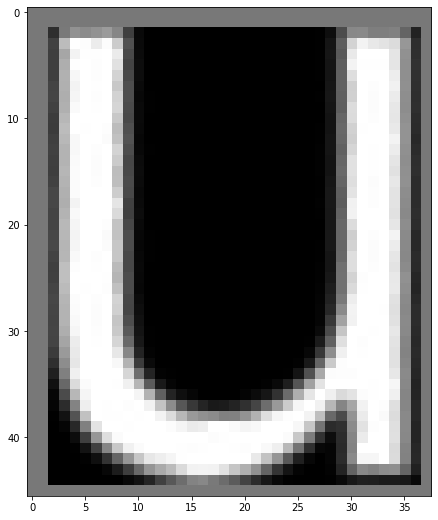

i


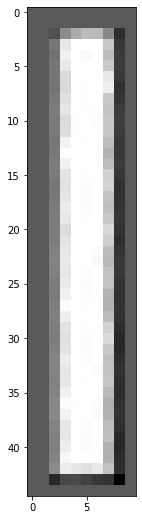

p


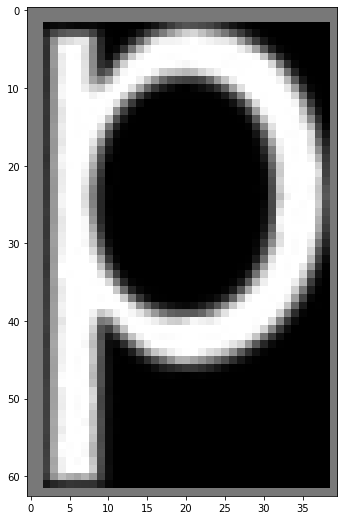

i


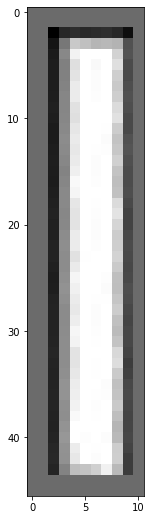

e


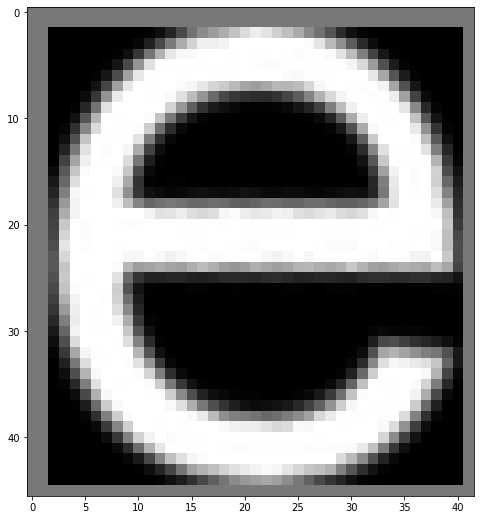

n


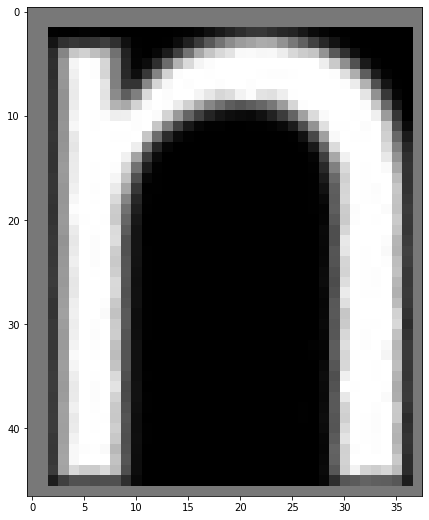

m


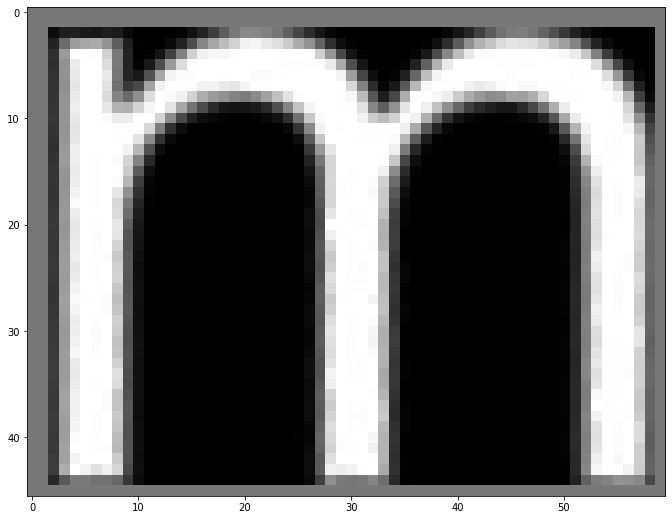

a


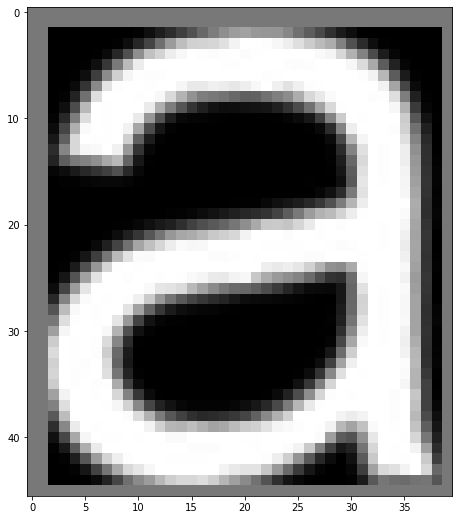

u


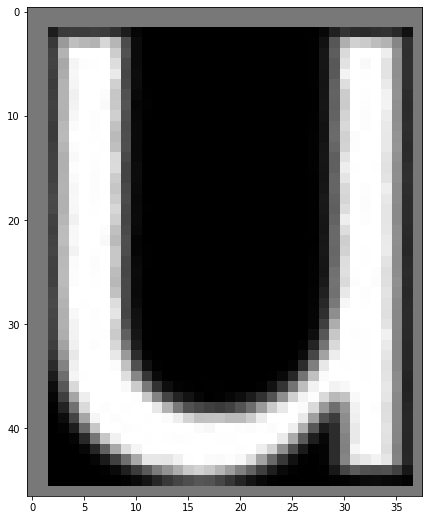

q


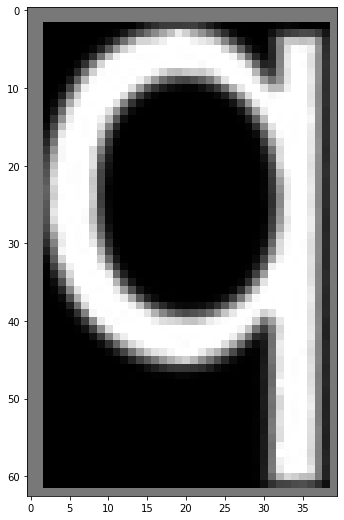

m


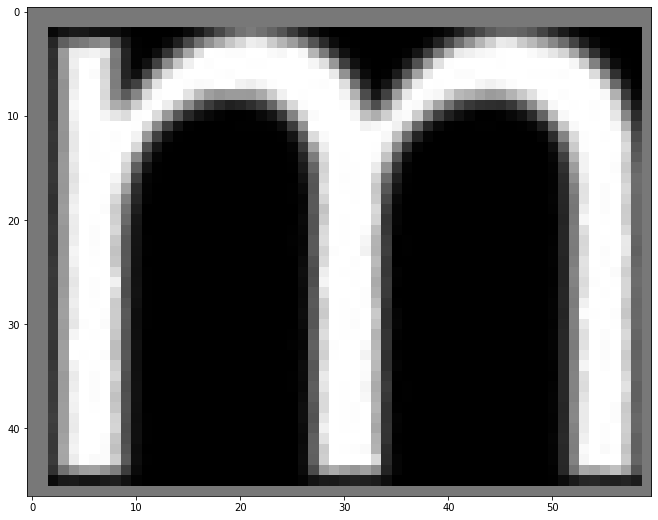

u


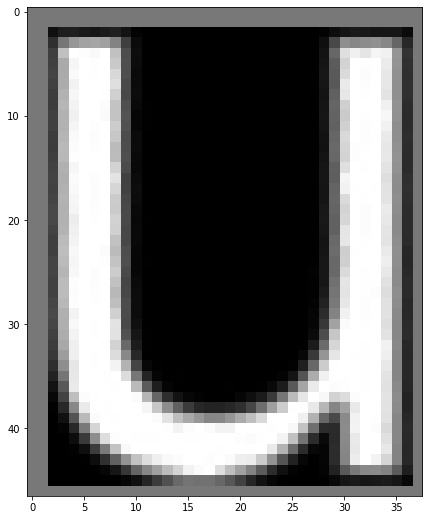

i


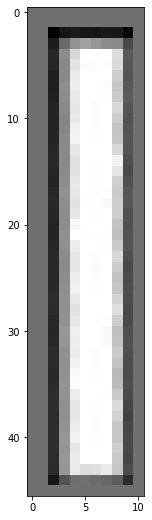

r


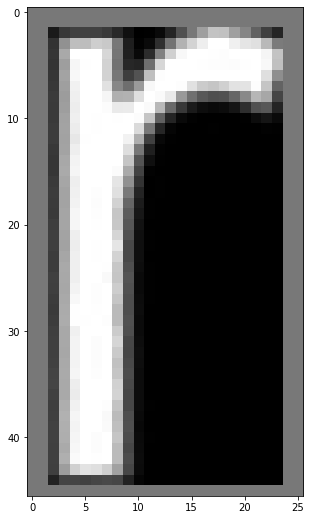

u


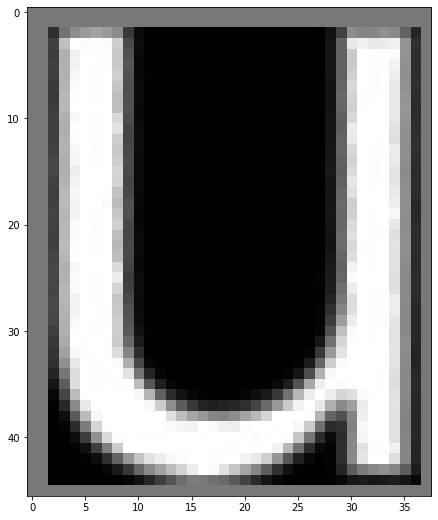

i


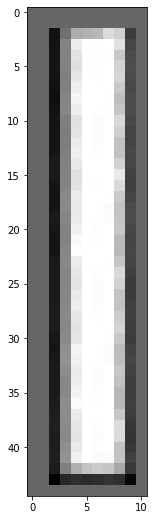

e


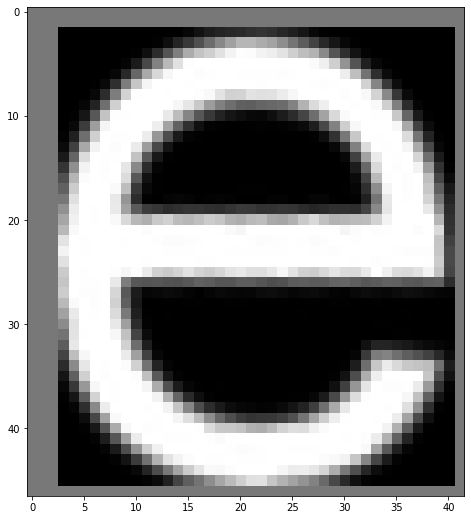

p


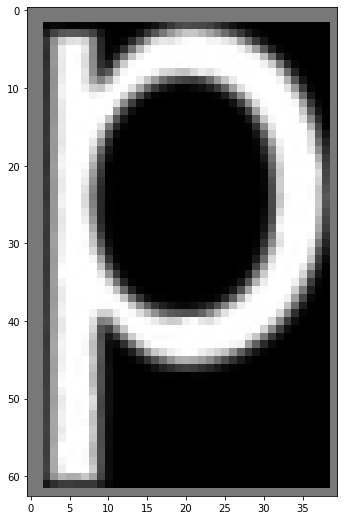

m


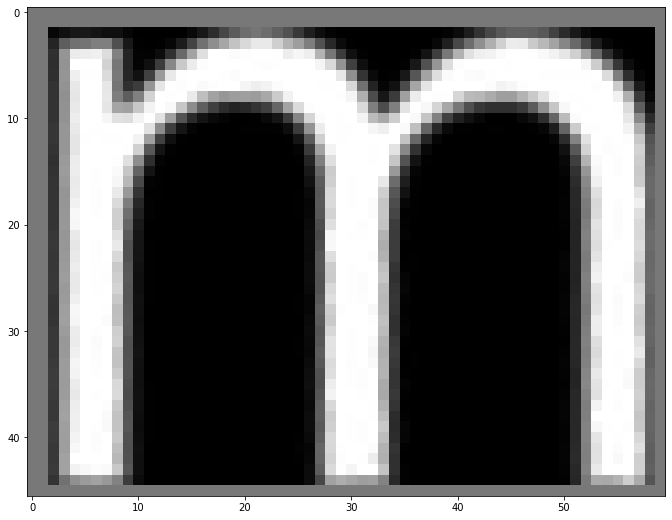

u


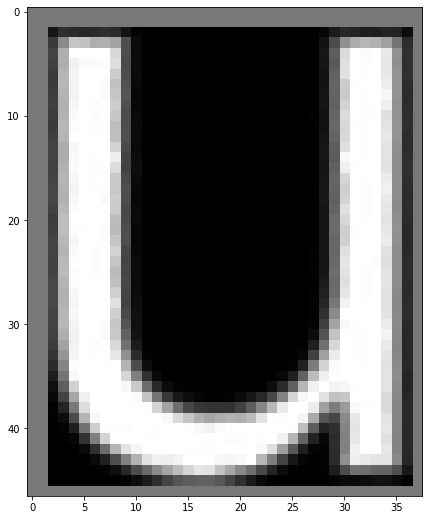

v


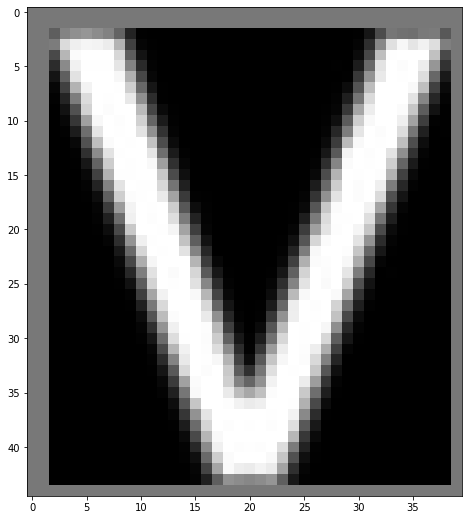

s


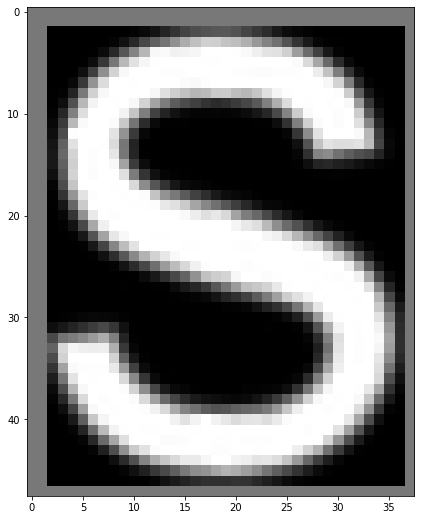

e


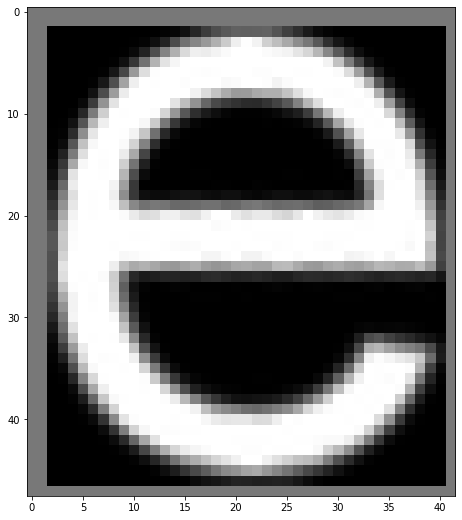

.


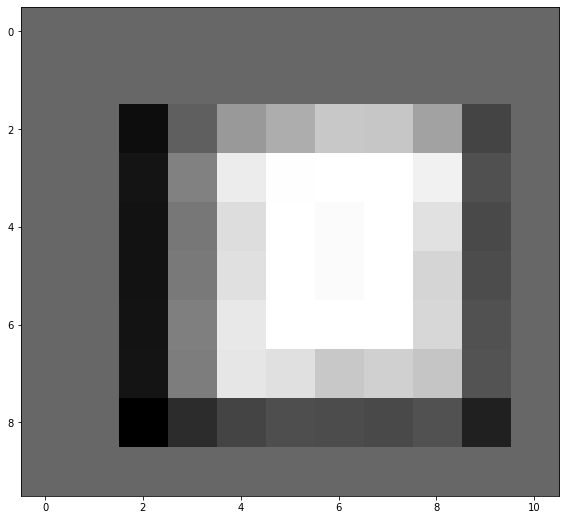

d


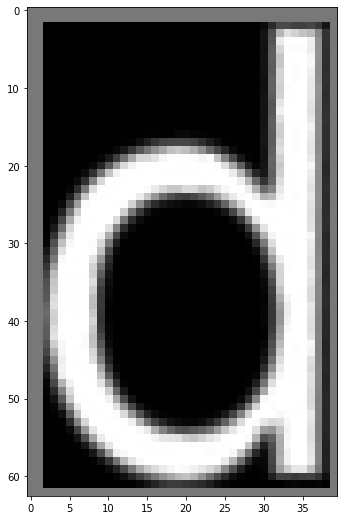

t


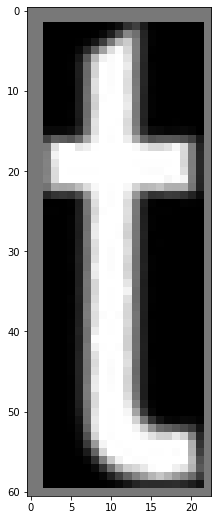

.


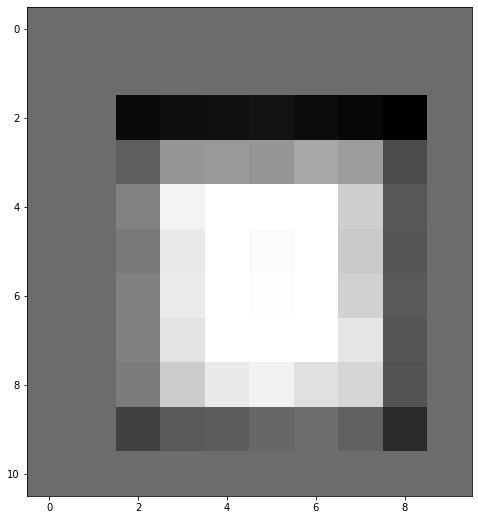

l


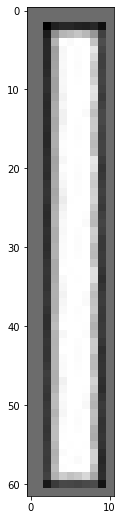

t


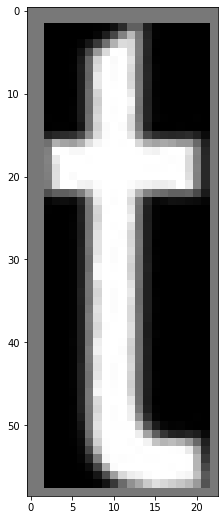

b


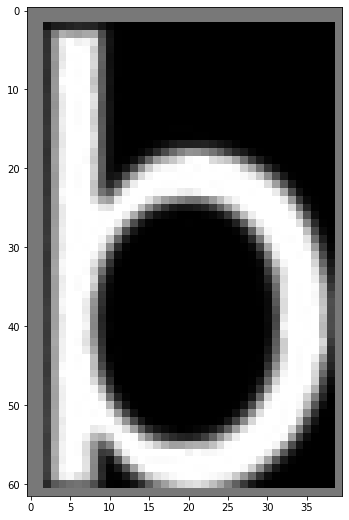

.


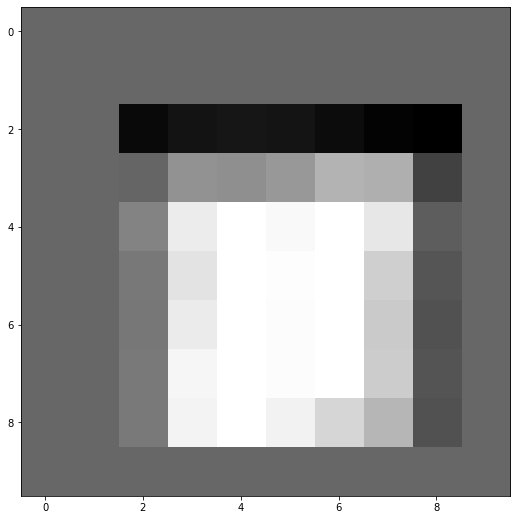

t


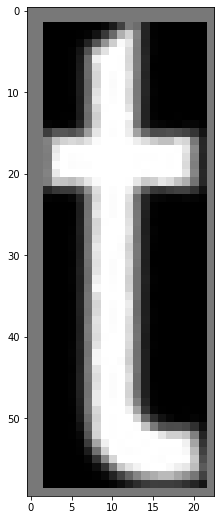

f


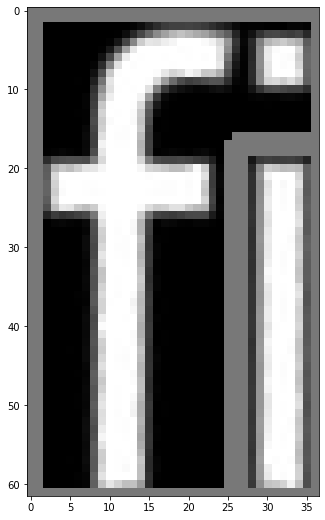

.


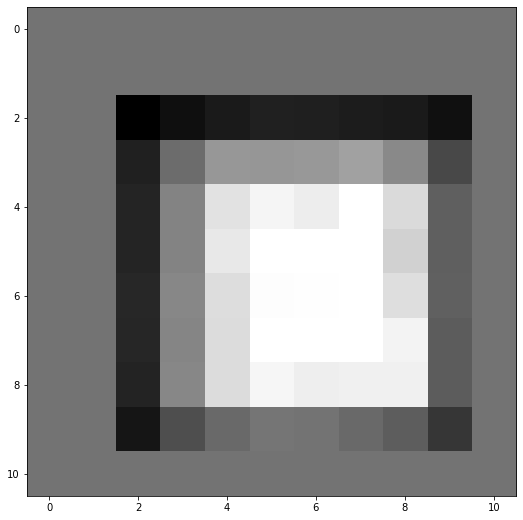

b


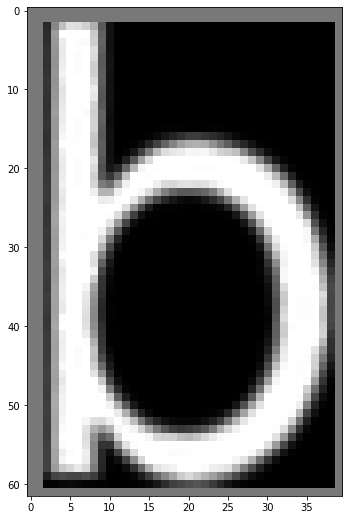

l


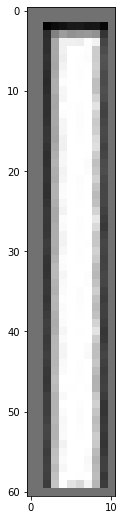

.


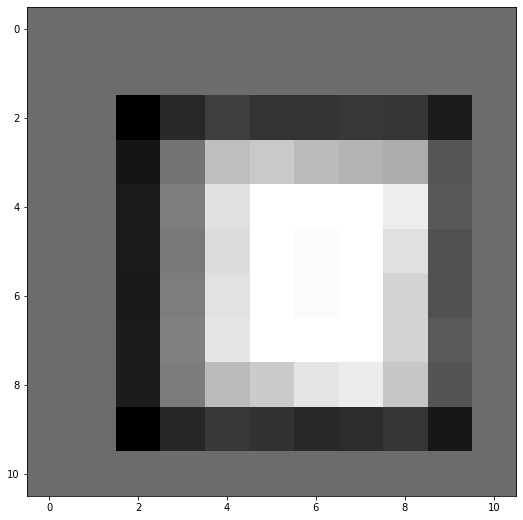

.


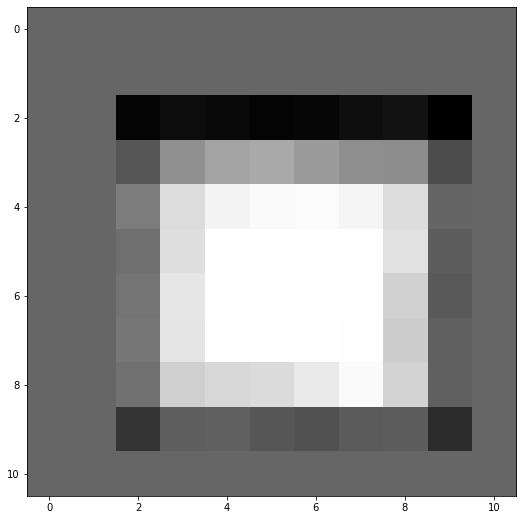

.


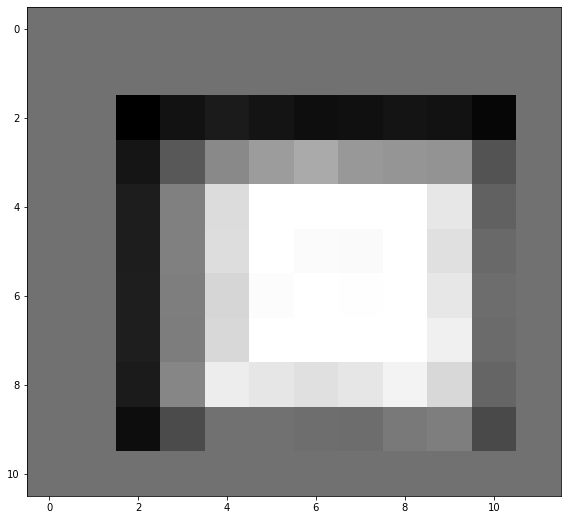

u


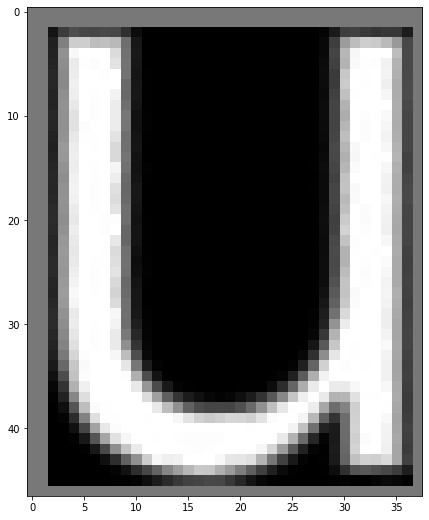

e


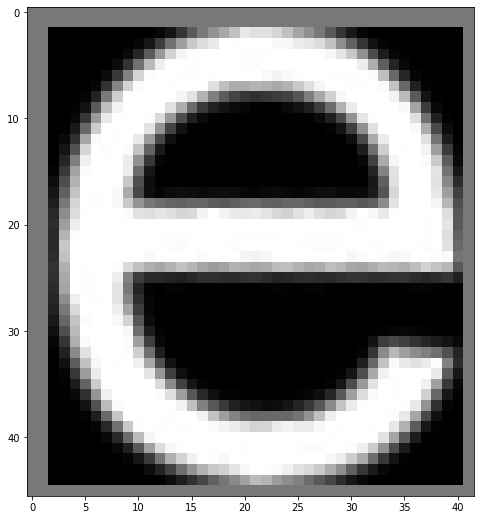

s


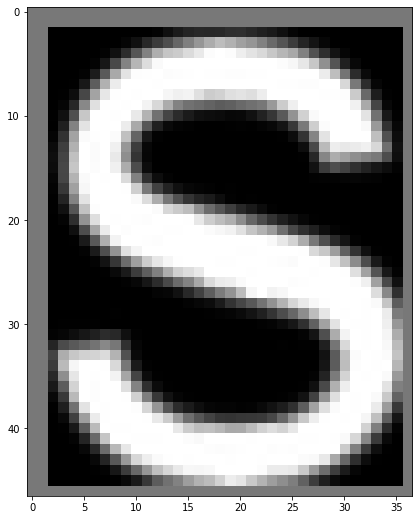

a


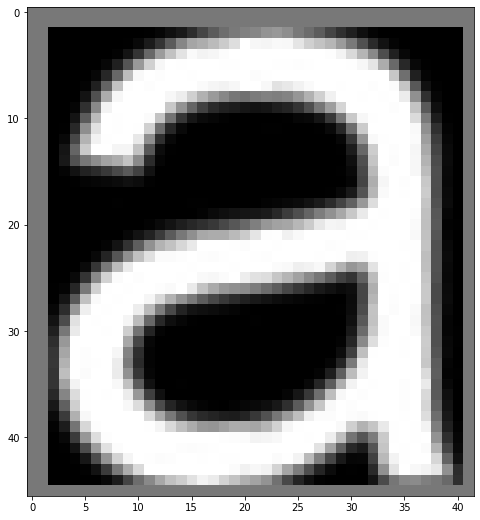

i


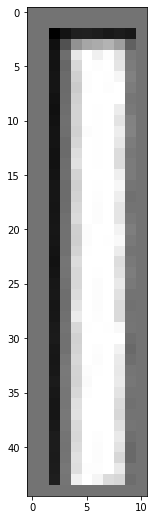

u


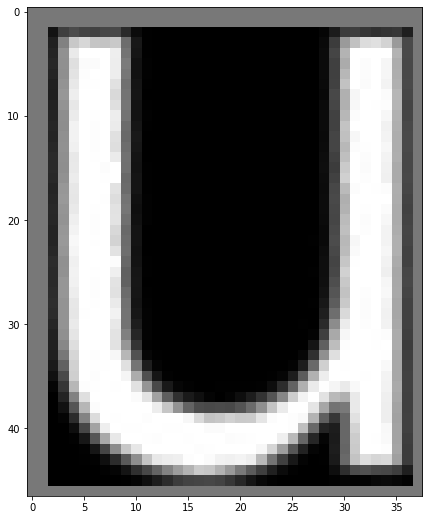

u


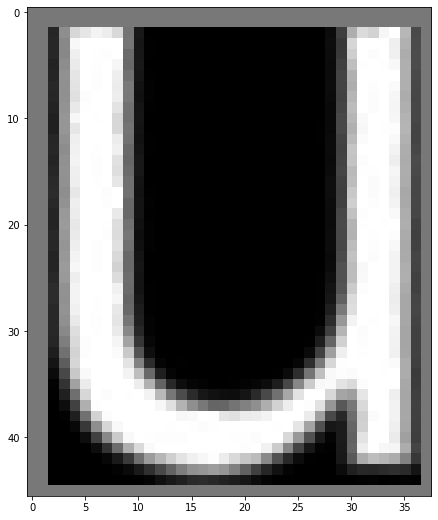

g


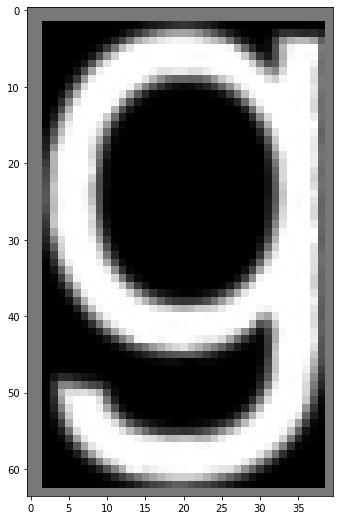

e


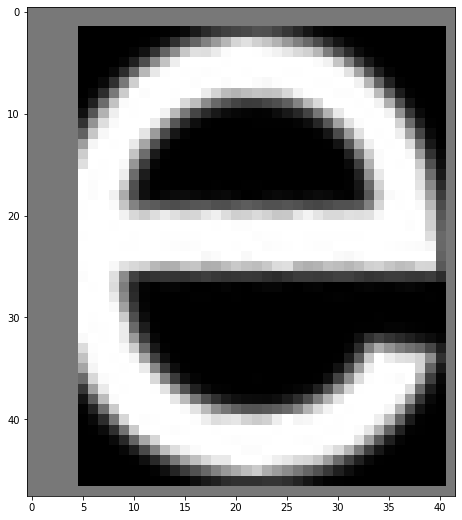

c


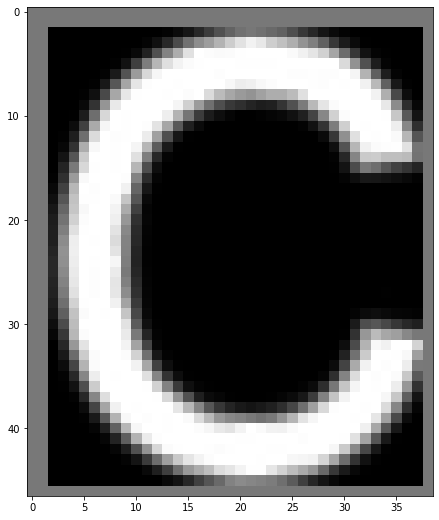

i


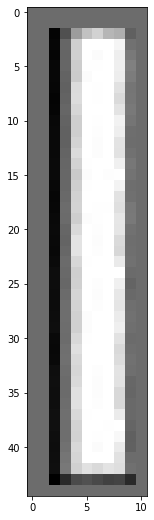

i


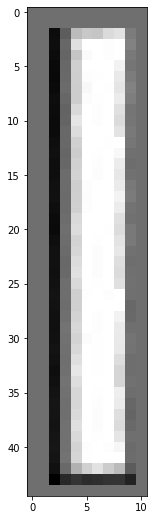

i


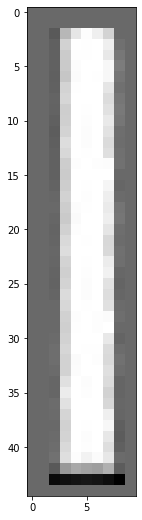

a


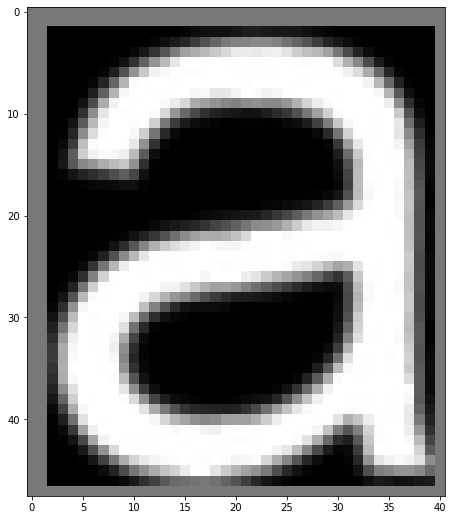

m


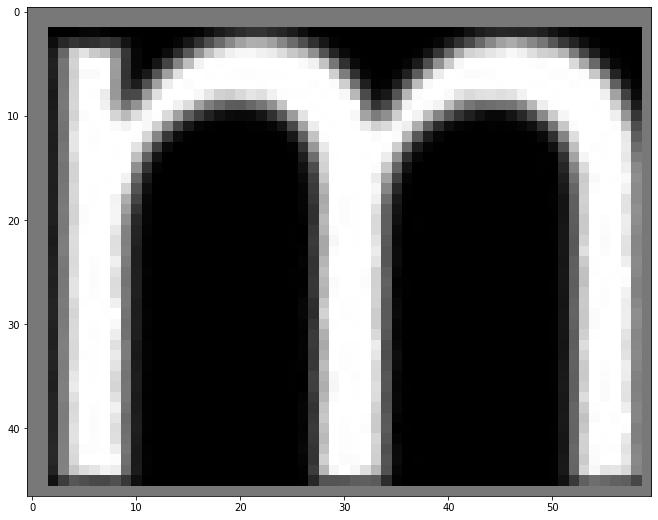

a


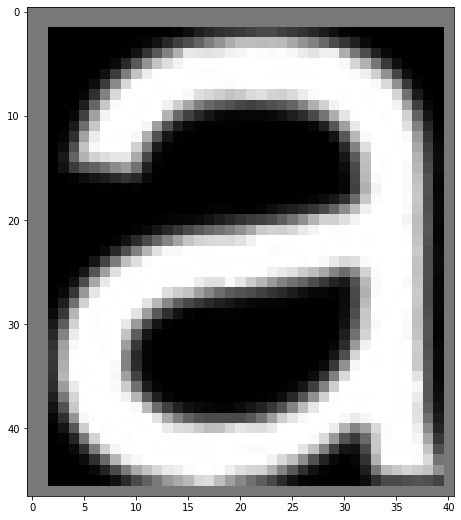

n


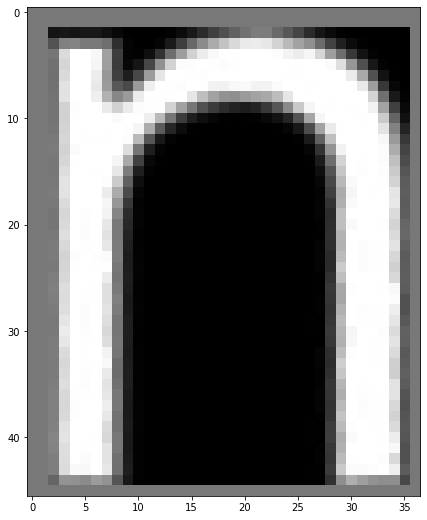

n


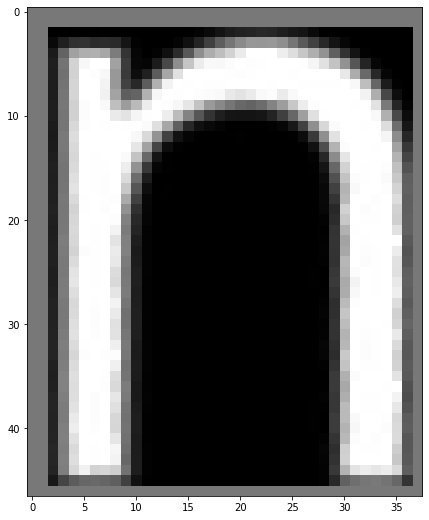

p


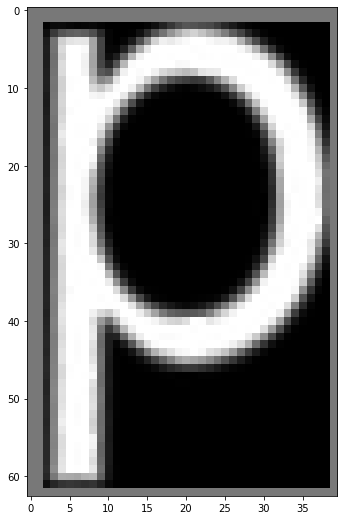

c


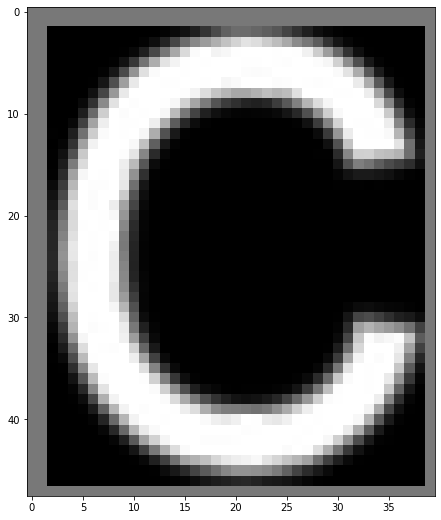

u


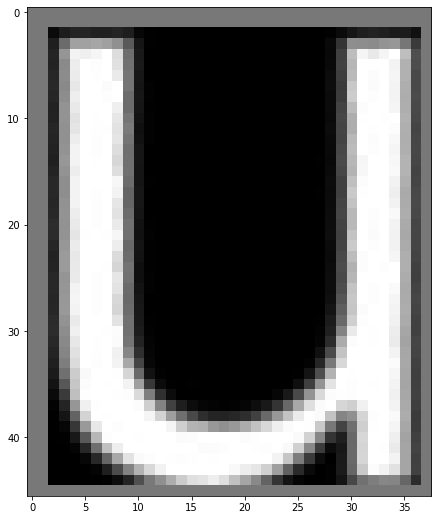

m


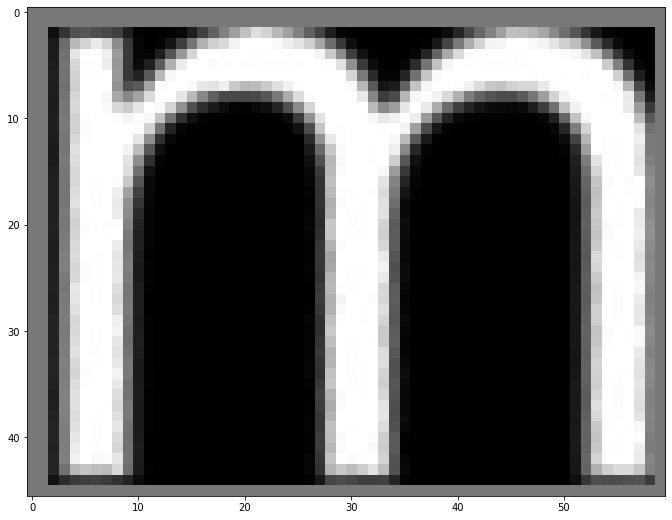

i


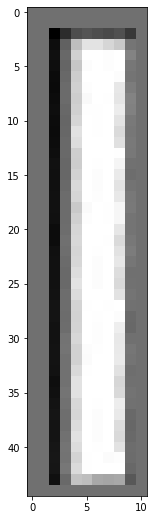

n


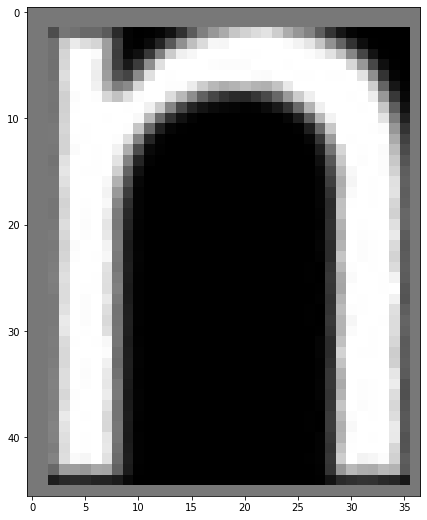

s


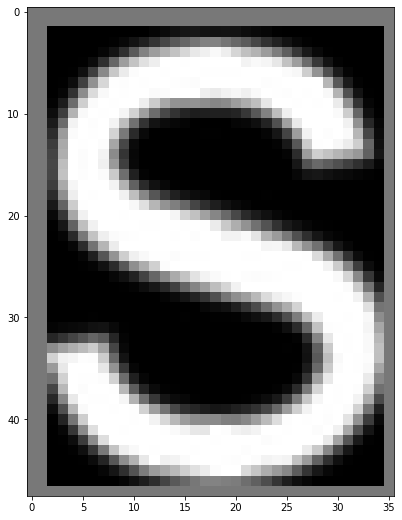

s


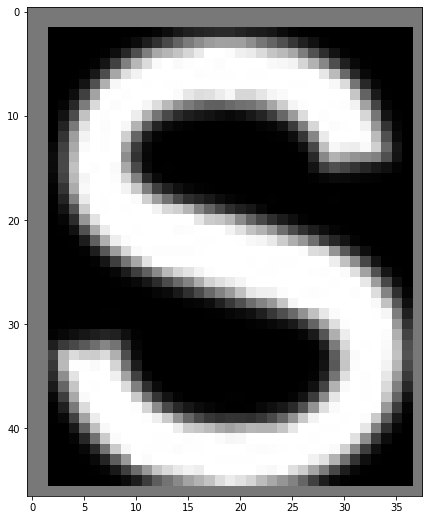

e


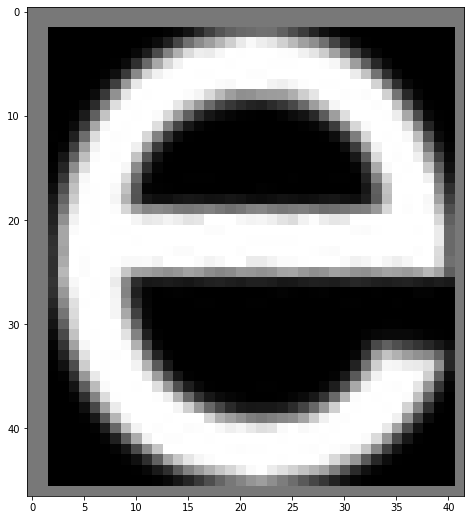

s


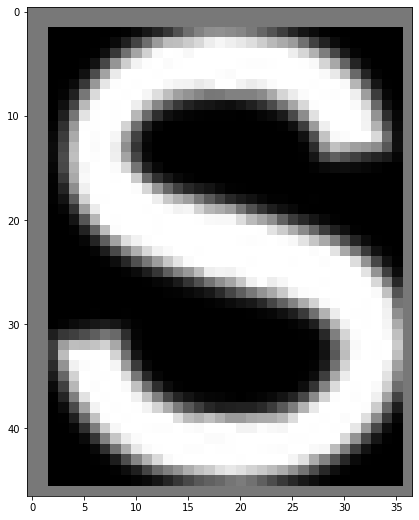

u


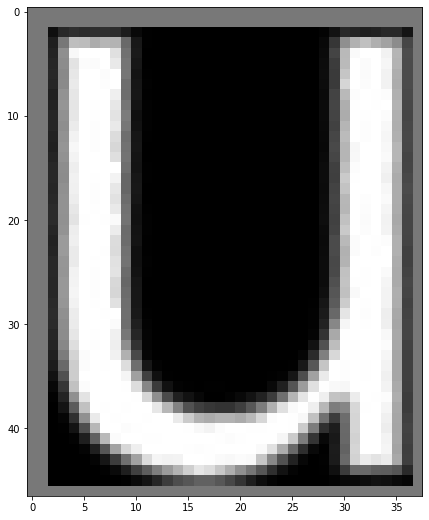

c


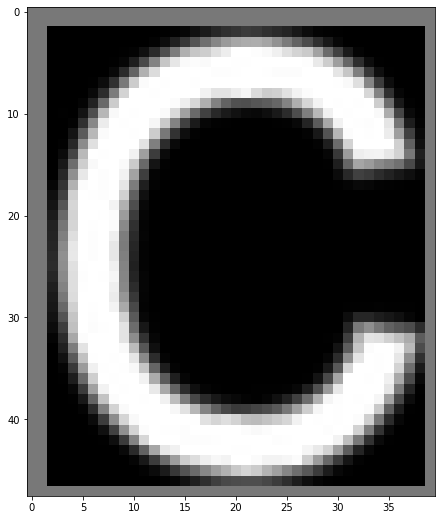

n


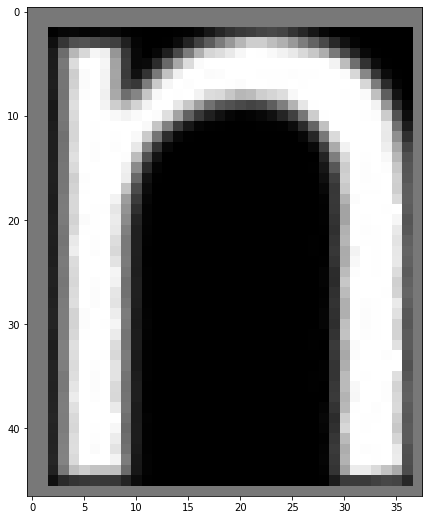

o


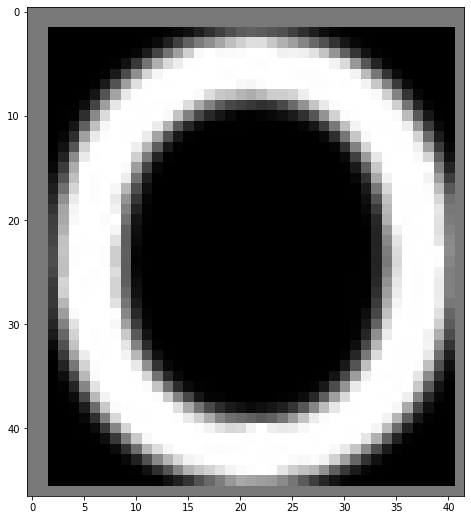

r


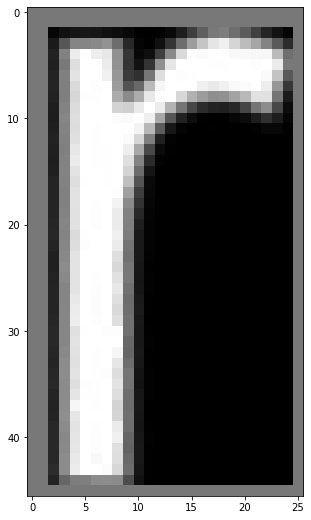

t


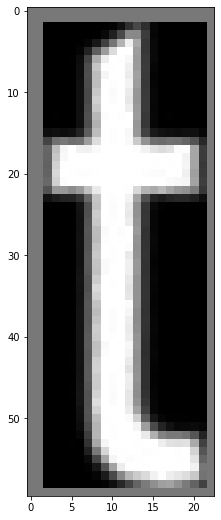

t


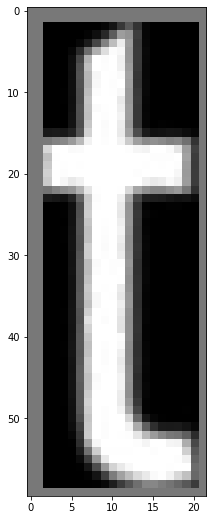

l


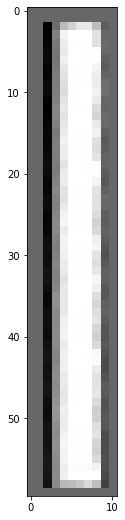

l


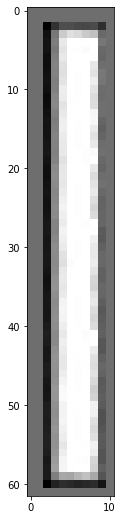

t


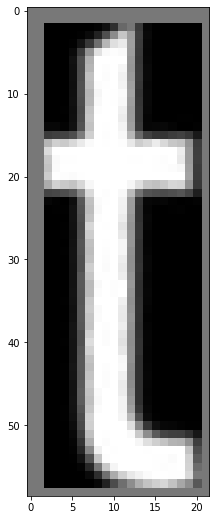

.


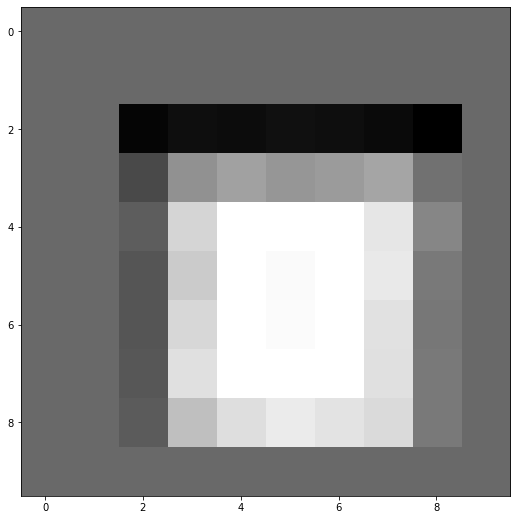

f


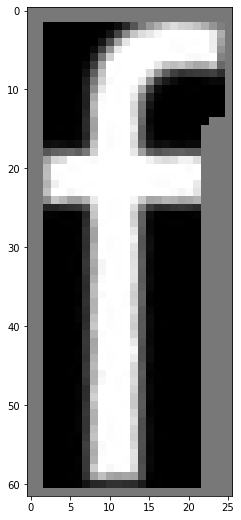

l


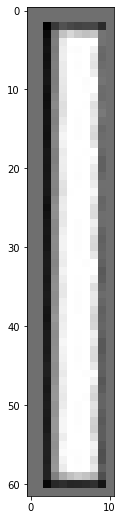

l


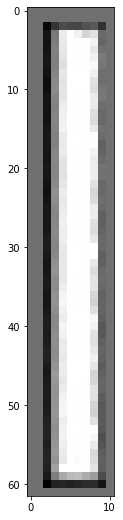

.


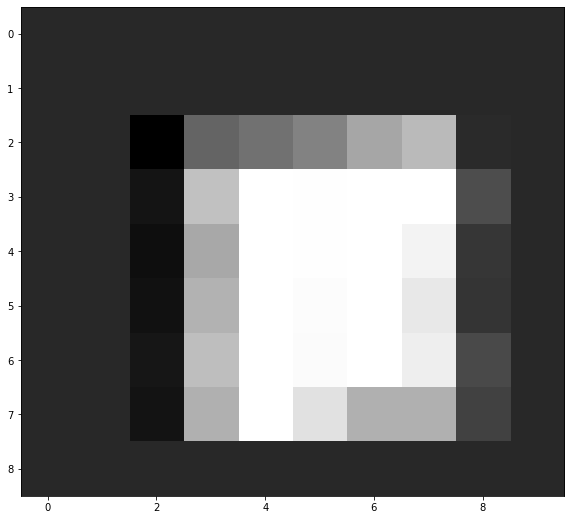

.


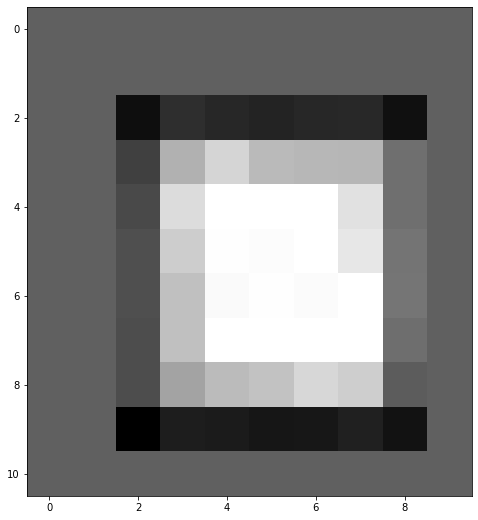

.


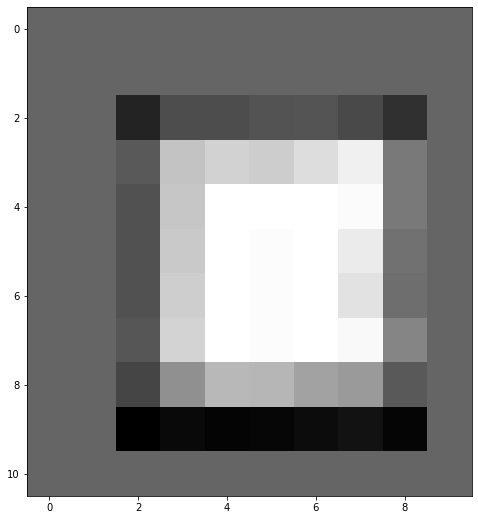

.


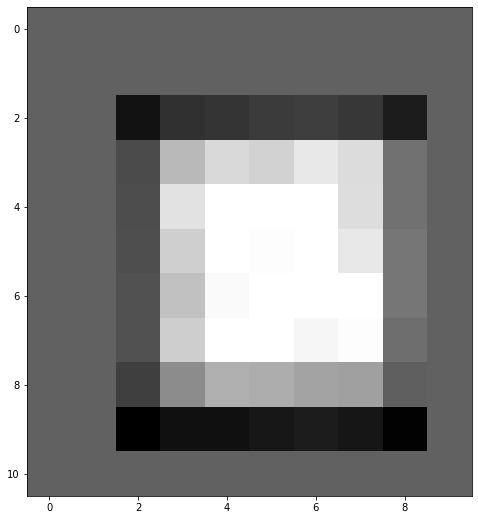

h


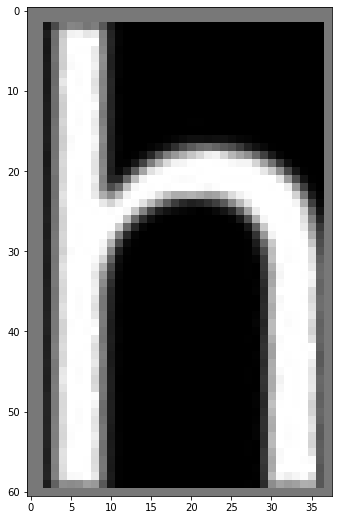

,


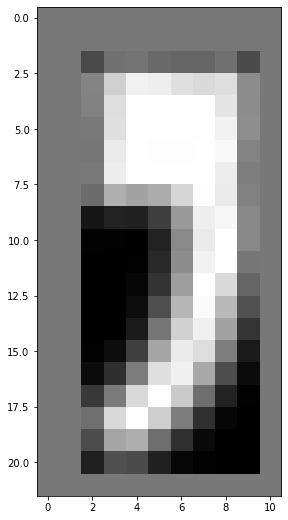

.


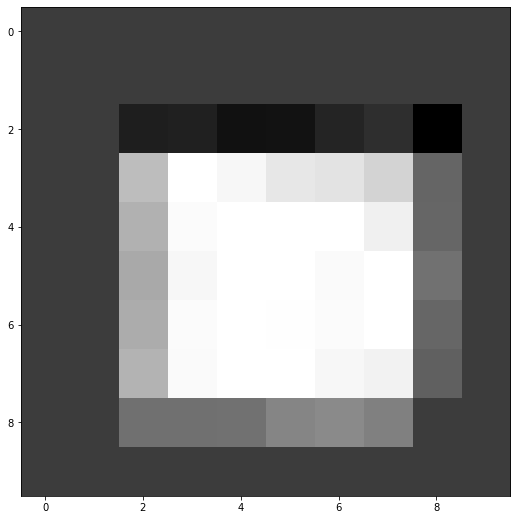

a


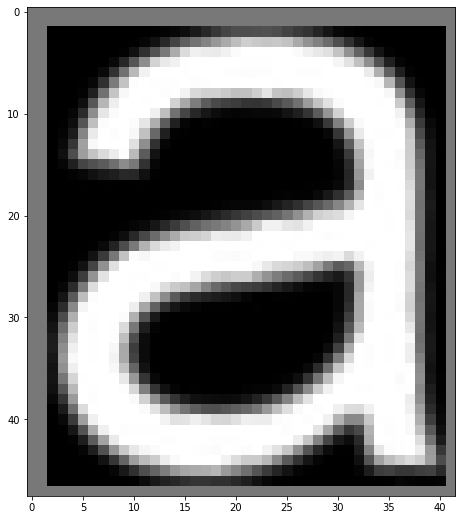

s


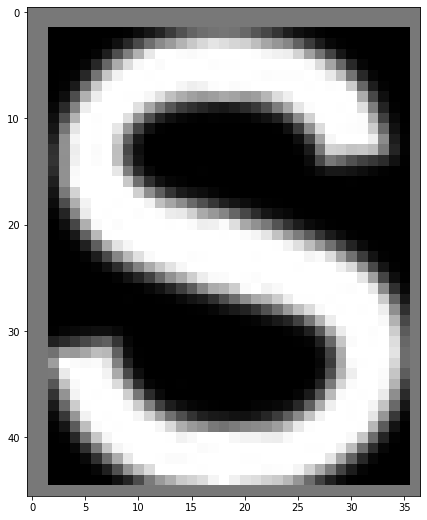

u


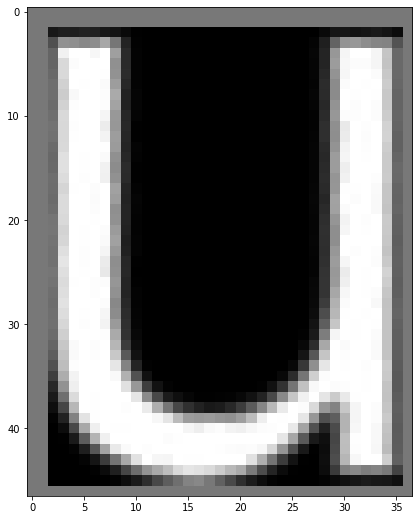

e


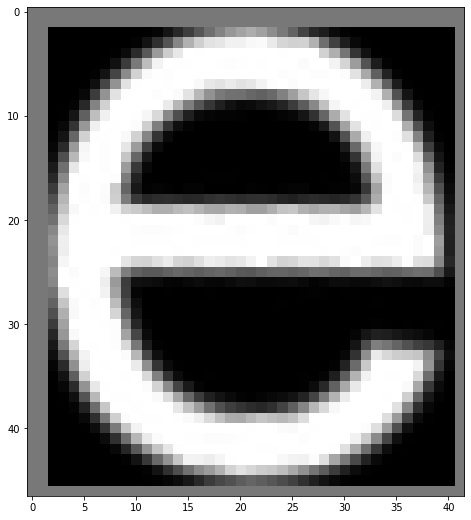

m


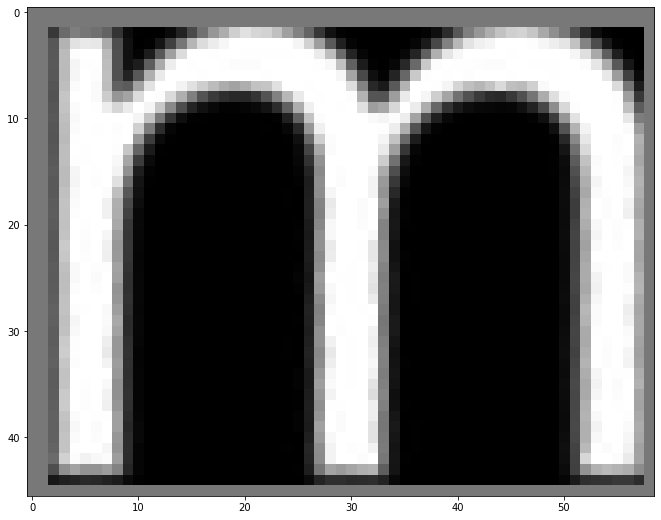

i


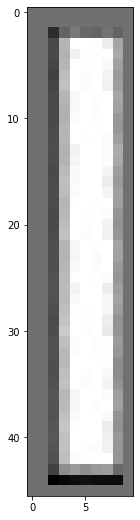

i


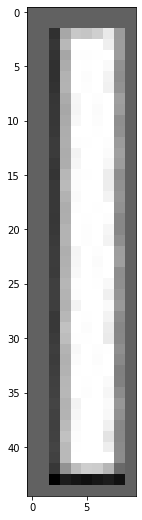

m


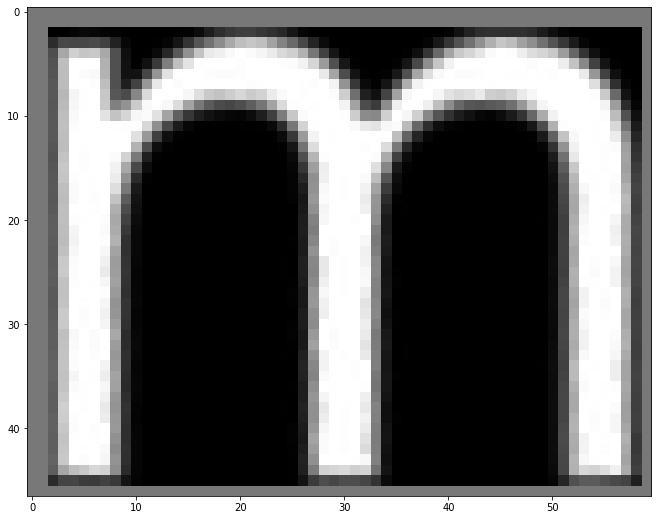

s


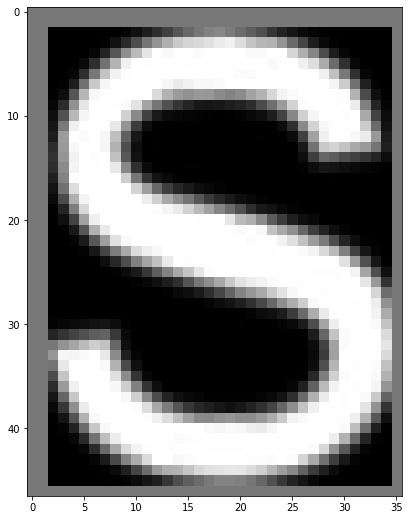

s


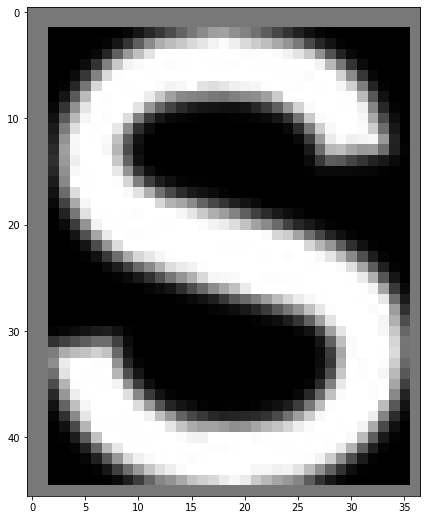

i


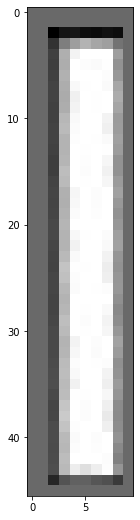

n


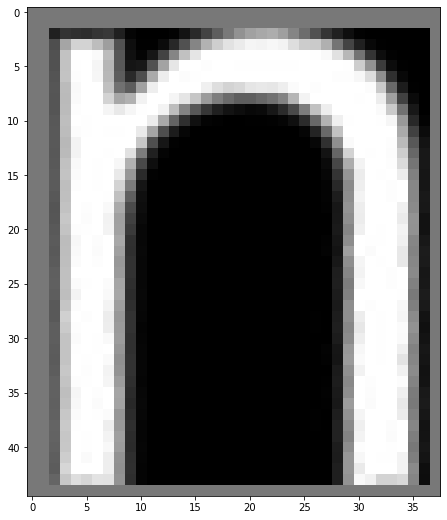

g


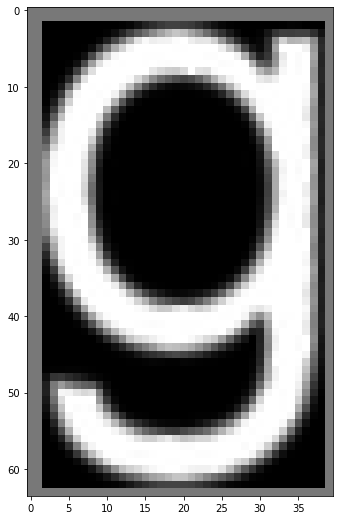

s


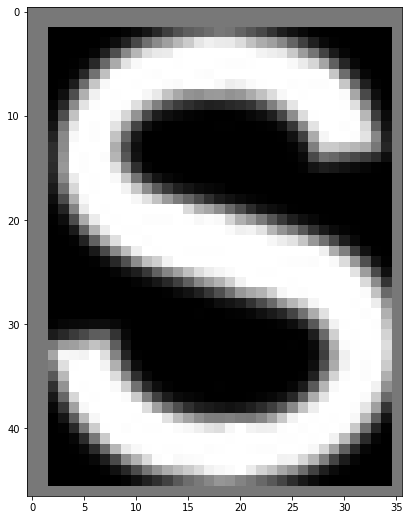

e


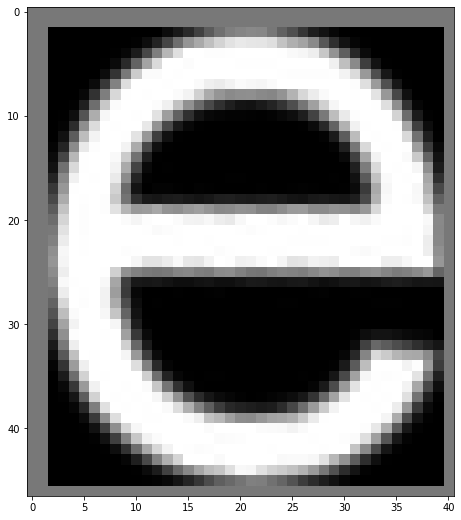

a


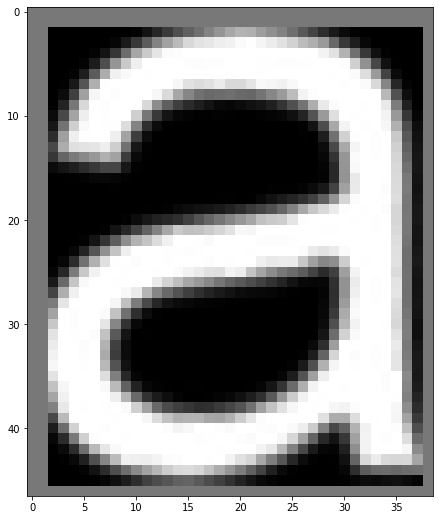

o


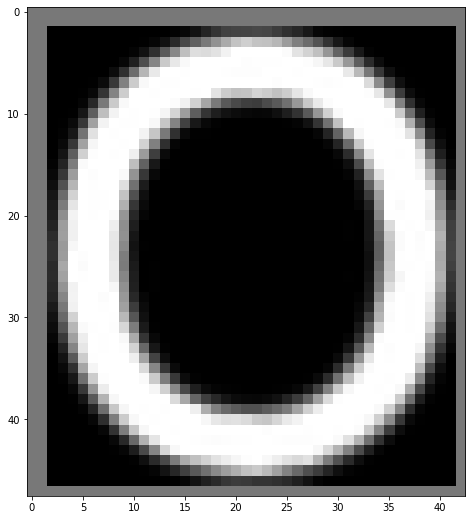

s


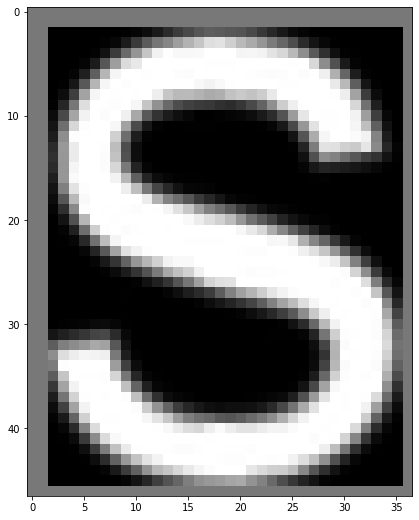

m


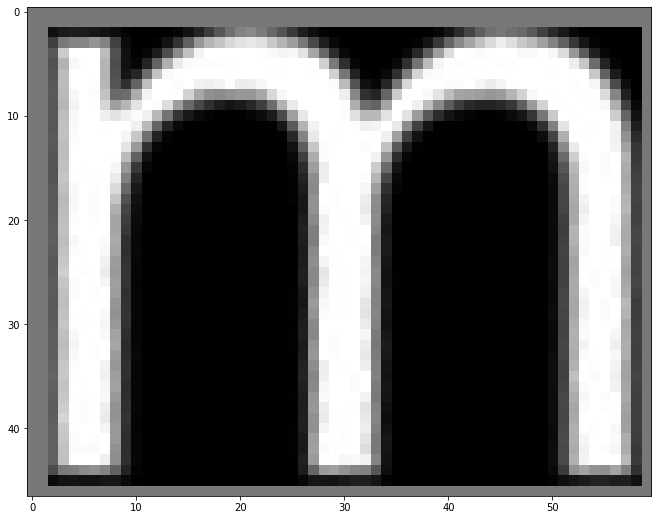

a


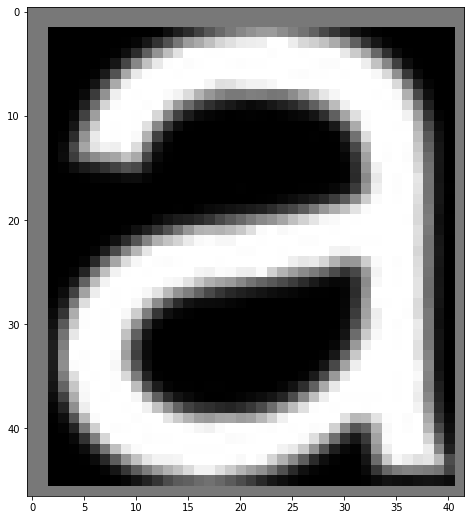

u


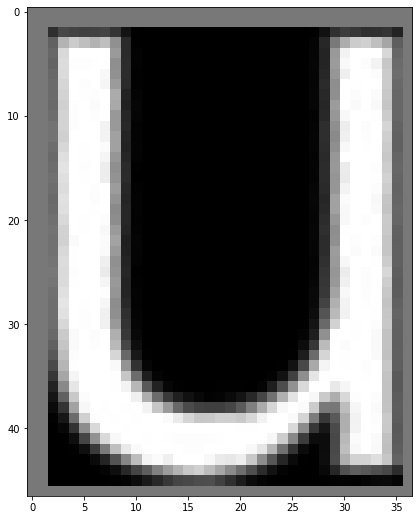

n


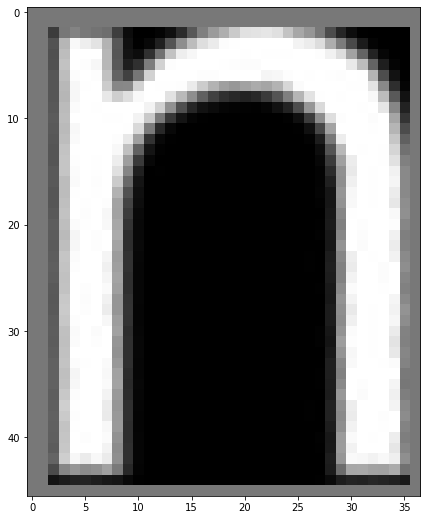

n


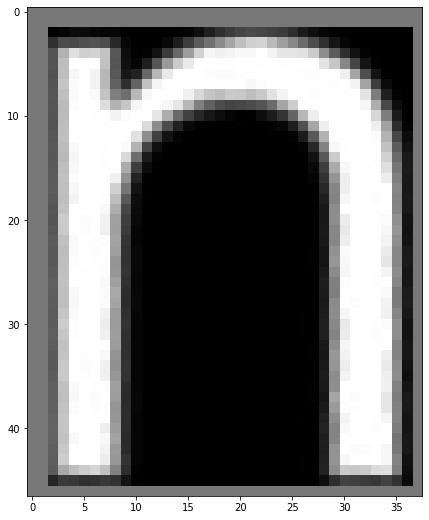

a


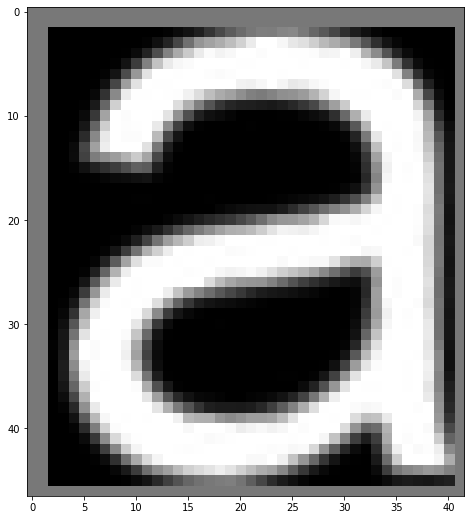

s


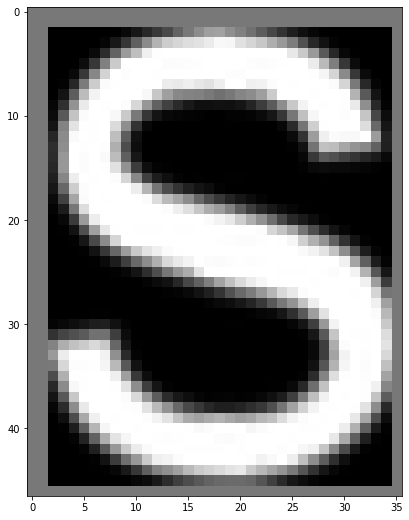

u


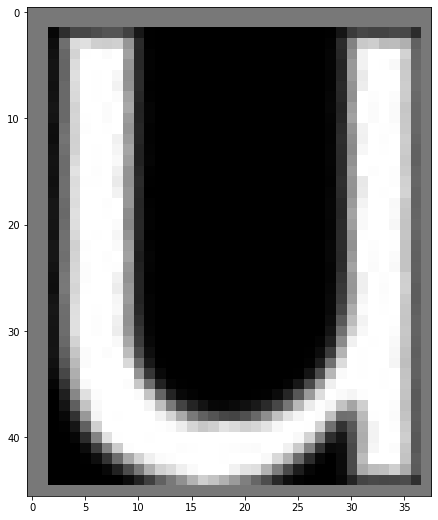

c


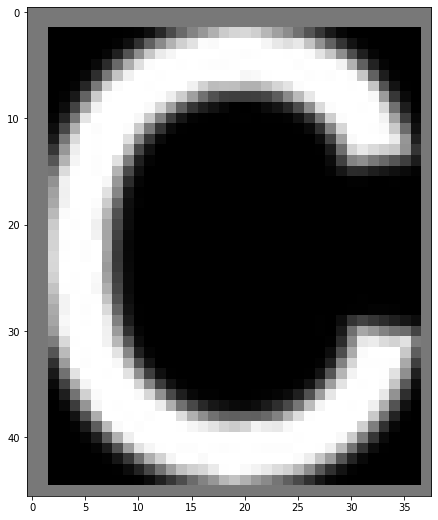

c


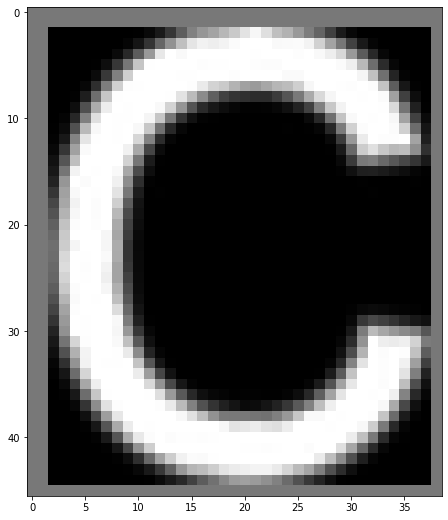

m


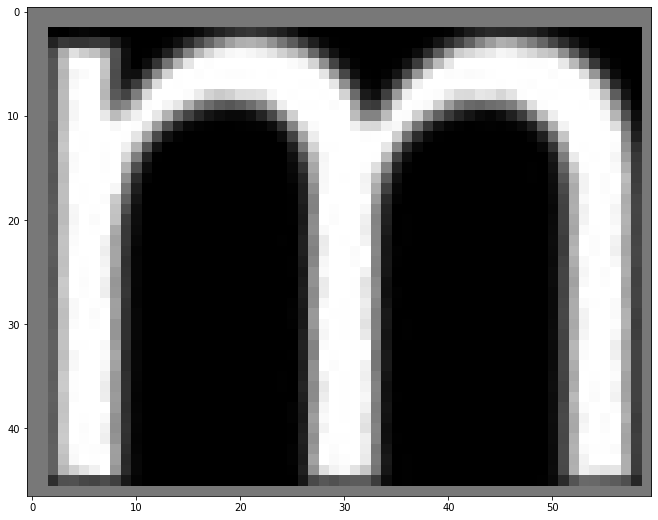

a


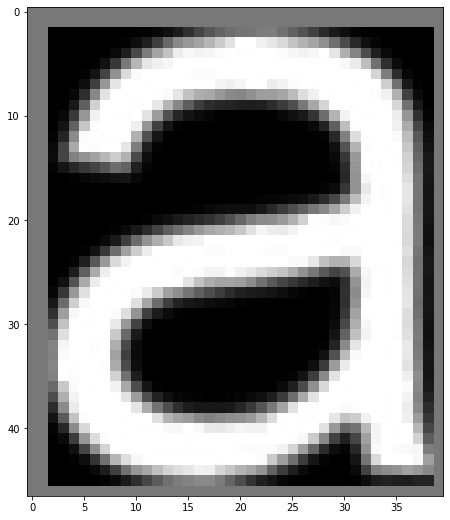

t


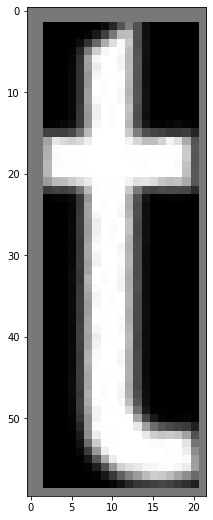

t


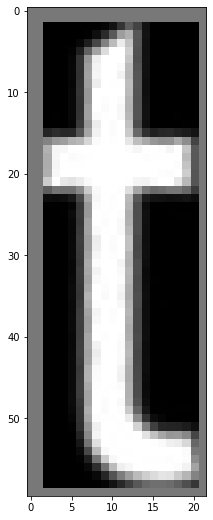

.


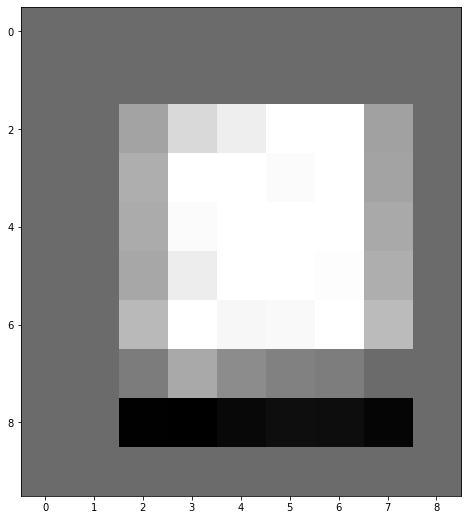

l


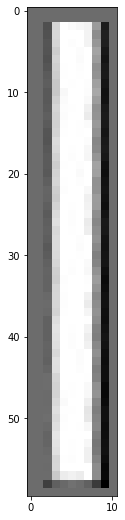

.


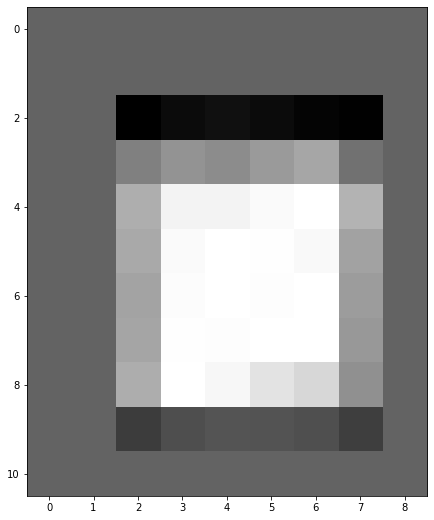

.


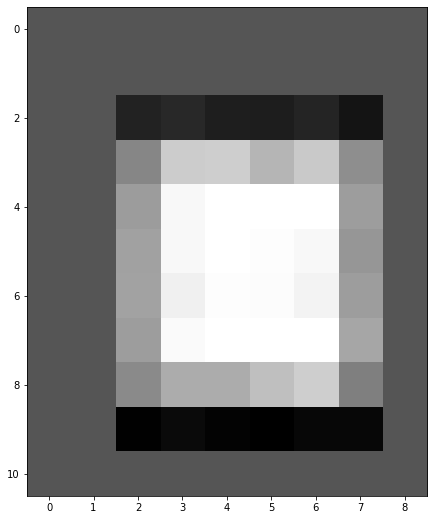

d


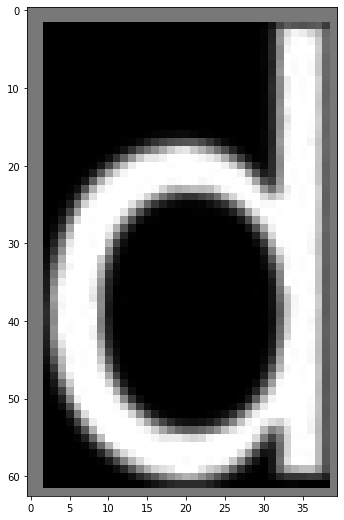

d


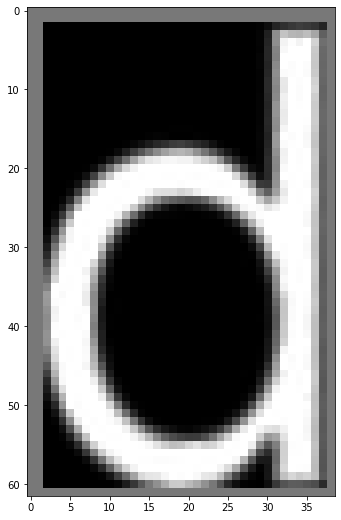

l


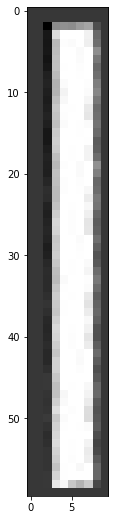

l


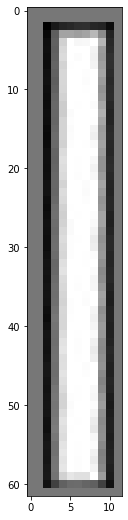

.


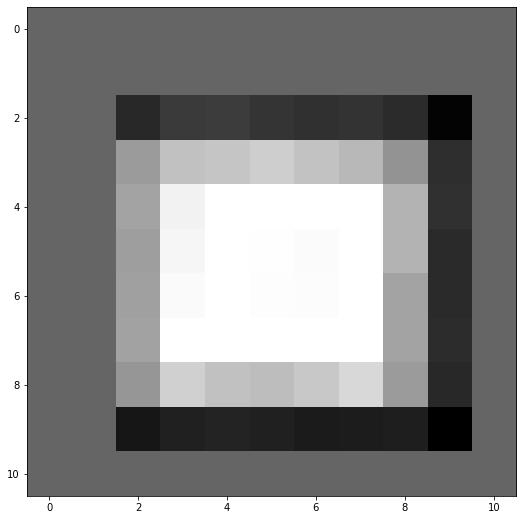

n


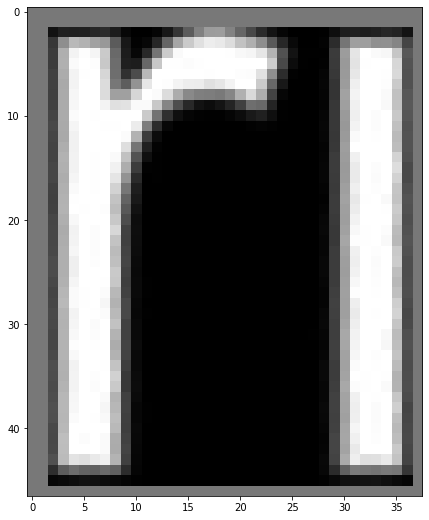

e


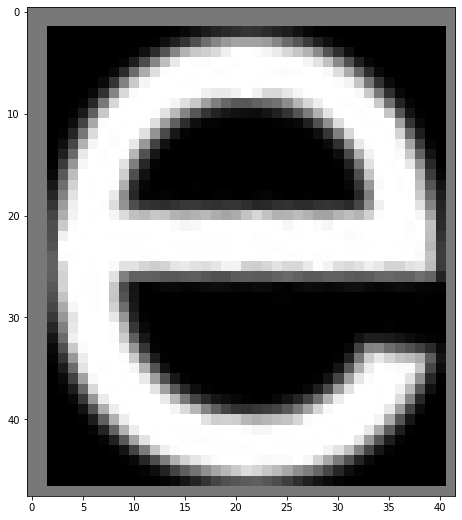

r


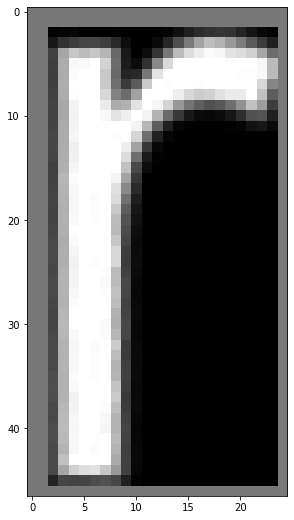

n


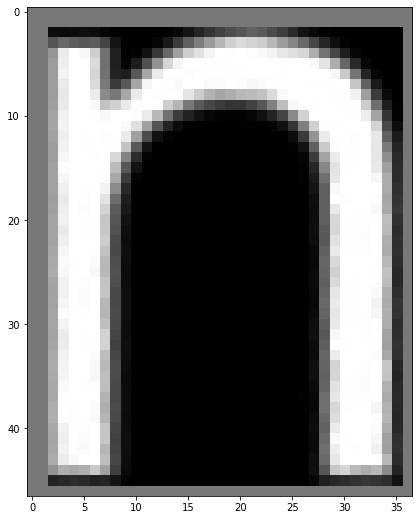

e


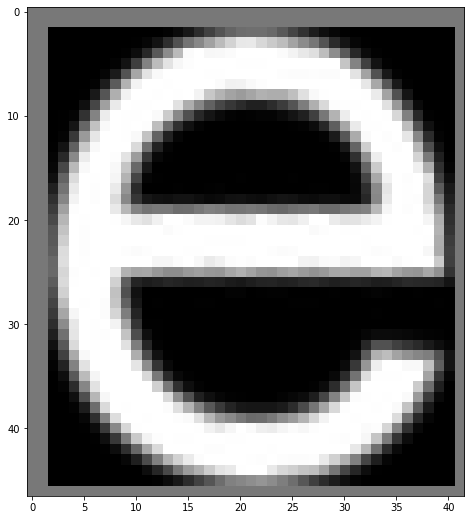

n


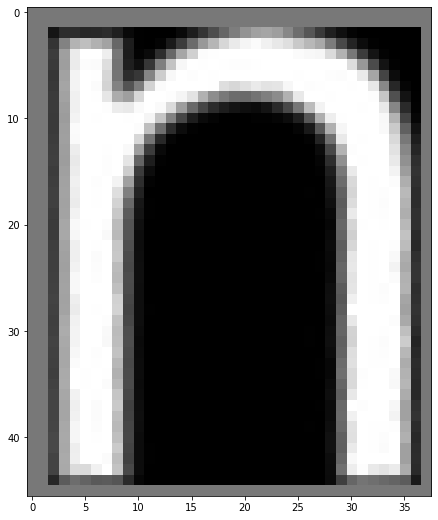

n


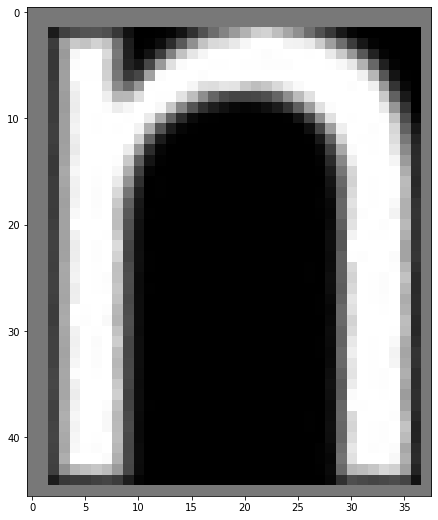

o


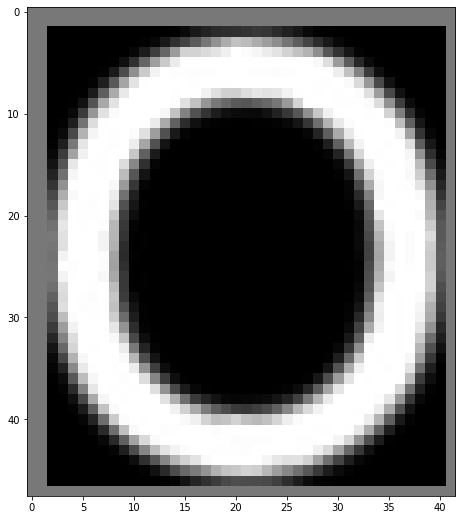

a


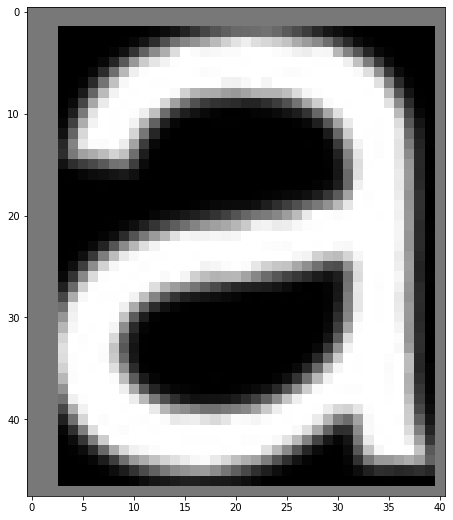

r


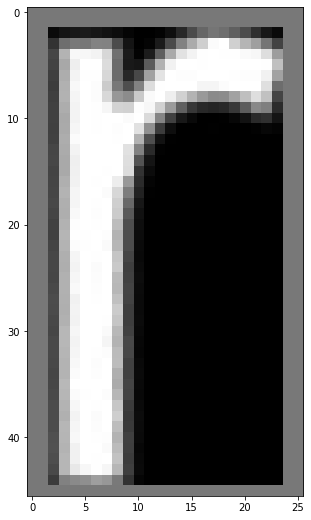

e


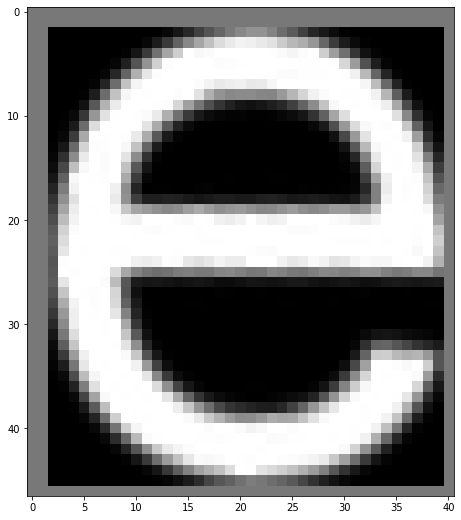

r


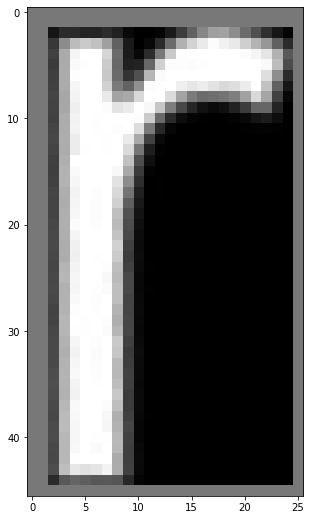

o


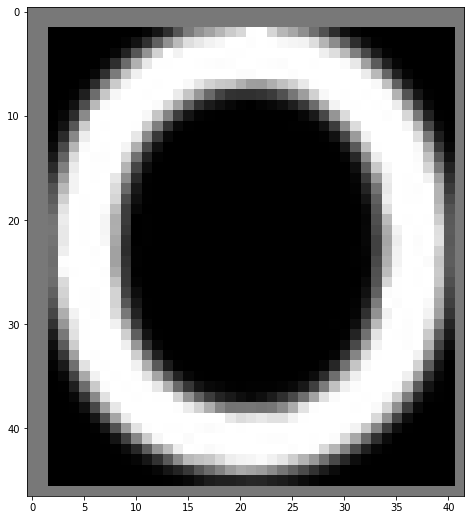

e


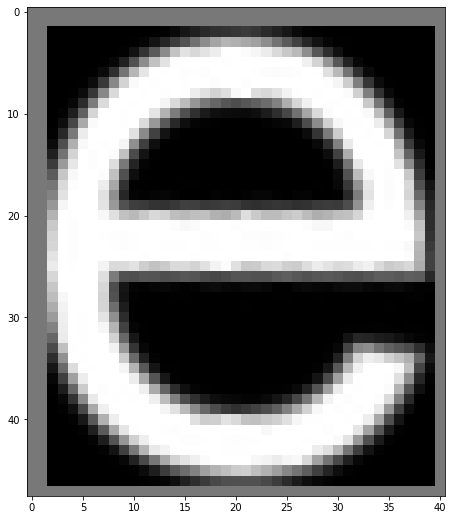

p


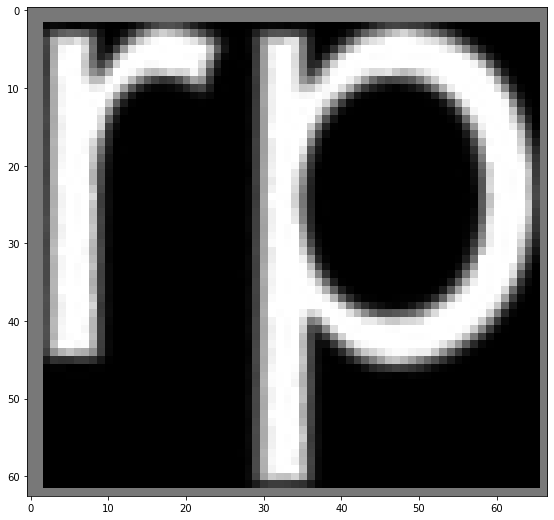

c


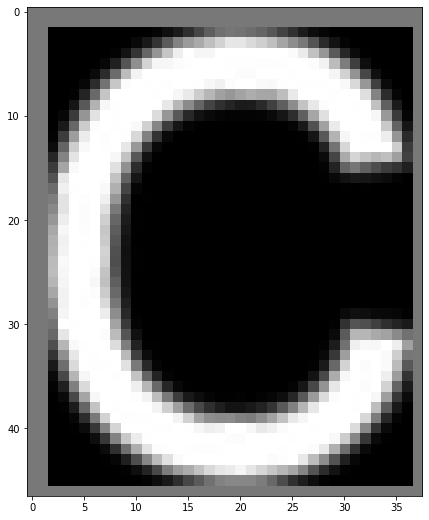

m


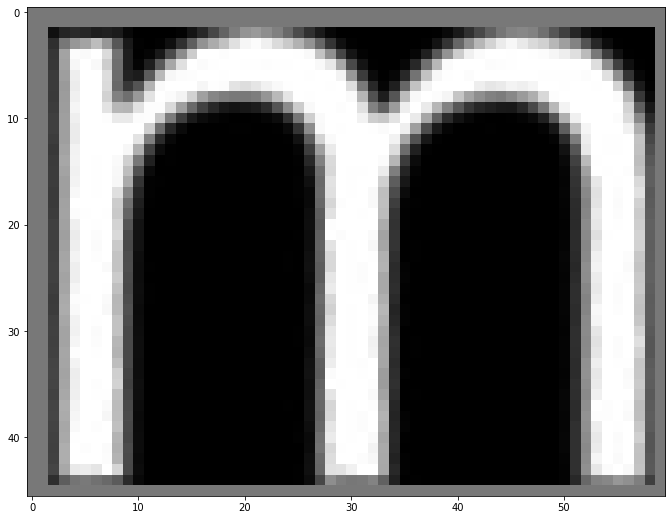

u


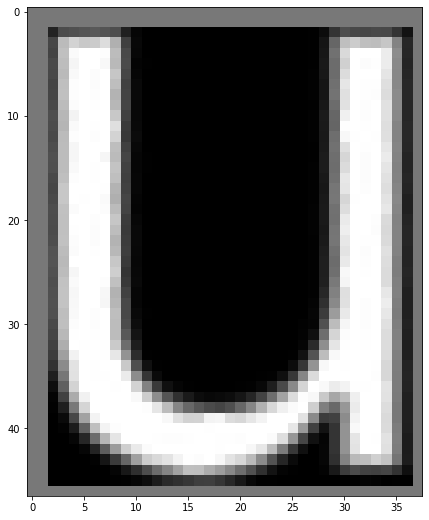

e


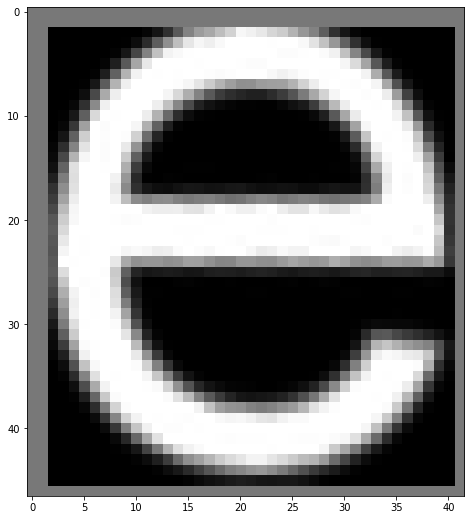

a


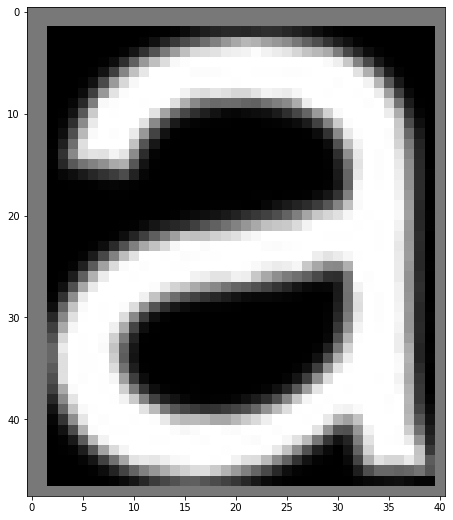

c


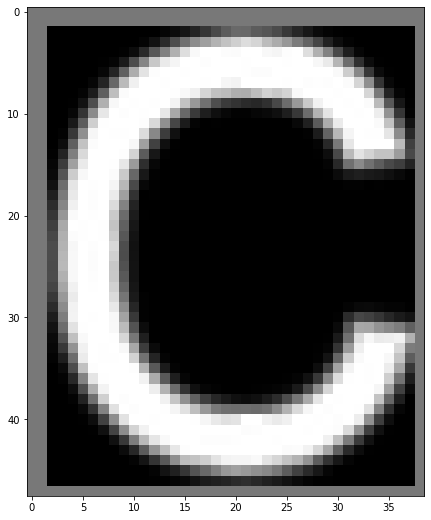

n


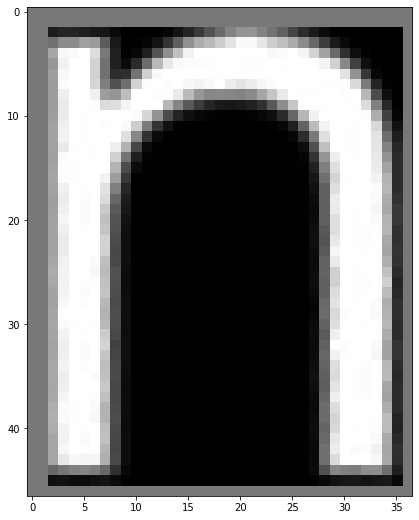

o


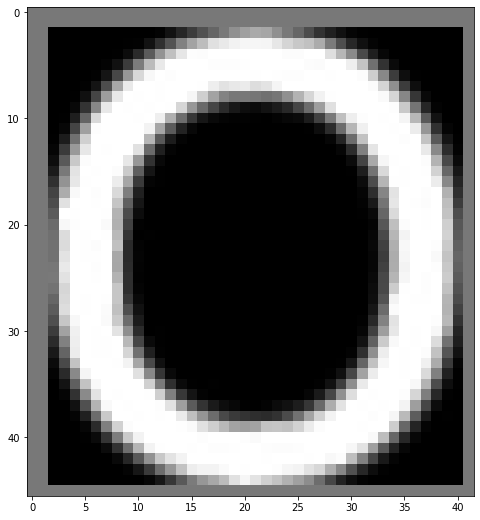

u


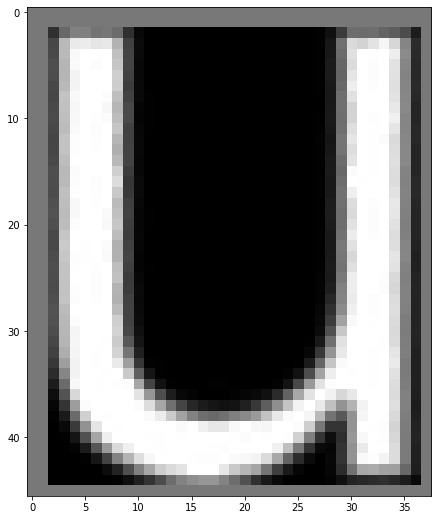

u


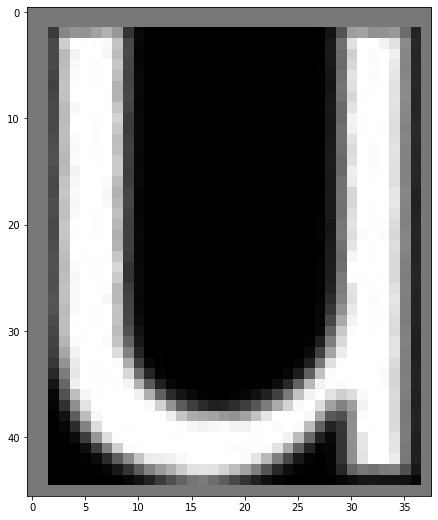

e


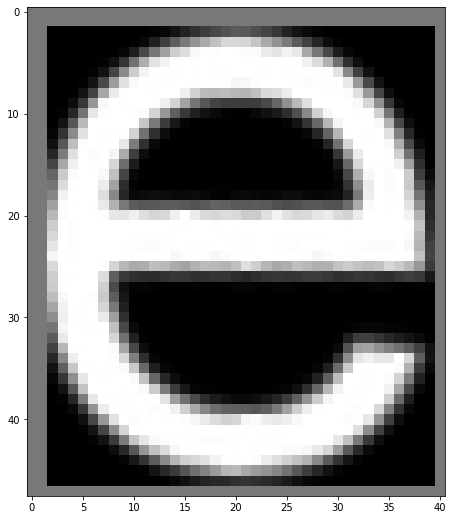

g


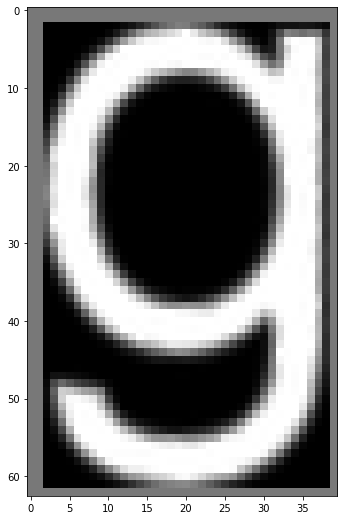

e


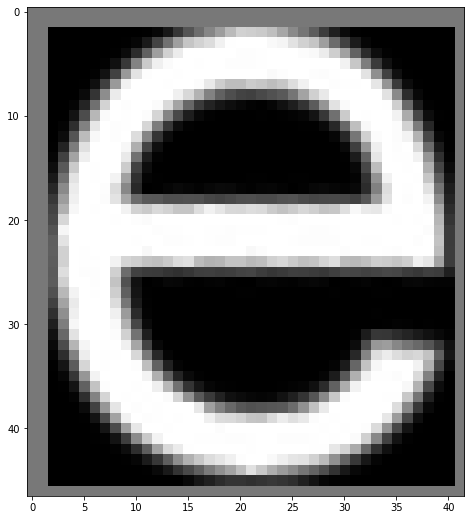

a


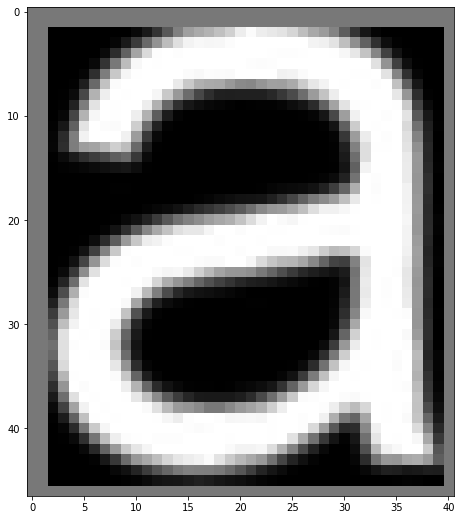

a


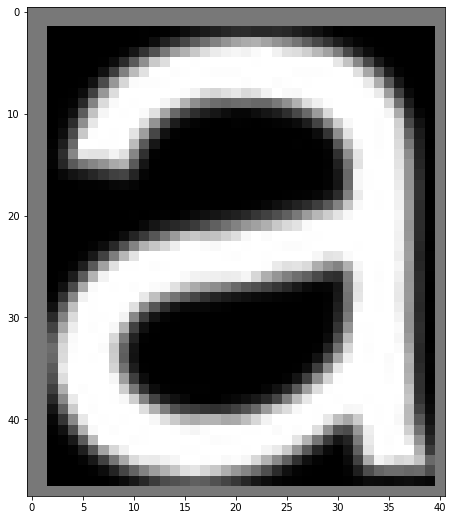

m


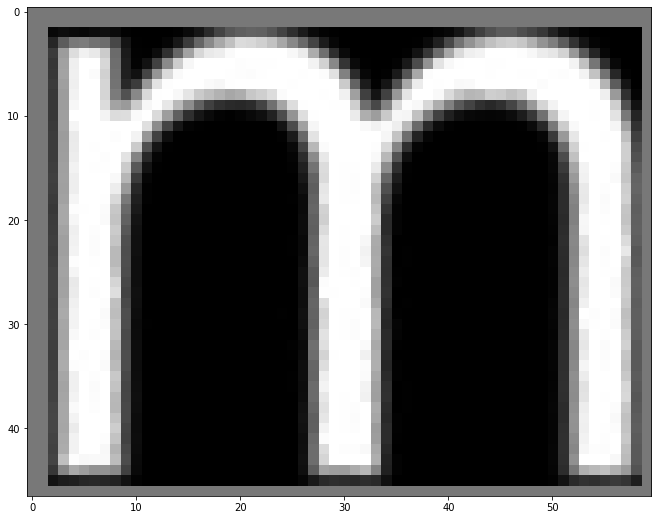

t


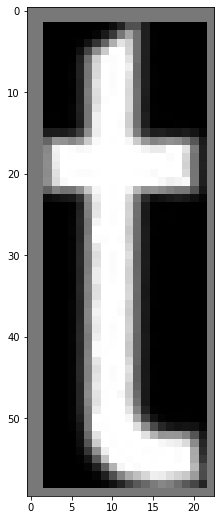

.


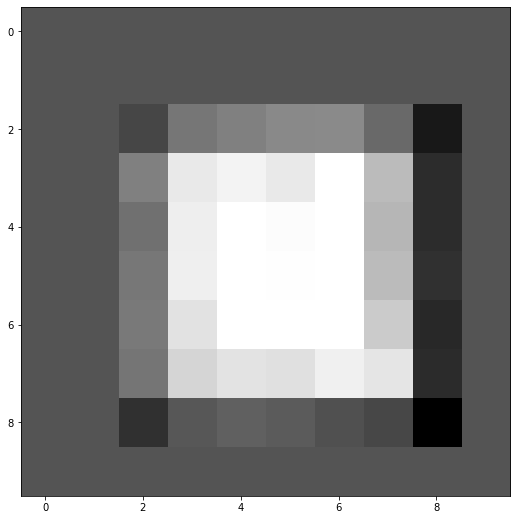

t


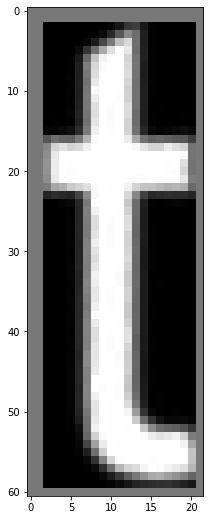

d


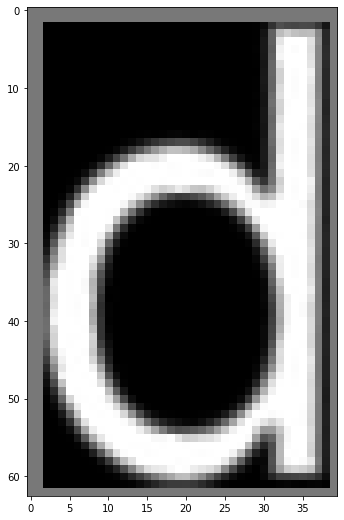

h


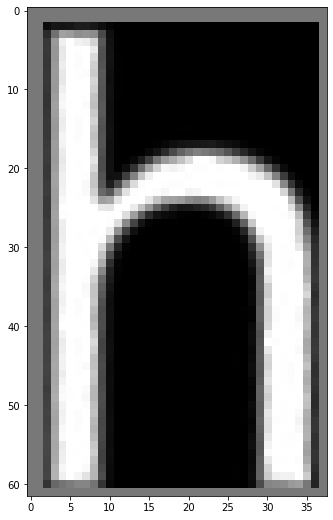

l


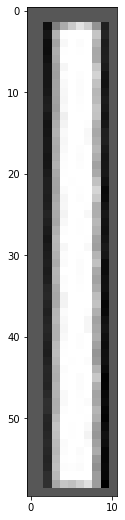

l


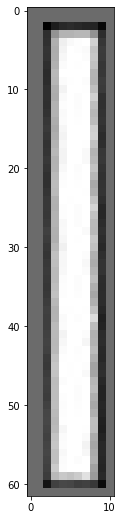

t


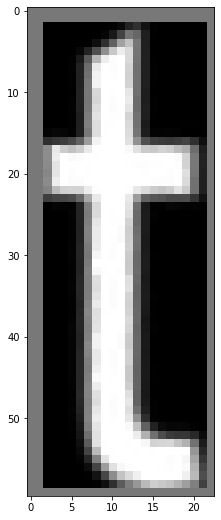

d


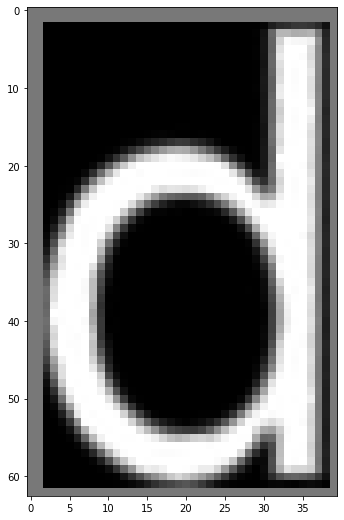

,


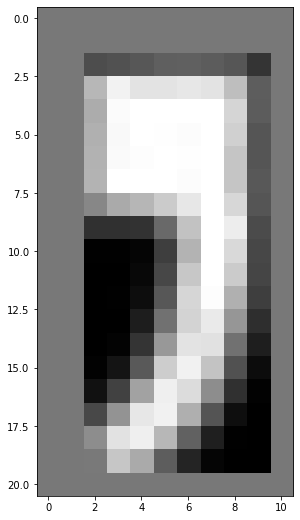

i


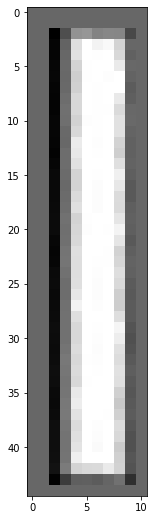

s


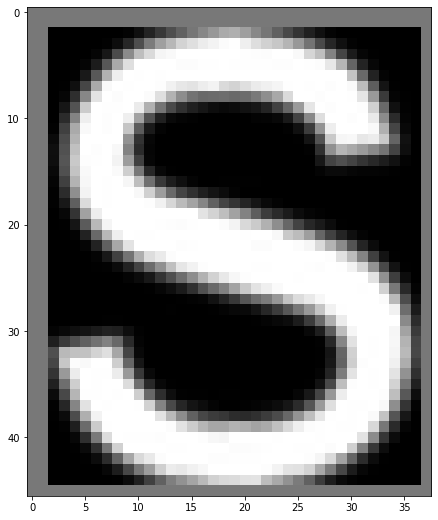

u


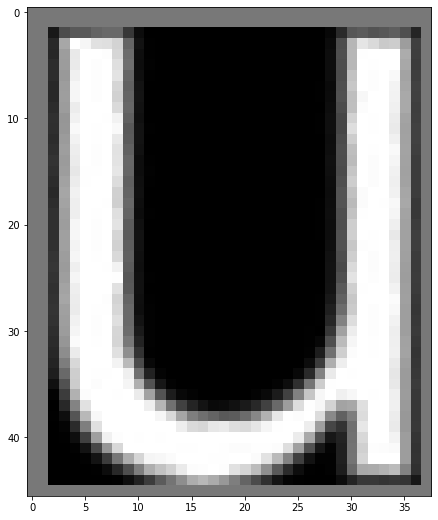

i


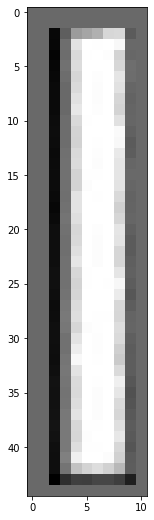

m


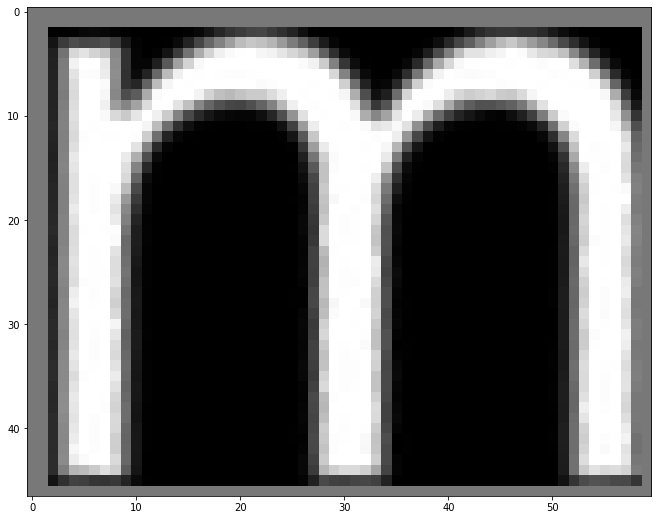

n


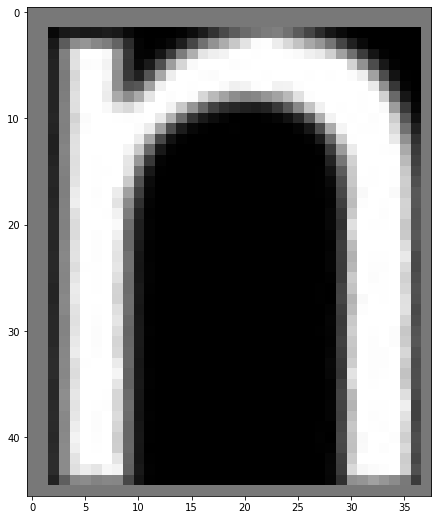

e


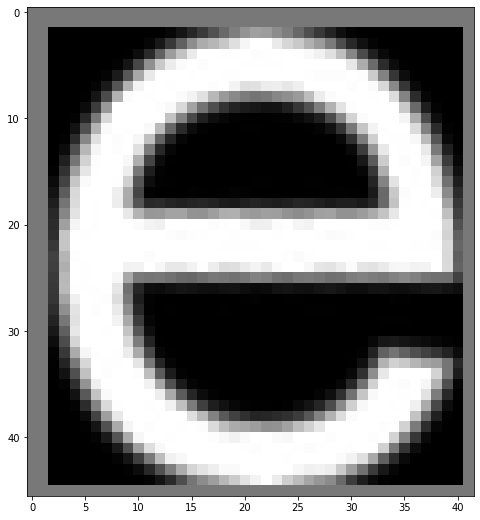

e


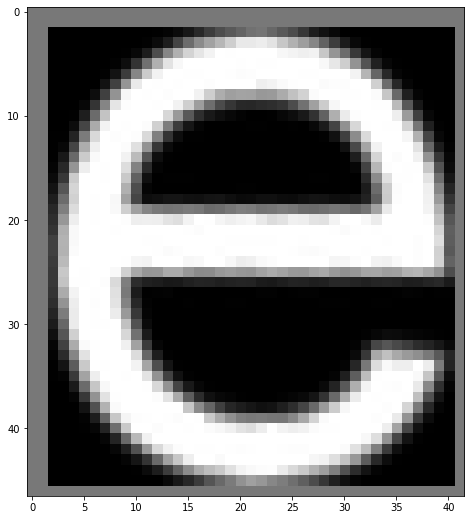

m


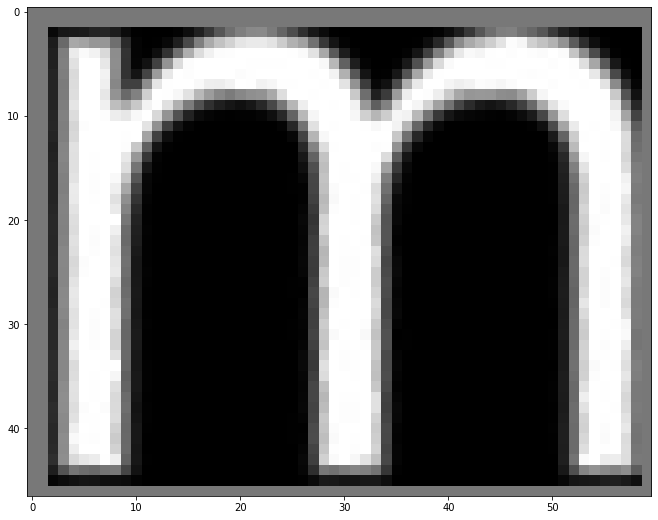

i


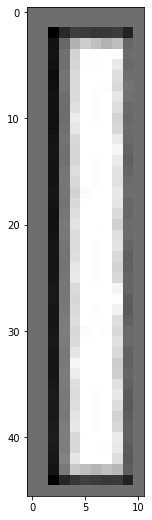

s


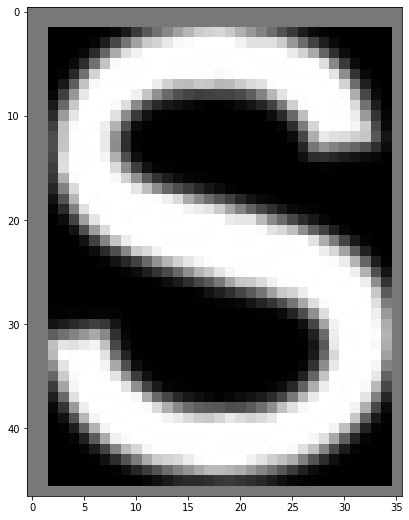

s


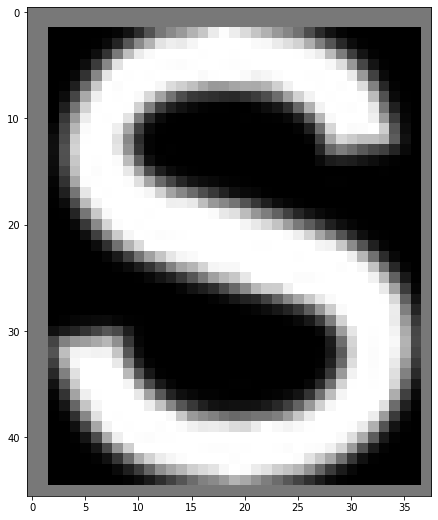

u


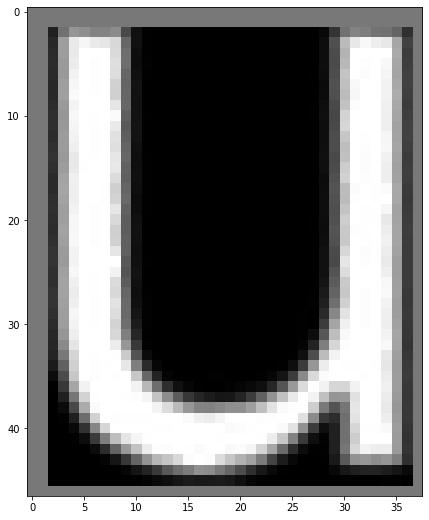

a


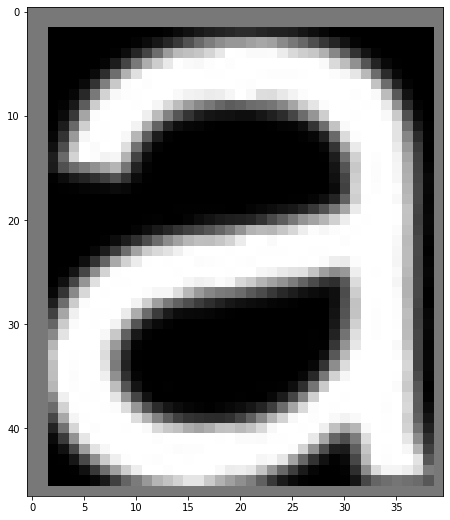

m


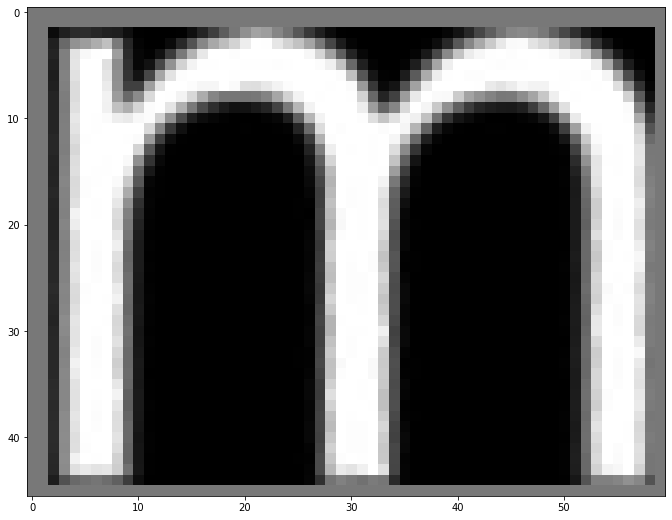

i


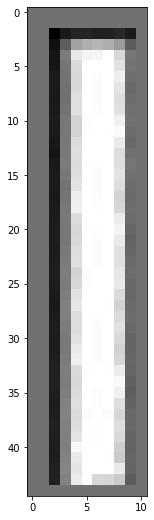

x


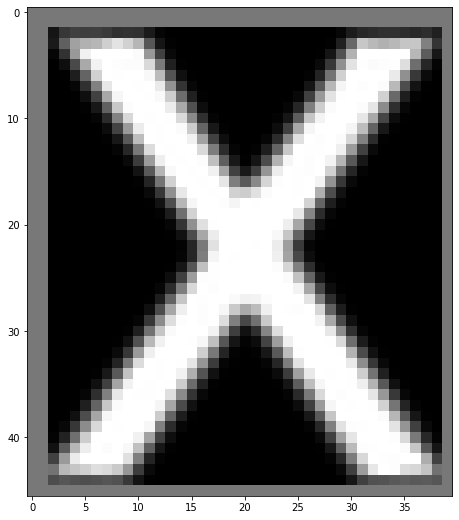

m


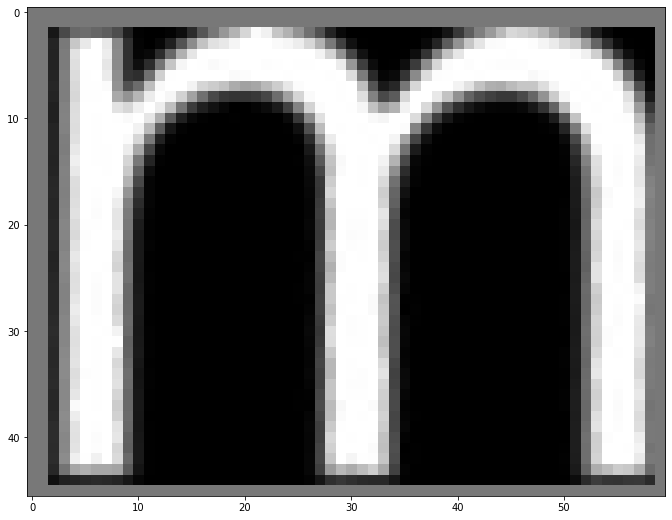

u


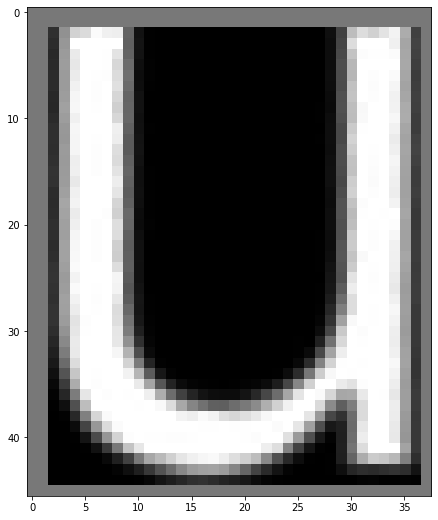

a


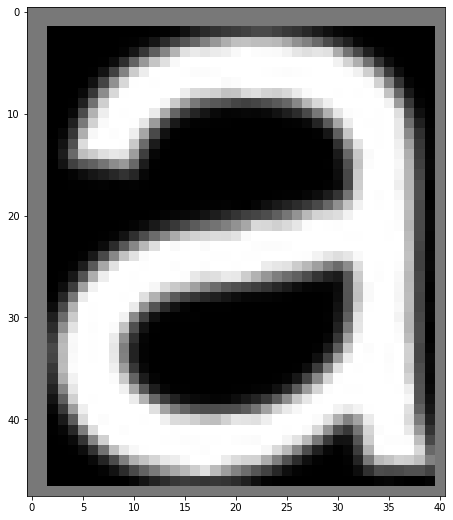

e


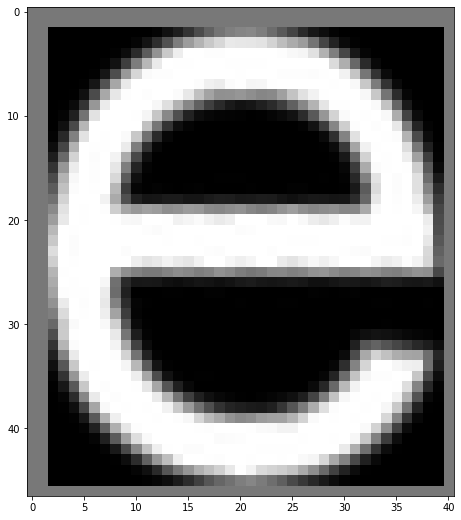

g


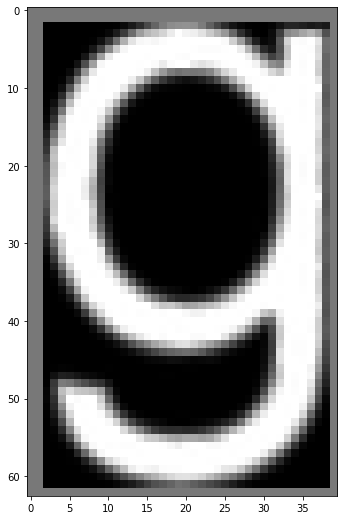

q


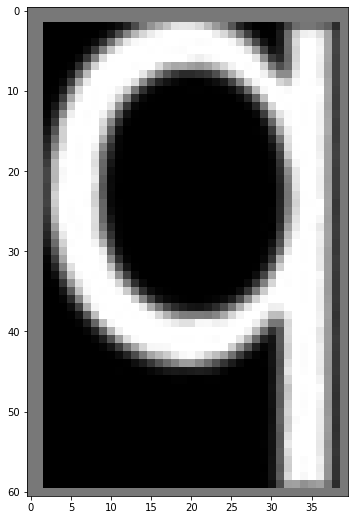

e


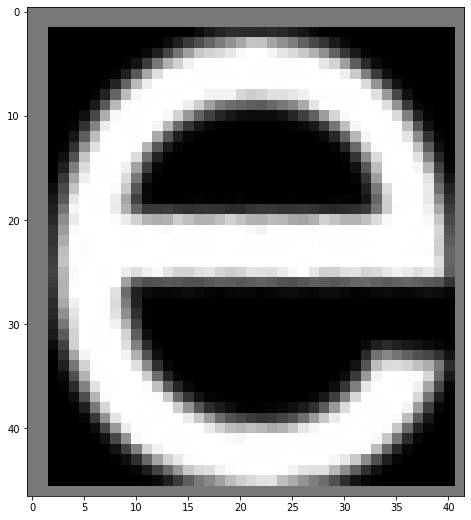

e


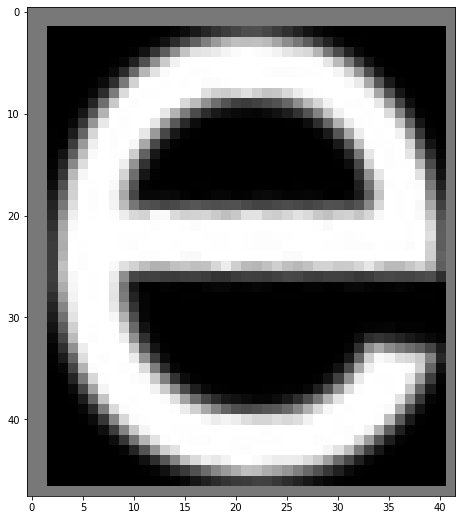

s


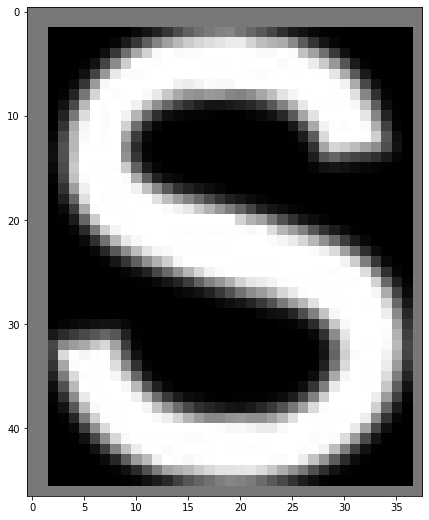

e


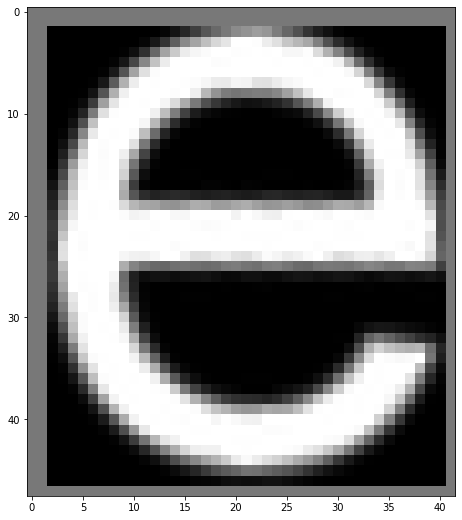

n


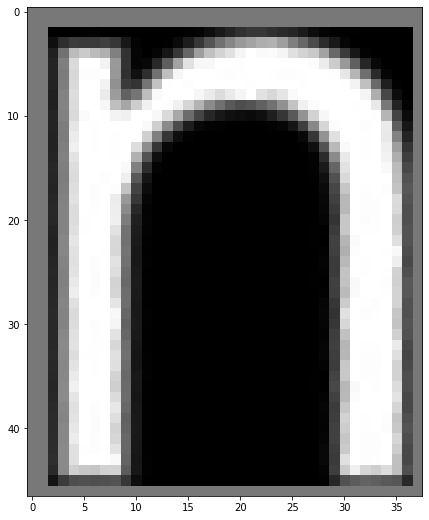

e


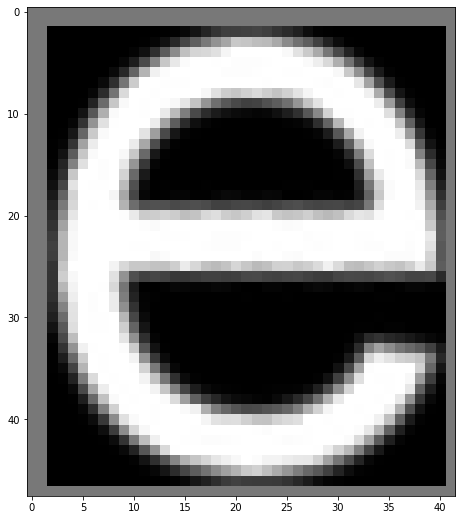

e


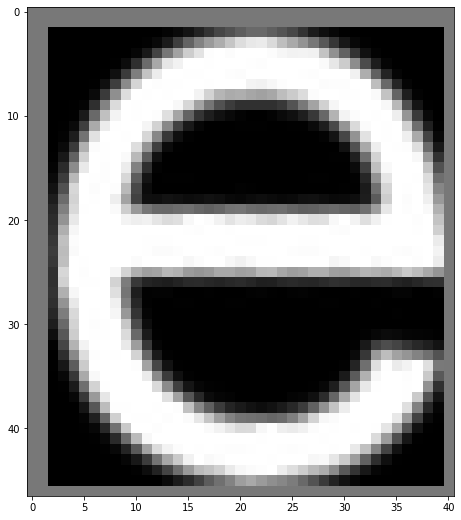

p


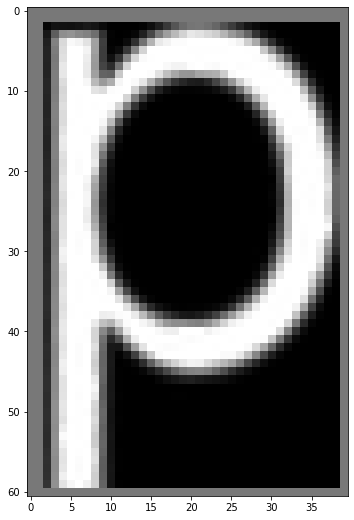

t


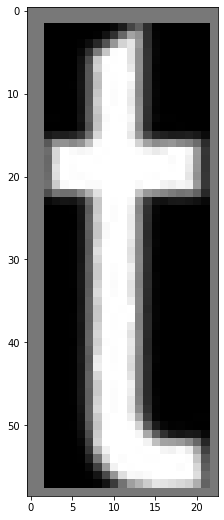

.


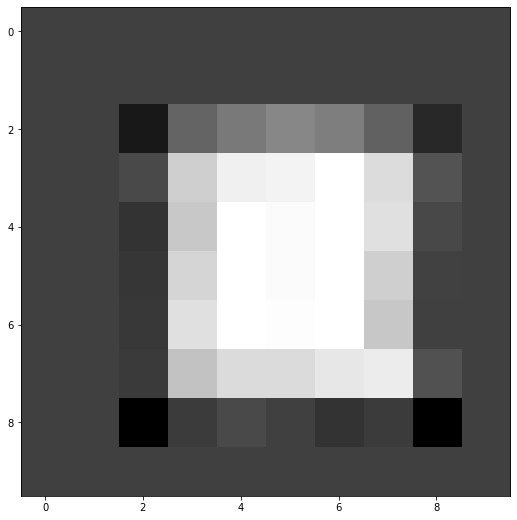

t


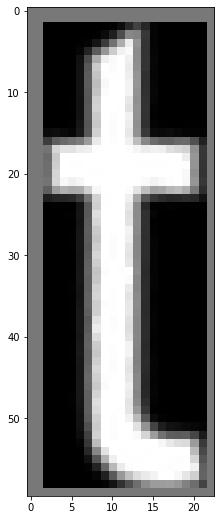

t


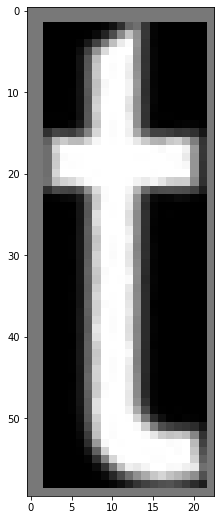

d


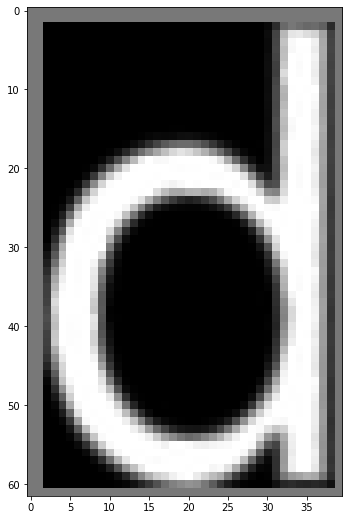

b


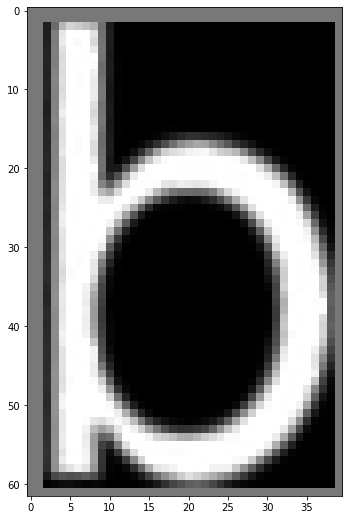

.


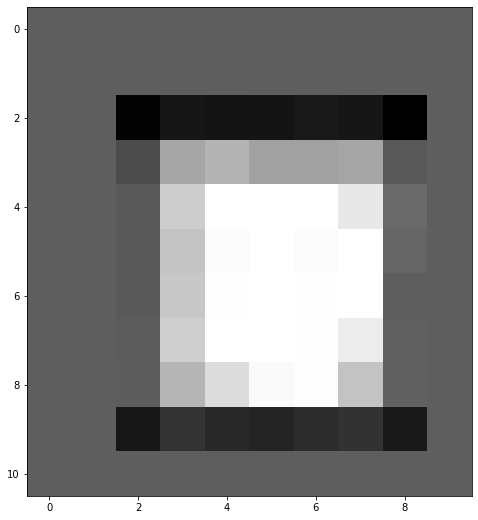

b


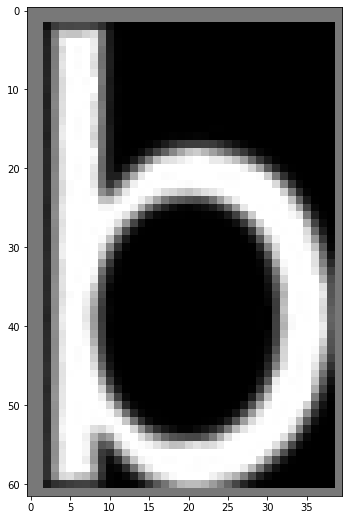

t


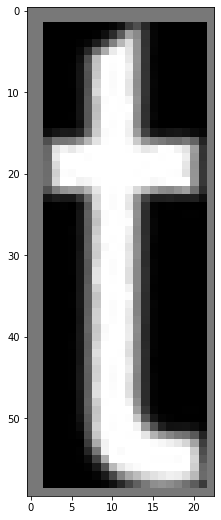

.


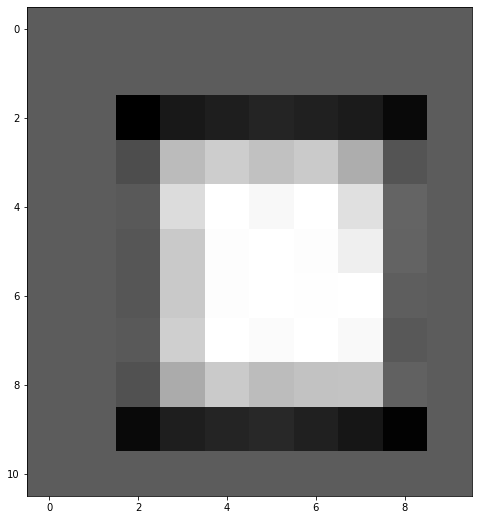

.


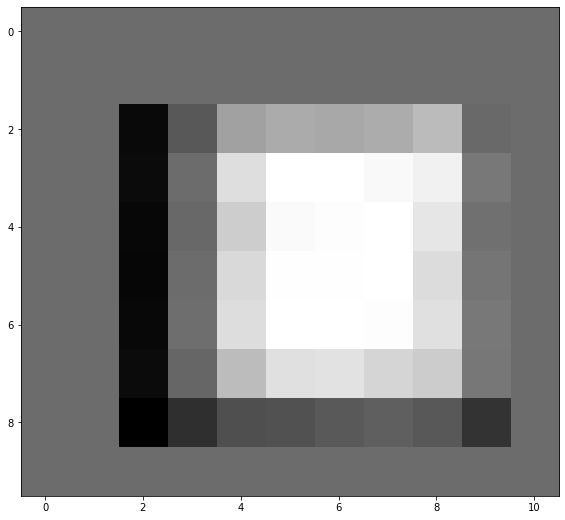

t


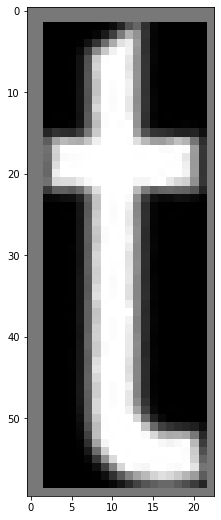

l


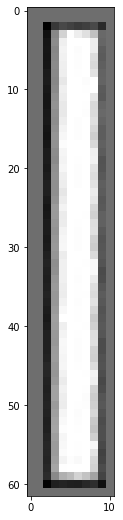

l


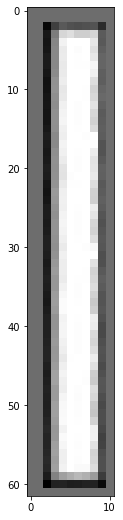

,


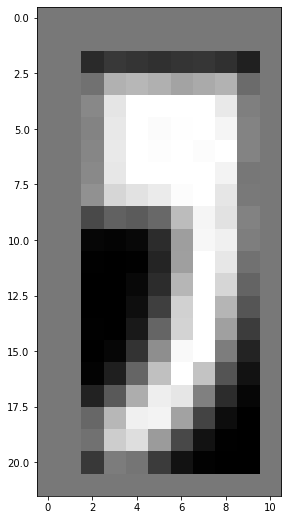

.


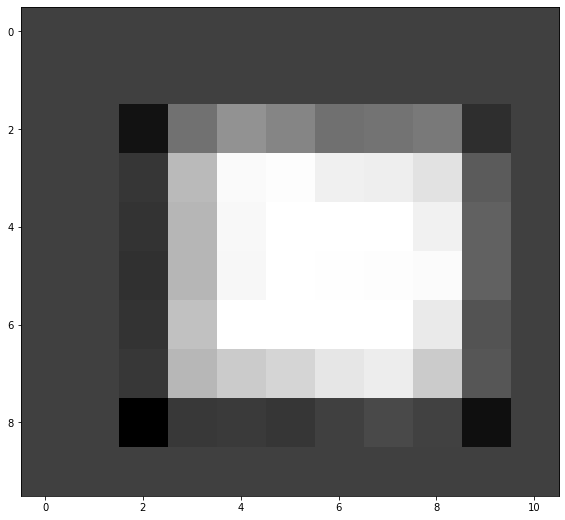

,


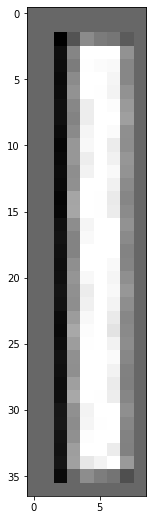

u


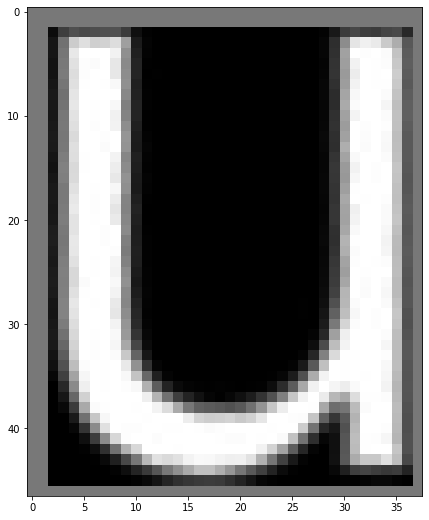

s


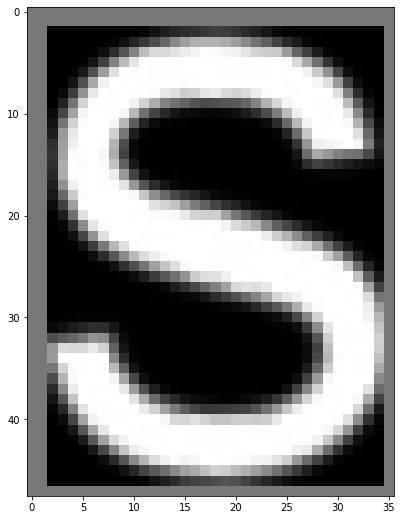

r


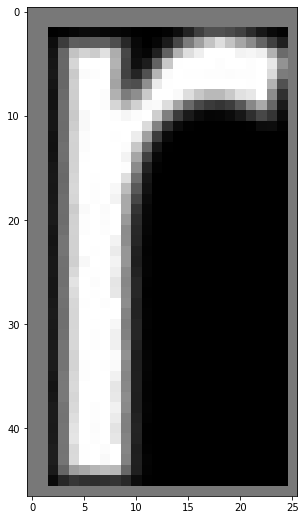

u


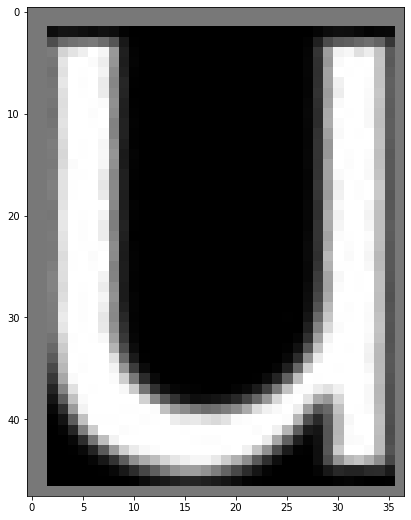

p


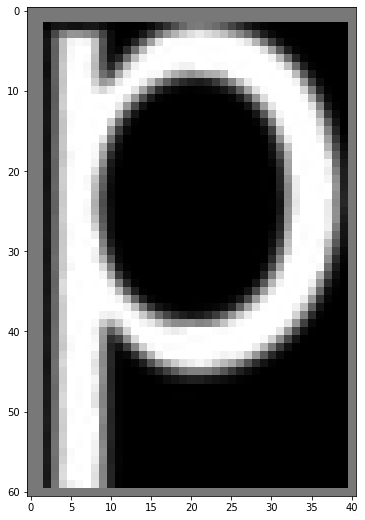

a


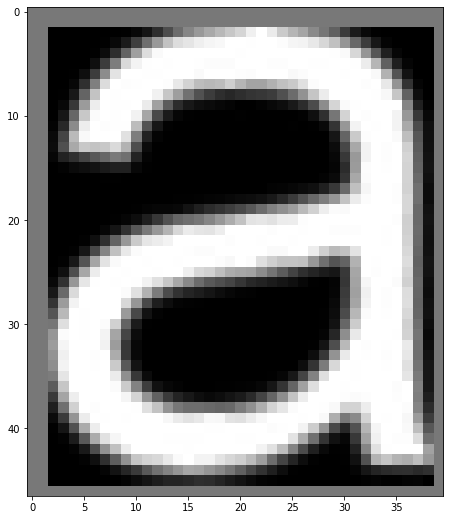

r


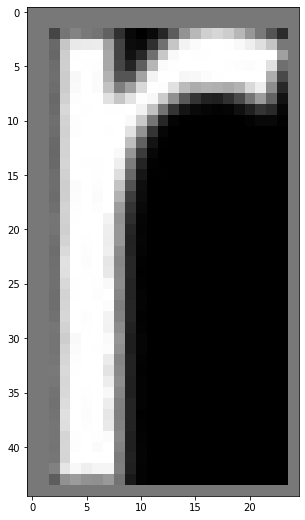

i


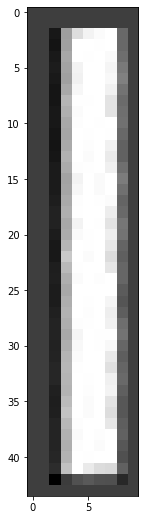

s


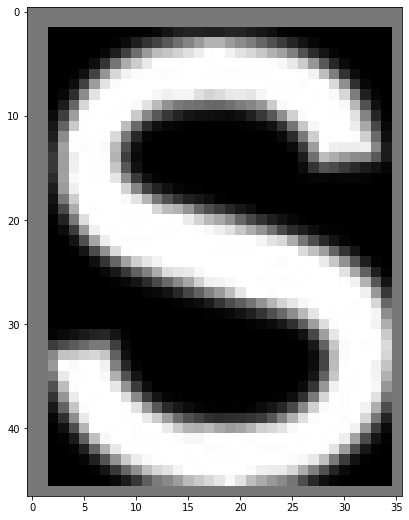

e


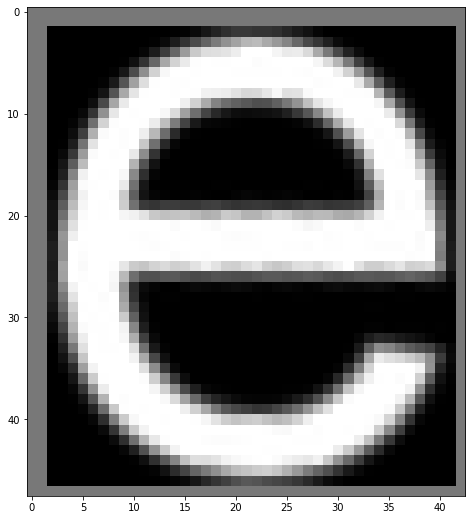

s


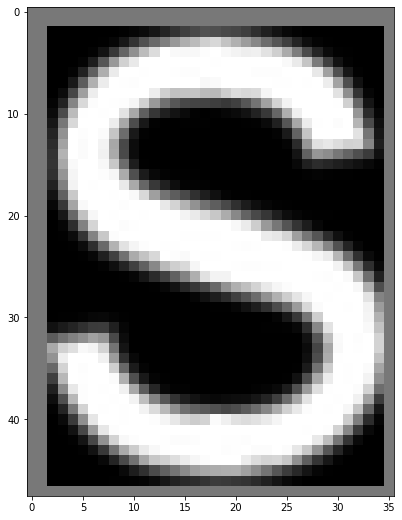

c


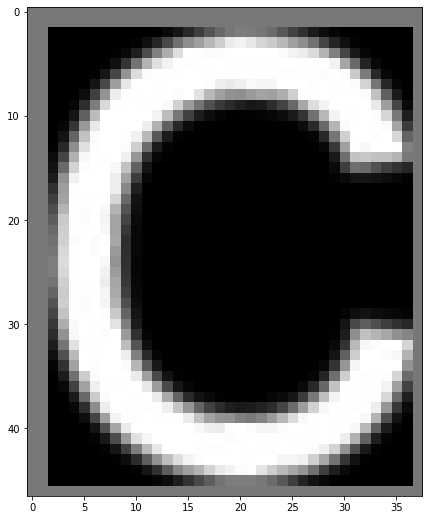

u


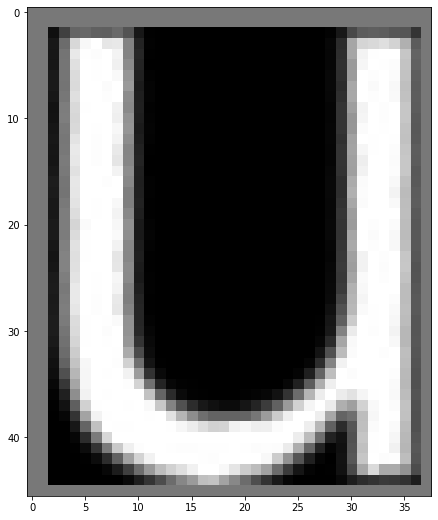

s


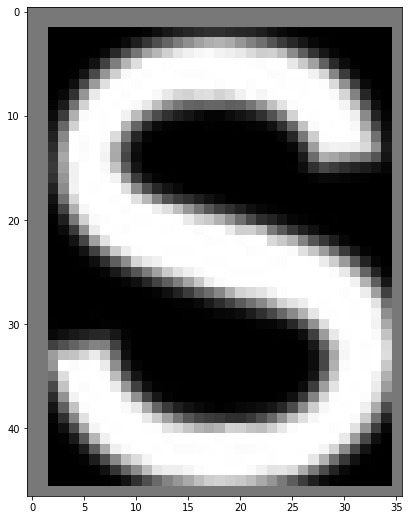

m


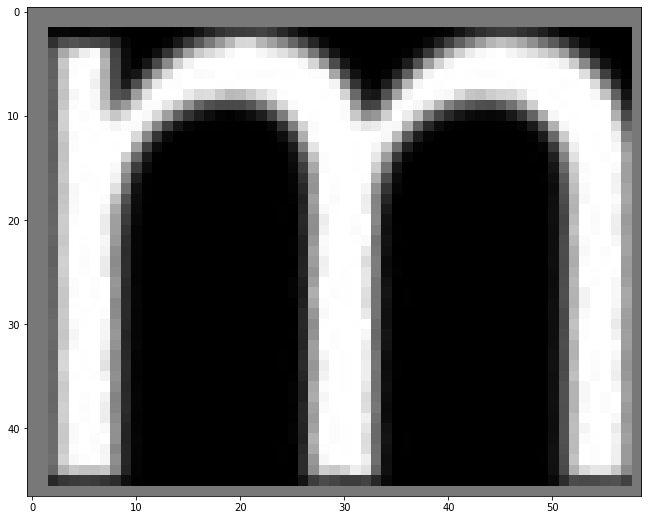

c


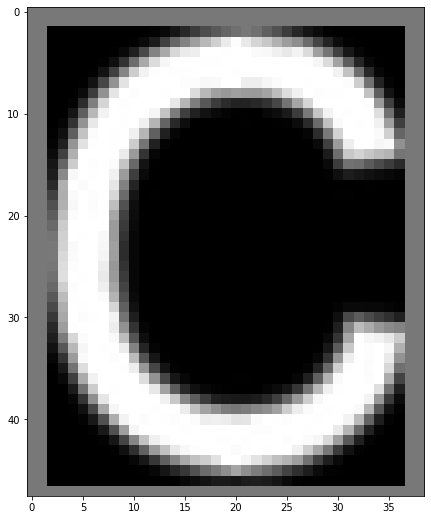

a


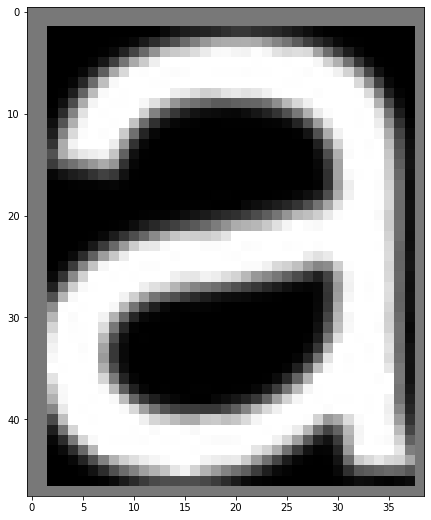

e


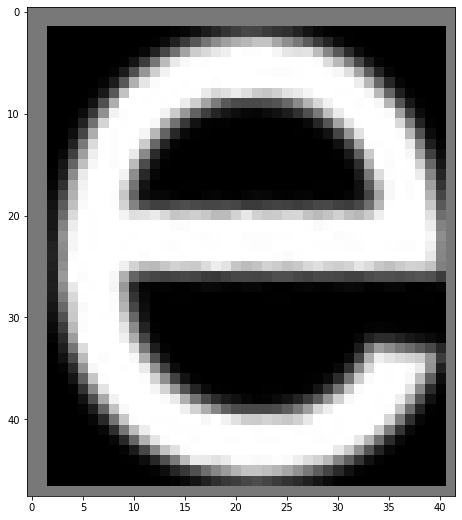

a


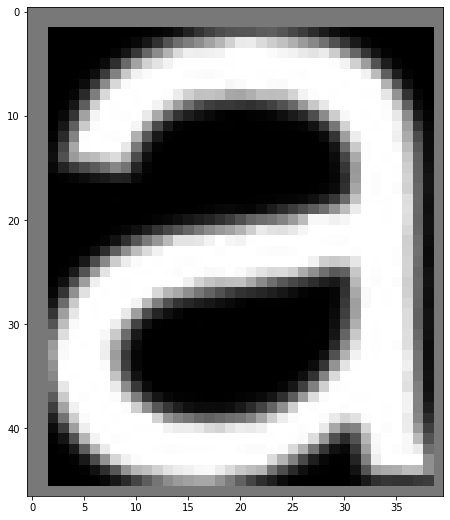

p


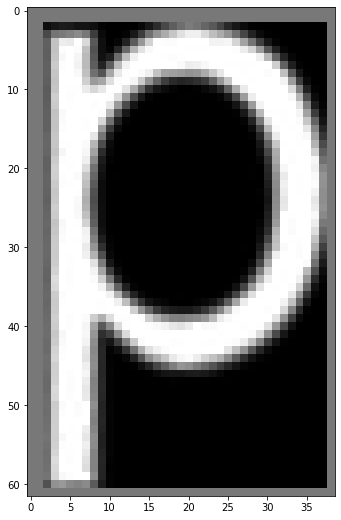

e


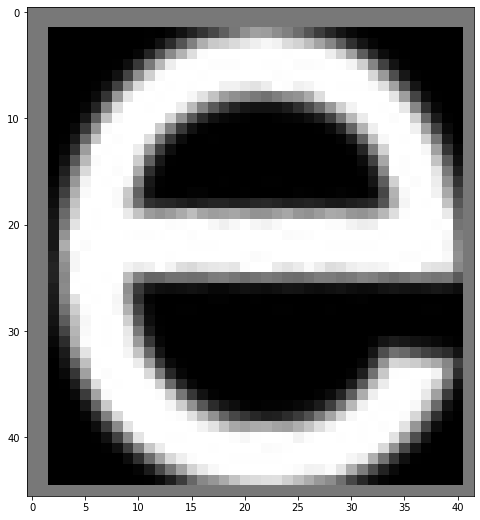

i


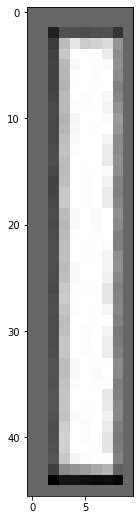

s


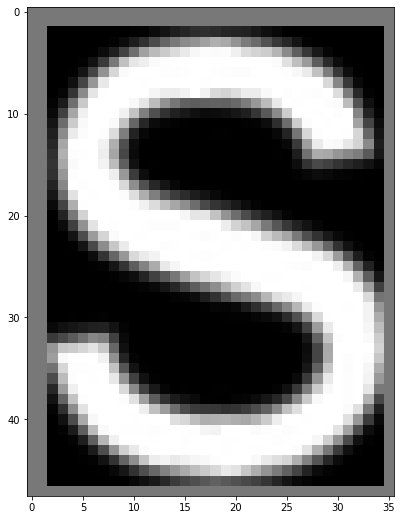

s


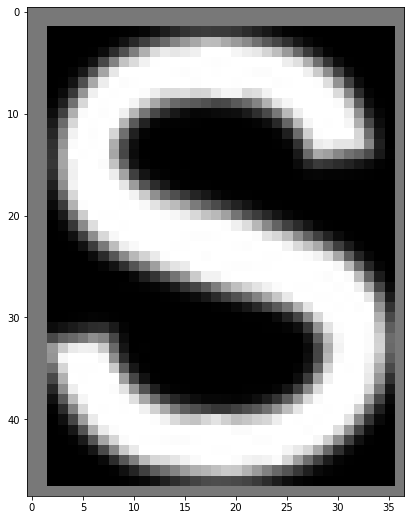

a


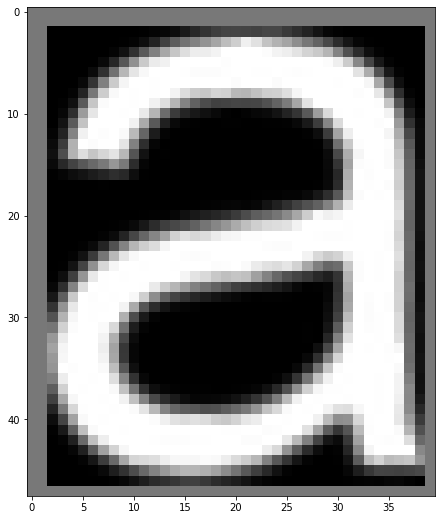

a


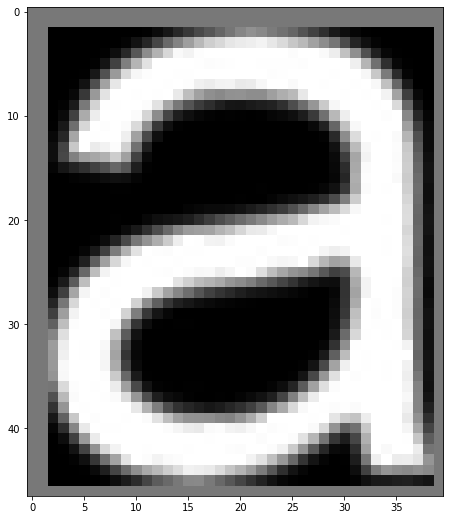

n


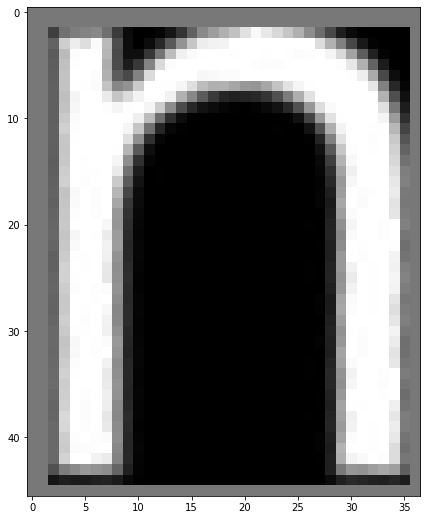

c


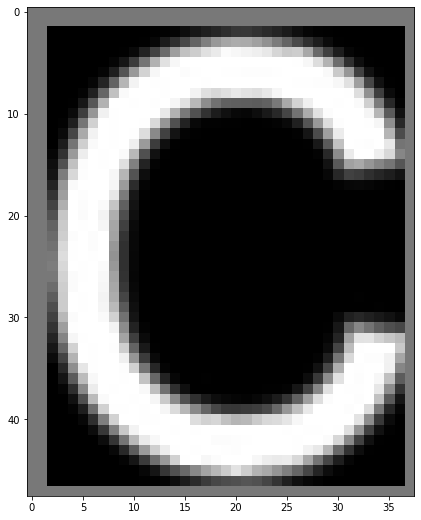

a


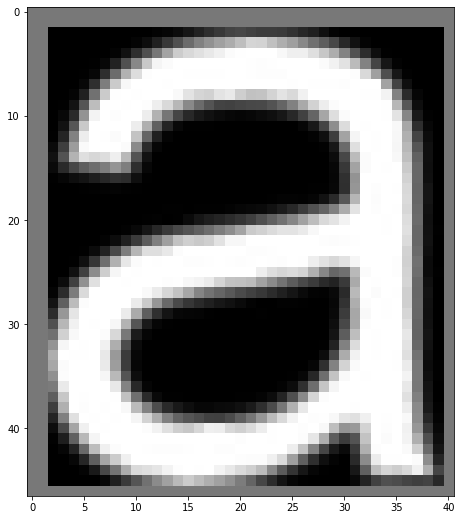

.


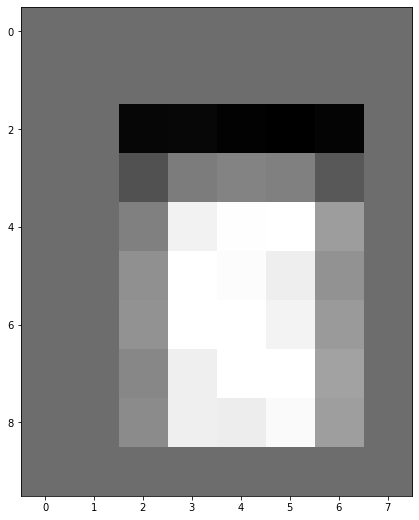

t


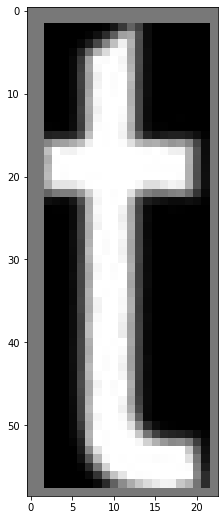

t


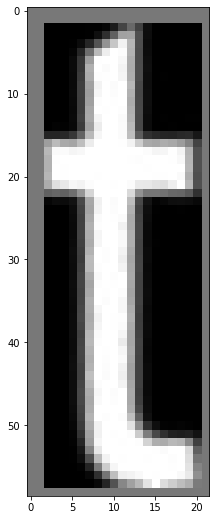

t


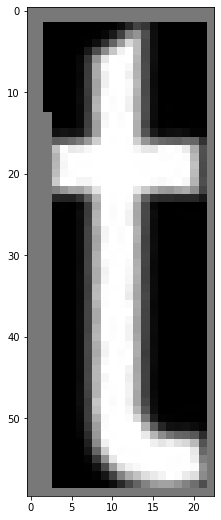

t


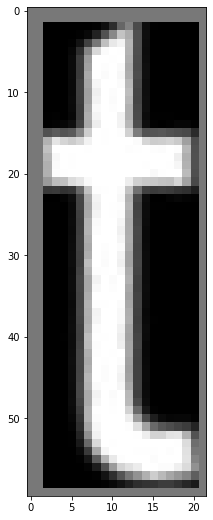

d


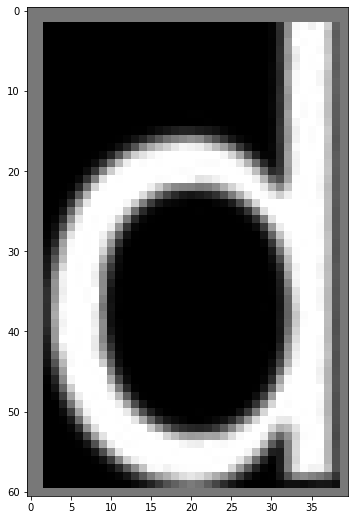

.


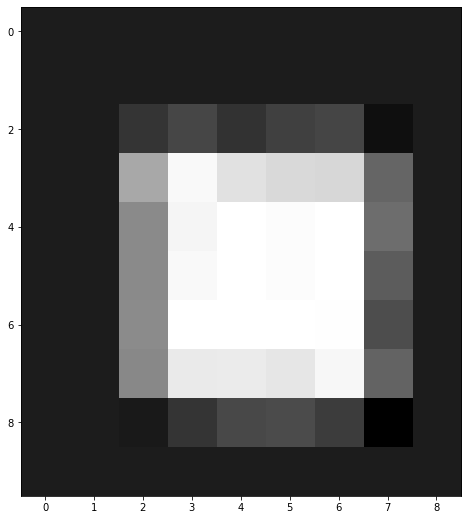

t


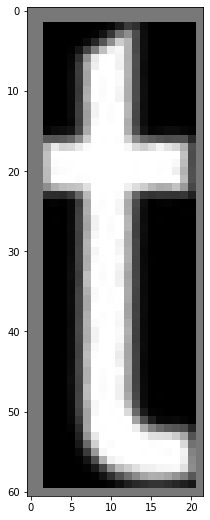

l


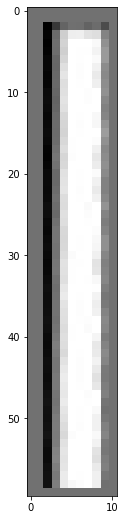

b


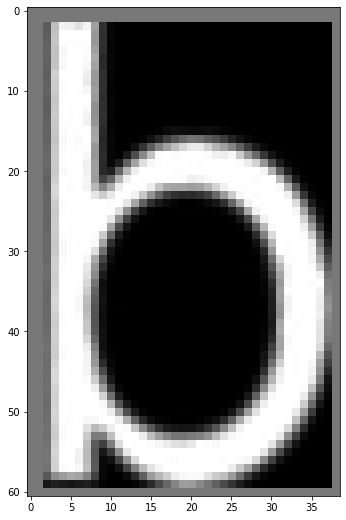

.


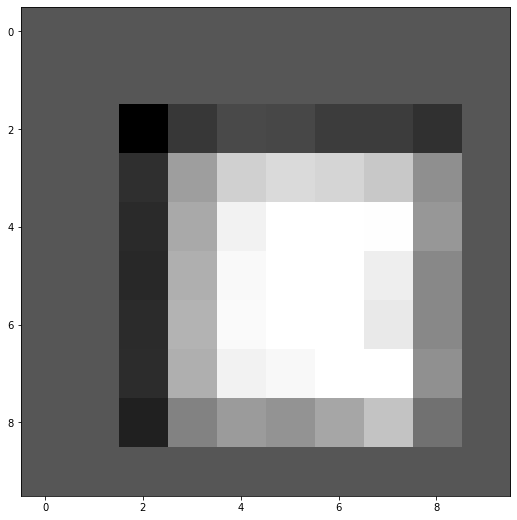

h


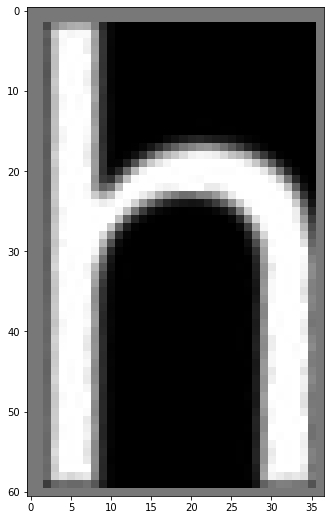

h


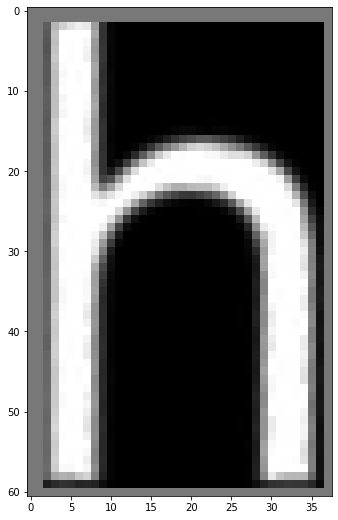

In [269]:
for box in boxes:
    print(recognizeLetter(box, image, letterImages))
    showImage(imageCopy[box[0][1]:box[1][1], box[0][0]:box[1][0]])

In [252]:
def getLinesBorders(image, margin = 10):
    result = []
    prev = -1
    beginOfLine = -1
    wasLine = False
    prevsum = -1
    for index, row in enumerate(image):
        tempSum = 0
        for pixel in row:
            tempSum += pixel
        if tempSum > margin:
            if not wasLine:
                beginOfLine = index
            wasLine = True 
        else:
            if wasLine:
                result.append((beginOfLine, prev))
            wasLine = False
        
        prev = index
        prevsum = tempSum
    return result       

In [265]:
lines = getLinesBorders(image)
lettersInLines = [[] for i in range(len(lines))]
for box in boxes:
    middle = box[0][1] + (box[1][1] - box[0][1])
    for index, line in enumerate(lines):
        if middle >= line[0] and middle <= line[1]:
            lettersInLines[index].append(box)
            break

In [280]:
for array in lettersInLines:
    array.sort(key = lambda x: x[0][0])

In [281]:
result = ""
spaceMargin = 10
for line in lettersInLines:
    prev = -1
    for box in line:
        if prev != -1 and box[0][0] - prev > spaceMargin:
            result += " "
        guessedLetter = recognizeLetter(box, image, letterImages)
        if guessedLetter == ".":
            x = box[0][0] + (box[1][0] - box[0][0])
            y = box[0][1]
            flag = False
            for i in range(y + 10, y + 20):
                if image[i][x] > 0:
                    flag = True
                    break
            if flag:
                continue
        result += guessedLetter
        prev = box[1][0]
    result += "\n"
print(result)

,n hac habitasse platea dictumst. cras est purus,
pellentesque e et maximus sit amet, bibendum sit
amet augue. donec ullamco er erat non hendrent
accumsan . nullam sodales di nissim metus, at
rhoncus enim suscipit in. nullam ac feu iat tellus.
vestibulum pretium, quam et finibus ulvinar, dui
tellus ultries ligula, at imperdiet nisi eros e et
felis. nulla vehicula purus eu li ula cursus, sit amet
onsecetur est eficitur.



In [282]:
# poczatkowe "i" jest dziwne dlatego czyta je jako ","
# niektóre literki ucina ponieważ algorytm wyznaczania kontur traktuje kilka liter jako jeden osobny obiekt